In [2]:
import datetime
start_time = datetime.datetime.now(); print(start_time)

2019-04-26 18:27:27.808000


In [3]:
year = 2013

In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt

In [6]:
from __future__ import division
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np
import pickle
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys

In [7]:
from __future__ import division
from IPython.display import display
import pandas as pd ; pd.set_option("display.max_columns",200)
import numpy as np
import pickle
import statsmodels.api as sm
import sys

In [8]:
def load_fisc_i_by_year(year = None):
    df_fisci = pd.read_hdf(store_path, 'FISC_INDIVIDU_{}'.format(year))
    return df_fisci
def load_fisc_r_by_year(year = None):
    df_fiscr = pd.read_hdf(store_path, 'FISC_REVENU_{}'.format(year))
    return df_fiscr
def load_fisc_l_by_year(year = None):
    df_fiscr = pd.read_hdf(store_path, 'FISC_LOGEMENT_{}'.format(year))
    return df_fiscr

def load_df_fiscrevdet_by_year(year = None):
    df_fiscrevdet = pd.read_hdf(store_path, 'FISC_REVDET_{}'.format(year))
    return df_fiscrevdet
    

In [9]:
hdf_path = ("./Generated_hdf\optimizers.h5")

In [10]:
biologic_path = (u"./Pickle/biologic/biologic_households{}.p".format(2013))
biologic_2013 = pickle.load( 
        open(biologic_path, 'rb'))

In [11]:
biologic_path = (u"./Pickle/biologic/biologic_households{}.p".format(2014))
biologic_2014 = pickle.load( 
        open(biologic_path, 'rb'))

#LOAD DATASETS

In [12]:
hdf_for_exploitation_path = (".\Generated_hdf\data_to_exploit.h5")

In [13]:
%%time
for key in ["df2013_A","df2013_B", "df2013_C", "df2013_D",
            "df2014_A","df2014_B", "df2014_C","df2014_D", 
            "df_concat_A", "df_concat_B","df_concat_C","df_concat_D",
            "df_A", "df_B", "df_C", "df_D"]:
    globals()[key] = pd.read_hdf(hdf_for_exploitation_path, key)

Wall time: 2.41 s


In [14]:
diploma_4_categories = ["No_education_femme", "Vocational_education_femme","Licence_education_femme", "Master_PhD_education_femme",
                       "No_education_homme", "Vocational_education_homme","Licence_education_homme", "Master_PhD_education_homme"]
diploma_4_categories_to_regress =  ["Vocational_education_femme","Licence_education_femme", "Master_PhD_education_femme",
                       "Vocational_education_homme","Licence_education_homme", "Master_PhD_education_homme"]

### Mean Fiscal loss by optimization margin and groups.

In [15]:
columns_margin_list = [u'Do_not_optimize', u'Do_not_optimize_5_euros',
       u'Do_not_optimize_10_euros', u'Do_not_optimize_20_euros',
       u'Do_not_optimize_50_euros', u'Do_not_optimize_100_euros',
       u'Do_not_optimize_0_1_prct_income_share',
       u'Do_not_optimize_0_5_prct_income_share',
       u'Do_not_optimize_1_prct_income_share',
       u'Do_not_optimize_2_prct_income_share',
       u'Do_not_optimize_5_prct_income_share',
       u'Do_not_optimize_95_prct_tax_amount',
       u'Do_not_optimize_90_prct_tax_amount',
       u'Do_not_optimize_50_prct_tax_amount',
       u'Do_not_optimize_5_prct_tax_amount', u'Optimize_10_prct_tax_amount']

#### Average loss

In [16]:
df = pd.DataFrame()
for col in df2013_A[columns_margin_list]:
    df.loc[col,"mean Groupe A"] =  df2013_A[df2013_A[col]==True].Fiscal_loss.mean()
for col in df2013_B[columns_margin_list]:
    df.loc[col,"mean Groupe B"] =  df2013_B[df2013_B[col]==True].Fiscal_loss.mean()
for col in df2013_C[columns_margin_list]:
    df.loc[col,"mean Groupe C"] =  df2013_C[df2013_C[col]==True].Fiscal_loss.mean()
for col in df2013_C[columns_margin_list]:
    df.loc[col,"mean Groupe D"] =  df2013_D[df2013_D[col]==True].Fiscal_loss.mean()

In [17]:
df

,mean Groupe A,mean Groupe B,mean Groupe C,mean Groupe D
Do_not_optimize,341.185490,341.185490,449.461296,341.673568
Do_not_optimize_5_euros,350.443726,350.443726,473.740686,351.116786
Do_not_optimize_10_euros,356.253434,356.253434,477.684070,356.985173
Do_not_optimize_20_euros,368.962533,368.962533,485.489785,369.659563
Do_not_optimize_50_euros,401.119340,401.119340,509.666678,402.265290
Do_not_optimize_100_euros,462.951202,462.951202,559.792815,464.898859
Do_not_optimize_0_1_prct_income_share,388.189184,388.189184,508.941746,389.457607
Do_not_optimize_0_5_prct_income_share,579.163687,579.163687,778.279197,585.803781
Do_not_optimize_1_prct_income_share,746.699404,746.699404,1155.427408,758.165175
Do_not_optimize_2_prct_income_share,989.002980,989.002980,1302.672873,1004.115187


#### Loss in the neighborhood in share of pre-tax income

In [18]:
df = pd.DataFrame()
for share_1 in [0.001,0.005,0.01,0.015,0.2]:
    share_2=share_1*(1+share_1/2)
    df.loc["Mean_fiscal_loss_between_{}_{}".format(share_1,share_2),"mean Groupe A"] =  df2013_A.query("{}<(Fiscal_loss/Rni)<{}".format(share_1,share_2)).Fiscal_loss.mean()
    df.loc["Mean_fiscal_loss_between_{}_{}".format(share_1,share_2),"mean Groupe B"] =  df2013_B.query("{}<(Fiscal_loss/Rni)<{}".format(share_1,share_2)).Fiscal_loss.mean()
    df.loc["Mean_fiscal_loss_between_{}_{}".format(share_1,share_2),"mean Groupe C"] =  df2013_C.query("{}<(Fiscal_loss/Rni)<{}".format(share_1,share_2)).Fiscal_loss.mean()
    df.loc["Mean_fiscal_loss_between_{}_{}".format(share_1,share_2),"mean Groupe D"] =  df2013_D.query("{}<(Fiscal_loss/Rni)<{}".format(share_1,share_2)).Fiscal_loss.mean()


In [19]:
df

,mean Groupe A,mean Groupe B,mean Groupe C,mean Groupe D
Mean_fiscal_loss_between_0.001_0.0010005,43.170000,43.170000,43.170000,43.170000
Mean_fiscal_loss_between_0.005_0.0050125,196.215000,196.215000,242.491071,196.215000
Mean_fiscal_loss_between_0.01_0.01005,366.924211,366.924211,552.640000,369.387647
Mean_fiscal_loss_between_0.015_0.0151125,492.423854,492.423854,823.680000,492.423854
Mean_fiscal_loss_between_0.2_0.22,NaN,NaN,NaN,NaN


In [20]:
df2013_B.query("{}<(Fiscal_loss/Rni)<0.99".format(0))[["Separation", "Mariage", "Pacs"]].head()

,Separation,Mariage,Pacs
2,False,False,False
3,False,False,False
8,False,False,False
15,False,False,True
16,False,False,False


In [21]:
df2013_B.query("{}<(Fiscal_loss/Rni)<0.99".format(.045))[["Separation", "Mariage", "Pacs"]].sum()

Separation    7
Mariage       5
Pacs          3
dtype: int64

Only 5 mariage, 3 pacs et 6 break-ups for non optimization greater than  4.5% of pre-tax income. We will restrict our analysis to households that experience smaller income loss.

#### Number of transition events by households

In [22]:
df2013_B[["Separation", "Mariage", "Pacs"]].sum()

Separation     939
Mariage       1260
Pacs           950
dtype: int64

In [23]:
pd.set_option('precision', 3)

### Multinomial Logit Regression function

In [24]:
regression_dict = {"a":[ 'Intersect' ,],
                   "b":[  'Intersect' ,"Gain_fiscal_au_pacs", ],
                   "c":['Intersect' ,"Gain_fiscal_au_pacs","Age_moyen", "Age_elder_child"], }
regression_dict["d"] = regression_dict["c"] + ["deux_enfants", "trois_enfants_et_plus"]
regression_dict["e"] = regression_dict["d"] + ["Rni"]
regression_dict["f"] = regression_dict["e"] + ["Rni_squared"]
regression_dict["g"] = (regression_dict["f"] + ["Diff_in_incompe_mere_pere"]); regression_dict["g"].remove("Rni_squared")
regression_dict["g2"] = (regression_dict["f"] + ["Diff_in_incompe_mere_pere", "No_decote"]); regression_dict["g2"].remove("Rni_squared")
regression_dict["i"] = regression_dict["g"] + diploma_4_categories_to_regress




def data_creation(df = df2013_B):
            #En ne prennant que ceux qu'on observe les deux années...
    df_temp = df.sample(frac = 1)

    df_temp = df_temp.query("Rni>0") #Take out households without income
    df_temp["Still_cohabitants"] = df_temp[["Separation","Pacs", "Mariage"]].sum(axis = 1)==0
    df_temp["Observed_both_years"] = (df_temp[["Separation","Pacs", "Mariage", "Still_cohabitants"]].sum(axis = 1)!=0)
    df_temp = df_temp[df_temp.Observed_both_years] #Keep only those observed in 2013 and 2014


    df_temp["Rni_squared"] = (df_temp.Rni**2)/10**6
    df_temp.loc[:,"Intersect"]=  np.zeros(df_temp.shape[0])+1

    df_temp["Fiscal_loss_thousand_divided"] = df_temp.Fiscal_loss/1000
    #df_temp["Fiscal_loss_greater_then_{}_euros".format(seuil_1_euros)] =  df_temp.Fiscal_loss>seuil_1_euros

    df_temp["Fiscal_loss_in_prct_rev"] = (df_temp.Fiscal_loss/df_temp.Rni)
    df_temp["Fiscal_loss_in_prct_rev_squared"] = ((df_temp.Fiscal_loss/df_temp.Rni)**2)
    for seuil_1 in [0.005,0.01,0.015]:
        df_temp["Fiscal_loss_less_then_{}_prct_rev".format(seuil_1)] =  (df_temp.Fiscal_loss/df_temp.Rni)<seuil_1
        df_temp["Fiscal_loss_greater_then_{}_prct_rev".format(seuil_1)] =  (df_temp.Fiscal_loss/df_temp.Rni)>seuil_1
        df_temp["Fiscal_loss_greater_then_{}_prct_rev".format(seuil_1)] =  (df_temp.Fiscal_loss/df_temp.Rni)>seuil_1

        #df_temp["Fiscal_loss_greater_then_{}_prct_tax".format(seuil_1)] =  (df_temp.Fiscal_loss/df_temp.)>seuil_1

        df_temp["Fiscal_loss_pct_of_tax"] = (df_temp.Fiscal_loss/ df_temp.Irpp_decote).fillna(0)
        df_temp["Fiscal_loss_greater_then_{}_pct_of_tax".format(seuil_1)] = df_temp.Fiscal_loss_pct_of_tax> seuil_1
    for seuil_1_euros in [50,250,500]:
        df_temp["Fiscal_loss_greater_then_{}_euros".format(seuil_1_euros)] =  (df_temp.Fiscal_loss)>seuil_1_euros


    df_temp["Gain_fiscal_pacs_x_1_enfant"] = df_temp.Gain_fiscal_au_pacs * ((~df_temp["deux_enfants"])& (~df_temp["trois_enfants_et_plus"]))
    df_temp["Gain_fiscal_pacs_x_3_enfants"] = df_temp.Gain_fiscal_au_pacs * df_temp["trois_enfants_et_plus"]



    df_temp["Fiscal_loss_0_50_euros"] = ((1<df_temp.Fiscal_loss)&(500>df_temp.Fiscal_loss))
    df_temp["Rni_mere_sqared"] = ((df_temp.Rni_mere**2)/10**5)/1000
    df_temp["Rni_pere_sqared"] = ((df_temp.Rni_pere**2)/10**5)/1000
    df_temp["Diff_in_incompe_mere_pere"] = np.abs(df_temp.Rni_pere - df_temp.Rni_mere)
    df_temp["Diff_in_incompe_mere_pere_squared"] = (np.abs(df_temp.Rni_pere - df_temp.Rni_mere)**2)/1000

    df_temp["Diff_in_incompe_mere_pere_x_gain_pacs"] = df_temp.Diff_in_incompe_mere_pere * df_temp.Gain_fiscal_au_pacs
    return df_temp


def mln_core(margin,df = None, regression=None,regressions_without_var_of_interest = regression_dict ):
    

    df_2 = df.query("Prct_rev_perte_fiscale<0.045")
    if (regression == "h") or (regression == "i") or (regression == "j") :
        if (regression == "h") or (regression == "i"):
            df_2 = df_2[df_2[diploma_4_categories].sum(axis = 1) == 2]
            if (regression == "h"):
                regression = "g"
                pass
        if regression == "j":
            n = df_2[df_2[diploma_4_categories].sum(axis = 1) == 2].shape[0]
            df_2 = df_2.sample(n = n, random_state = 42)
            regression = "g"
            pass

    exog_var = regressions_without_var_of_interest[regression]
    #En ne prennant que ceux qu'on observe les deux années...
    MNLogit = sm.MNLogit(df_2[["Still_cohabitants","Separation","Mariage", "Pacs"]].astype('int'), 
                      df_2[[margin]+exog_var
                              ].astype("float")).fit(start_params = None, method='newton',  tol = 10**(-13), maxiter = 5000)
    return MNLogit
def mln(margin,regression = "All" ,df = None, display_option = False,regressions_without_var_of_interest = regression_dict, marginal_effect = False):
    if regression == "All":
        
        for regression_id in ["a","b", "c", "d","e", "f", "g", "h", "i", "j"]:
            print(regression_id)
            MNLogit = mln_core(margin, df = df, regression=regression_id )
            summary = MNLogit.summary()
            if display_option == False:
                print(summary)
            else: display(summary)
        pass

    else:
        MNLogit = mln_core(margin, df = df, regression=regression )
        summary = MNLogit.summary()
    if display_option == False:
        print(summary)
    else: display(summary)
    if marginal_effect == True: #Does not work for all regressions.
        if display_option == False:
            print(MNLogit.get_margeff().summary())
        else: display(MNLogit.get_margeff().summary())
        
    

In [25]:
df2013_A = data_creation(df2013_A)
df2013_B = data_creation(df2013_B)
df2013_C = data_creation(df2013_C)
df2013_D = data_creation(df2013_D)

C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\IPython\kernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\IMPTEMP_A_PACIFIC\Desktop\WinPython-64bit-2.7.10.2\WinPython-64bit-2.7.10.2\python-2.7.10.amd64\lib\site-packages\pandas\computation\

### Fiscal loss greateer than  1% of pre-tax income 

In [26]:
ID_FISC_LOG_DIFF_2014 = df2014_A.ID_FISC_LOG_DIFF

In [27]:
df2013_A["Can_optimize"] = df2013_A.result_min_allocation<df2013_A.result_max_allocation

### Mean separation rate by Optimization behavior.

In [28]:
df_mean = pd.DataFrame()
df_mean.loc["Separation","Optimize"] = df2013_B[~ df2013_B.Do_not_optimize].Separation.mean()*100
df_mean.loc["Separation","Do Not Optimize"] =  df2013_B[ df2013_B.Do_not_optimize].Separation.mean()*100
df_mean.loc["Separation","Do Not Optimize at 1%"] =  df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Separation.mean()*100


df_mean.loc["Mariage","Optimize"]               =df2013_B[~ df2013_B.Do_not_optimize].Mariage.mean()*100
df_mean.loc["Mariage","Do Not Optimize"]        = df2013_B[ df2013_B.Do_not_optimize].Mariage.mean()*100
df_mean.loc["Mariage","Do Not Optimize at 1%"] =df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Mariage.mean()*100


df_mean.loc["PACS","Optimize"]              =   df2013_B[~ df2013_B.Do_not_optimize].Pacs.mean()*100
df_mean.loc["PACS","Do Not Optimize"]       =   df2013_B[ df2013_B.Do_not_optimize].Pacs.mean()*100
df_mean.loc["PACS","Do Not Optimize at 1%"] =   df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Pacs.mean()*100


df_mean.loc["Still_Cohabitants","Optimize"]              = df2013_B[~ df2013_B.Do_not_optimize].Still_cohabitants.mean()*100
df_mean.loc["Still_Cohabitants","Do Not Optimize"]       = df2013_B[ df2013_B.Do_not_optimize].Still_cohabitants.mean()*100
df_mean.loc["Still_Cohabitants","Do Not Optimize at 1%"] = df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Still_cohabitants.mean()*100

df_count = pd.DataFrame()
df_count.loc["Separation","Optimize"] = df2013_B[~ df2013_B.Do_not_optimize].Separation.sum()
df_count.loc["Separation","Do Not Optimize"] =  df2013_B[ df2013_B.Do_not_optimize].Separation.sum()
df_count.loc["Separation","Do Not Optimize at 1%"] =  df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Separation.sum()
df_count.loc["Mariage","Optimize"]               =df2013_B[~ df2013_B.Do_not_optimize].Mariage.sum()
df_count.loc["Mariage","Do Not Optimize"]        = df2013_B[ df2013_B.Do_not_optimize].Mariage.sum()
df_count.loc["Mariage","Do Not Optimize at 1%"] =df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Mariage.sum()
df_count.loc["PACS","Optimize"]              =   df2013_B[~ df2013_B.Do_not_optimize].Pacs.sum()
df_count.loc["PACS","Do Not Optimize"]       =   df2013_B[ df2013_B.Do_not_optimize].Pacs.sum()
df_count.loc["PACS","Do Not Optimize at 1%"] =   df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Pacs.sum()
df_count.loc["Still_Cohabitants","Optimize"]              = df2013_B[~ df2013_B.Do_not_optimize].Still_cohabitants.sum()
df_count.loc["Still_Cohabitants","Do Not Optimize"]       = df2013_B[ df2013_B.Do_not_optimize].Still_cohabitants.sum()
df_count.loc["Still_Cohabitants","Do Not Optimize at 1%"] = df2013_B[ df2013_B.Do_not_optimize_1_prct_income_share].Still_cohabitants.sum()

In [29]:
print("Mean")
display(df_mean)
print("Headcount")
display(df_count)

Mean


,Optimize,Do Not Optimize,Do Not Optimize at 1%
Separation,2.00,2.08,2.91
Mariage,2.73,2.68,2.47
PACS,2.02,2.12,2.03
Still_Cohabitants,93.26,93.11,92.58


Headcount


,Optimize,Do Not Optimize,Do Not Optimize at 1%
Separation,667,271,126
Mariage,911,349,107
PACS,674,276,88
Still_Cohabitants,31171,12110,4006


#### Prefeared regression with marginal effect

In [30]:
mln("Fiscal_loss_greater_then_0.01_prct_rev", df=df2013_B, regression="g", marginal_effect = True, display_option = True)

Optimization terminated successfully.
         Current function value: 0.314904
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02119
Time:                        18:27:36   Log-Likelihood:                -14552.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                1.157e-117
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2854      0.120      2.377      0.017         0.050     0.521
Intersect                                 -2.6832      0.214    -12.514      0.000        -3.103    -2.263
Gain_fiscal_au_pacs                        0.1868      0.096      1.949      0.051        -0.001     0.375
Age_moyen                                 -0.0281      0.008     -3.732      0.000        -0.043    -0.013
Age_elder_child                            0.0302      0.013      2.305      0.021         0.005     0.056
deux_enfants                              -0.0442      0.077     -0.574      0.566        -0.195     0.107
trois_enfants_et_plus                     -0.1292      0.148     -0.872      0.383        -0.420     0.161
Rni                                    -1.487e-05   2.76e-06     -5.395      0.000     -2.03e-05 -9.47e-06
Diff_in_incompe_mere_pere               1.089e-05   4.26e-06      2.554      0.011      2.53e-06  1.92e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3322      0.118     -2.826      0.005        -0.563    -0.102
Intersect                                 -2.0338      0.194    -10.505      0.000        -2.413    -1.654
Gain_fiscal_au_pacs                        0.2550      0.076      3.354      0.001         0.106     0.404
Age_moyen                                 -0.0640      0.007     -9.097      0.000        -0.078    -0.050
Age_elder_child                            0.0032      0.012      0.263      0.792        -0.021     0.027
deux_enfants                               0.4398      0.068      6.512      0.000         0.307     0.572
trois_enfants_et_plus                      0.5504      0.124      4.430      0.000         0.307     0.794
Rni                                     9.223e-06   2.09e-06      4.410      0.000      5.12e-06  1.33e-05
Diff_in_incompe_mere_pere              -2.505e-07   2.79e-06     -0.090      0.928     -5.72e-06  5.22e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3494      0.127     -2.747      0.006        -0.599    -0.100
Intersect                                 -2.9389      0.215    -13.648      0.000        -3.361    -2.517
Gain_fiscal_au_pacs                        0.6933      0.081      8.529      0.000         0.534     0.853
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
==========================================================================================================
                   y=Still_cohabitants      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0096      0.005      2.104      0.035         0.001     0.019
Gain_fiscal_au_pacs                       -0.0230      0.003     -7.256      0.000        -0.029    -0.017
Age_moyen                                  0.0029      0.000     10.446      0.000         0.002     0.003
Age_elder_child                            0.0010      0.000      1.971      0.049       5.7e-06     0.002
deux_enfants                              -0.0073      0.003     -2.643      0.008        -0.013    -0.002
trois_enfants_et_plus                     -0.0017      0.006     -0.296      0.767        -0.013     0.010
Rni                                    -3.482e-07   9.02e-08     -3.860      0.000     -5.25e-07 -1.71e-07
Diff_in_incompe_mere_pere               3.068e-09   1.26e-07      0.024      0.981     -2.45e-07  2.51e-07
----------------------------------------------------------------------------------------------------------
                          y=Separation      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0060      0.002      2.512      0.012         0.001     0.011
Gain_fiscal_au_pacs                        0.0033      0.002      1.725      0.085        -0.000     0.007
Age_moyen                                 -0.0005      0.000     -3.370      0.001        -0.001    -0.000
Age_elder_child                            0.0006      0.000      2.429      0.015         0.000     0.001
deux_enfants                              -0.0011      0.002     -0.697      0.486        -0.004     0.002
trois_enfants_et_plus                     -0.0026      0.003     -0.907      0.365        -0.008     0.003
Rni                                    -3.066e-07    5.5e-08     -5.577      0.000     -4.14e-07 -1.99e-07
Diff_in_incompe_mere_pere               2.189e-07   8.42e-08      2.601      0.009       5.4e-08  3.84e-07
----------------------------------------------------------------------------------------------------------
                             y=Mariage      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0087      0.003     -2.804      0.005        -0.015    -0.003
Gain_fiscal_au_pacs                        0.0062      0.002      3.087      0.002         0.002     0.010
Age_moyen                                 -0.0016      0.000     -8.675      0.000        -0.002    -0.001
Age_elder_child                            0.0001      0.000      0.377      0.706        -0.001     0.001
deux_enfants                               0.0117      0.002      6.496      0.000         0.008     0.015
trois_enfants_et_plus                      0.0149      0.003      4.523      0.000         0.008     0.021
Rni                                     2.382e-07   5.51e-08      4.324      0.000       1.3e-07  3.46e-07
Diff_in_incompe_mere_pere              -6.156e-09   7.32e-08     -0.084      0.933      -1.5e-07  1.37e-07
----------------------------------------------------------------------------------------------------------
                                y=Pacs      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------

In [31]:
mln("Fiscal_loss_greater_then_0.01_prct_rev", df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.321542
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46204
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:               0.0005608
Time:                        18:27:43   Log-Likelihood:                -14858.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 0.0008249
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.4147      0.100      4.163      0.000         0.219     0.610
Intersect                                 -3.8788      0.035   -109.405      0.000        -3.948    -3.809
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0901      0.105     -0.861      0.389        -0.295     0.115
Intersect                                 -3.5282      0.030   -118.083      0.000        -3.587    -3.470
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0185      0.115      0.161      0.872        -0.207     0.244
Intersect                                 -3.8191      0.034   -110.917      0.000        -3.887    -3.752
==========================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.320605
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46201
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                0.003474
Time:                        18:27:43   Log-Likelihood:                -14815.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 5.165e-20
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2652      0.113      2.349      0.019         0.044     0.486
Intersect                                 -3.9319      0.041    -95.719      0.000        -4.012    -3.851
Gain_fiscal_au_pacs                        0.2176      0.079      2.762      0.006         0.063     0.372
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2479      0.114     -2.176      0.030        -0.471    -0.025
Intersect                                 -3.5846      0.035   -103.179      0.000        -3.653    -3.516
Gain_fiscal_au_pacs                        0.2301      0.067      3.444      0.001         0.099     0.361
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3913      0.123     -3.180      0.001        -0.632    -0.150
Intersect                                 -3.9961      0.042    -94.027      0.000        -4.079    -3.913
Gain_fiscal_au_pacs                        0.6229      0.072      8.677      0.000         0.482     0.764
==========================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317264
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46195
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01386
Time:                        18:27:43   Log-Likelihood:                -14661.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 1.057e-80
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2301      0.113      2.033      0.042         0.008     0.452
Intersect                                 -2.7445      0.212    -12.969      0.000        -3.159    -2.330
Gain_fiscal_au_pacs                        0.2738      0.079      3.445      0.001         0.118     0.430
Age_moyen                                 -0.0404      0.007     -5.587      0.000        -0.055    -0.026
Age_elder_child                            0.0347      0.012      2.974      0.003         0.012     0.057
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3032      0.114     -2.655      0.008        -0.527    -0.079
Intersect                                 -1.7742      0.185     -9.614      0.000        -2.136    -1.413
Gain_fiscal_au_pacs                        0.3181      0.067      4.718      0.000         0.186     0.450
Age_moyen                                 -0.0596      0.006     -9.327      0.000        -0.072    -0.047
Age_elder_child                            0.0352      0.010      3.392      0.001         0.015     0.056
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4393      0.124     -3.557      0.000        -0.681    -0.197
Intersect                                 -3.0808      0.206    -14.961      0.000        -3.484    -2.677
Gain_fiscal_au_pacs                        0.7039      0.073      9.679      0.000         0.561     0.846
Age_moyen                                 -0.0144      0.007     -2.086      0.037        -0.028    -0.001
Age_elder_child                           -0.1197      0.013     -9.085      0.000        -0.146    -0.094
==========================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.316662
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46189
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01573
Time:                        18:27:44   Log-Likelihood:                -14633.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 6.442e-88
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2341      0.114      2.055      0.040         0.011     0.457
Intersect                                 -2.7300      0.217    -12.555      0.000        -3.156    -2.304
Gain_fiscal_au_pacs                        0.2737      0.079      3.444      0.001         0.118     0.430
Age_moyen                                 -0.0407      0.007     -5.538      0.000        -0.055    -0.026
Age_elder_child                            0.0364      0.013      2.771      0.006         0.011     0.062
deux_enfants                              -0.0242      0.077     -0.315      0.753        -0.175     0.126
trois_enfants_et_plus                     -0.0206      0.146     -0.141      0.887        -0.306     0.265
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3812      0.115     -3.318      0.001        -0.606    -0.156
Intersect                                 -2.0581      0.191    -10.747      0.000        -2.433    -1.683
Gain_fiscal_au_pacs                        0.3159      0.067      4.681      0.000         0.184     0.448
Age_moyen                                 -0.0528      0.007     -8.100      0.000        -0.066    -0.040
Age_elder_child                           -0.0024      0.012     -0.203      0.839        -0.026     0.021
deux_enfants                               0.4417      0.067      6.582      0.000         0.310     0.573
trois_enfants_et_plus                      0.5143      0.123      4.188      0.000         0.274     0.755
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4036      0.124     -3.244      0.001        -0.648    -0.160
Intersect                                 -2.9852      0.209    -14.311      0.000        -3.394    -2.576
Gain_fiscal_au_pacs                        0.7066      0.073      9.716      0.000         0.564     0.849
Age_moyen                                 -0.0173      0.007     -2.479      0.013        -0.031    -0.004
Age_elder_child                           -0.1003      0.015     -6.722      0.000        -0.130    -0.071
deux_enfants                              -0.1524      0.080     -1.901      0.057        -0.309     0.005
trois_enfants_et_plus                     -0.4956      0.204     -2.428      0.015        -0.896    -0.095
===============================

e
Optimization terminated successfully.
         Current function value: 0.315115
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46186
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02054
Time:                        18:27:44   Log-Likelihood:                -14561.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                9.132e-116
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1900      0.114      1.666      0.096        -0.033     0.414
Intersect                                 -2.6605      0.215    -12.346      0.000        -3.083    -2.238
Gain_fiscal_au_pacs                        0.3194      0.080      4.013      0.000         0.163     0.475
Age_moyen                                 -0.0284      0.008     -3.738      0.000        -0.043    -0.013
Age_elder_child                            0.0301      0.013      2.295      0.022         0.004     0.056
deux_enfants                              -0.0202      0.076     -0.264      0.792        -0.170     0.130
trois_enfants_et_plus                     -0.0690      0.146     -0.473      0.636        -0.355     0.217
Rni                                     -1.33e-05   2.77e-06     -4.804      0.000     -1.87e-05 -7.87e-06
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3294      0.116     -2.851      0.004        -0.556    -0.103
Intersect                                 -2.0337      0.194    -10.507      0.000        -2.413    -1.654
Gain_fiscal_au_pacs                        0.2509      0.069      3.626      0.000         0.115     0.386
Age_moyen                                 -0.0643      0.007     -9.256      0.000        -0.078    -0.051
Age_elder_child                            0.0033      0.012      0.273      0.785        -0.021     0.027
deux_enfants                               0.4388      0.067      6.518      0.000         0.307     0.571
trois_enfants_et_plus                      0.5476      0.123      4.444      0.000         0.306     0.789
Rni                                     9.404e-06   1.59e-06      5.898      0.000      6.28e-06  1.25e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2807      0.126     -2.230      0.026        -0.527    -0.034
Intersect                                 -2.9350      0.213    -13.756      0.000        -3.353    -2.517
Gain_fiscal_au_pacs                        0.5802      0.076      7.678      0.000         0.432     0.728
Age_moyen                                 -0.0358      0.007     -4.790      0.000        -0.050    -0.021
Age_elder_child                           -0.0892      0.015     -5.905      0.000        -0.119    -0.060
deux_enfants                   

f
Optimization terminated successfully.
         Current function value: 0.314375
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02284
Time:                        18:27:45   Log-Likelihood:                -14527.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                6.367e-128
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1944      0.114      1.704      0.088        -0.029     0.418
Intersect                                 -2.6127      0.217    -12.063      0.000        -3.037    -2.188
Gain_fiscal_au_pacs                        0.3131      0.080      3.935      0.000         0.157     0.469
Age_moyen                                 -0.0278      0.008     -3.665      0.000        -0.043    -0.013
Age_elder_child                            0.0299      0.013      2.282      0.022         0.004     0.056
deux_enfants                              -0.0213      0.076     -0.279      0.780        -0.171     0.128
trois_enfants_et_plus                     -0.0764      0.146     -0.523      0.601        -0.363     0.210
Rni                                    -1.638e-05   3.29e-06     -4.978      0.000     -2.28e-05 -9.93e-06
Rni_squared                             3.043e-05   1.03e-05      2.962      0.003      1.03e-05  5.06e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3323      0.116     -2.876      0.004        -0.559    -0.106
Intersect                                 -2.0551      0.194    -10.597      0.000        -2.435    -1.675
Gain_fiscal_au_pacs                        0.2549      0.069      3.683      0.000         0.119     0.391
Age_moyen                                 -0.0643      0.007     -9.102      0.000        -0.078    -0.050
Age_elder_child                            0.0033      0.012      0.267      0.789        -0.021     0.027
deux_enfants                               0.4398      0.067      6.533      0.000         0.308     0.572
trois_enfants_et_plus                      0.5501      0.124      4.450      0.000         0.308     0.792
Rni                                     1.041e-05   2.41e-06      4.330      0.000       5.7e-06  1.51e-05
Rni_squared                             -1.06e-05   6.89e-06     -1.539      0.124     -2.41e-05   2.9e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2292      0.126     -1.812      0.070        -0.477     0.019
Intersect                                 -3.1921      0.226    -14.121      0.000        -3.635    -2.749
Gain_fiscal_au_pacs                        0.5165      0.077      6.692      0.000         0.365     0.668
Age_moyen                      

g
Optimization terminated successfully.
         Current function value: 0.314904
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02119
Time:                        18:27:45   Log-Likelihood:                -14552.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                1.157e-117
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2854      0.120      2.377      0.017         0.050     0.521
Intersect                                 -2.6832      0.214    -12.514      0.000        -3.103    -2.263
Gain_fiscal_au_pacs                        0.1868      0.096      1.949      0.051        -0.001     0.375
Age_moyen                                 -0.0281      0.008     -3.732      0.000        -0.043    -0.013
Age_elder_child                            0.0302      0.013      2.305      0.021         0.005     0.056
deux_enfants                              -0.0442      0.077     -0.574      0.566        -0.195     0.107
trois_enfants_et_plus                     -0.1292      0.148     -0.872      0.383        -0.420     0.161
Rni                                    -1.487e-05   2.76e-06     -5.395      0.000     -2.03e-05 -9.47e-06
Diff_in_incompe_mere_pere               1.089e-05   4.26e-06      2.554      0.011      2.53e-06  1.92e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3322      0.118     -2.826      0.005        -0.563    -0.102
Intersect                                 -2.0338      0.194    -10.505      0.000        -2.413    -1.654
Gain_fiscal_au_pacs                        0.2550      0.076      3.354      0.001         0.106     0.404
Age_moyen                                 -0.0640      0.007     -9.097      0.000        -0.078    -0.050
Age_elder_child                            0.0032      0.012      0.263      0.792        -0.021     0.027
deux_enfants                               0.4398      0.068      6.512      0.000         0.307     0.572
trois_enfants_et_plus                      0.5504      0.124      4.430      0.000         0.307     0.794
Rni                                     9.223e-06   2.09e-06      4.410      0.000      5.12e-06  1.33e-05
Diff_in_incompe_mere_pere              -2.505e-07   2.79e-06     -0.090      0.928     -5.72e-06  5.22e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3494      0.127     -2.747      0.006        -0.599    -0.100
Intersect                                 -2.9389      0.215    -13.648      0.000        -3.361    -2.517
Gain_fiscal_au_pacs                        0.6933      0.081      8.529      0.000         0.534     0.853
Age_moyen                      

h
Optimization terminated successfully.
         Current function value: 0.303784
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02115
Time:                        18:27:46   Log-Likelihood:                -9105.3
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 1.579e-68
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2004      0.172      1.163      0.245        -0.137     0.538
Intersect                                 -2.8718      0.308     -9.314      0.000        -3.476    -2.267
Gain_fiscal_au_pacs                        0.2778      0.134      2.072      0.038         0.015     0.541
Age_moyen                                 -0.0308      0.011     -2.869      0.004        -0.052    -0.010
Age_elder_child                            0.0499      0.018      2.752      0.006         0.014     0.085
deux_enfants                              -0.1605      0.106     -1.509      0.131        -0.369     0.048
trois_enfants_et_plus                     -0.3867      0.216     -1.793      0.073        -0.809     0.036
Rni                                    -1.429e-05   3.91e-06     -3.655      0.000     -2.19e-05 -6.62e-06
Diff_in_incompe_mere_pere               9.557e-06   6.01e-06      1.590      0.112     -2.23e-06  2.13e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3818      0.143     -2.668      0.008        -0.662    -0.101
Intersect                                 -1.8710      0.241     -7.768      0.000        -2.343    -1.399
Gain_fiscal_au_pacs                        0.3062      0.092      3.346      0.001         0.127     0.486
Age_moyen                                 -0.0646      0.009     -7.430      0.000        -0.082    -0.048
Age_elder_child                           -0.0130      0.015     -0.864      0.388        -0.043     0.016
deux_enfants                               0.5168      0.082      6.280      0.000         0.356     0.678
trois_enfants_et_plus                      0.7713      0.145      5.337      0.000         0.488     1.055
Rni                                     7.028e-06   2.61e-06      2.691      0.007      1.91e-06  1.21e-05
Diff_in_incompe_mere_pere               1.275e-06   3.38e-06      0.378      0.706     -5.34e-06  7.89e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3126      0.161     -1.941      0.052        -0.628     0.003
Intersect                                 -2.8118      0.281    -10.020      0.000        -3.362    -2.262
Gain_fiscal_au_pacs                        0.6709      0.104      6.454      0.000         0.467     0.875
Age_moyen                      

i
Optimization terminated successfully.
         Current function value: 0.302425
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29928
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02553
Time:                        18:27:46   Log-Likelihood:                -9064.6
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 1.056e-74
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2138      0.172      1.240      0.215        -0.124     0.552
Intersect                                 -2.5334      0.339     -7.476      0.000        -3.198    -1.869
Gain_fiscal_au_pacs                        0.2704      0.134      2.017      0.044         0.008     0.533
Age_moyen                                 -0.0298      0.011     -2.736      0.006        -0.051    -0.008
Age_elder_child                            0.0454      0.019      2.439      0.015         0.009     0.082
deux_enfants                              -0.1489      0.107     -1.394      0.163        -0.358     0.060
trois_enfants_et_plus                     -0.3828      0.216     -1.769      0.077        -0.807     0.041
Rni                                    -1.261e-05   4.22e-06     -2.985      0.003     -2.09e-05 -4.33e-06
Diff_in_incompe_mere_pere               8.371e-06   6.05e-06      1.384      0.166     -3.49e-06  2.02e-05
Vocational_education_femme                -0.4122      0.143     -2.885      0.004        -0.692    -0.132
Licence_education_femme                   -0.4382      0.174     -2.524      0.012        -0.778    -0.098
Master_PhD_education_femme                -0.3186      0.204     -1.560      0.119        -0.719     0.082
Vocational_education_homme                -0.0586      0.132     -0.445      0.656        -0.316     0.199
Licence_education_homme                    0.0343      0.180      0.191      0.849        -0.318     0.387
Master_PhD_education_homme                -0.0873      0.232     -0.377      0.706        -0.542     0.367
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3760      0.144     -2.617      0.009        -0.658    -0.094
Intersect                                 -2.1044      0.284     -7.423      0.000        -2.660    -1.549
Gain_fiscal_au_pacs                        0.2917      0.092      3.156      0.002         0.111     0.473
Age_moyen                                 -0.0682      0.009     -7.537      0.000        -0.086    -0.050
Age_elder_child                           -0.0051      0.016     -0.329      0.742        -0.036     0.025
deux_enfants                               0.5000      0.083      6.033      0.000         0.338     0.662
trois_enfants_et_plus                      0.7539      0.146      5.181      0.000         0.469     1.039
Rni                                     3.959e-06    2.8e-06      1.416      0.157     -1.52e-06  9.44e-06
Diff_in_incompe_mere_pere               3.197e-06   3.49e-06      0.917      0.359     -3.64e-06     1e-05
Vocational_education_femme     

j
Optimization terminated successfully.
         Current function value: 0.313332
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02058
Time:                        18:27:47   Log-Likelihood:                -9391.5
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 9.487e-69
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2730      0.150      1.821      0.069        -0.021     0.567
Intersect                                 -2.6810      0.266    -10.076      0.000        -3.203    -2.160
Gain_fiscal_au_pacs                        0.1530      0.120      1.278      0.201        -0.082     0.388
Age_moyen                                 -0.0266      0.009     -2.848      0.004        -0.045    -0.008
Age_elder_child                            0.0334      0.016      2.056      0.040         0.002     0.065
deux_enfants                              -0.0476      0.096     -0.497      0.620        -0.236     0.140
trois_enfants_et_plus                     -0.1504      0.184     -0.818      0.414        -0.511     0.210
Rni                                    -1.668e-05   3.46e-06     -4.820      0.000     -2.35e-05  -9.9e-06
Diff_in_incompe_mere_pere               1.135e-05   5.36e-06      2.118      0.034       8.5e-07  2.19e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3916      0.143     -2.732      0.006        -0.673    -0.111
Intersect                                 -1.9815      0.241     -8.224      0.000        -2.454    -1.509
Gain_fiscal_au_pacs                        0.3361      0.092      3.656      0.000         0.156     0.516
Age_moyen                                 -0.0667      0.009     -7.614      0.000        -0.084    -0.050
Age_elder_child                           -0.0034      0.015     -0.224      0.823        -0.033     0.026
deux_enfants                               0.5097      0.085      6.021      0.000         0.344     0.676
trois_enfants_et_plus                      0.8149      0.146      5.595      0.000         0.529     1.100
Rni                                     8.978e-06   2.55e-06      3.527      0.000      3.99e-06   1.4e-05
Diff_in_incompe_mere_pere              -9.321e-07   3.36e-06     -0.278      0.781     -7.51e-06  5.65e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.1787      0.153     -1.171      0.242        -0.478     0.120
Intersect                                 -3.2060      0.270    -11.869      0.000        -3.735    -2.677
Gain_fiscal_au_pacs                        0.6057      0.103      5.876      0.000         0.404     0.808
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02058
Time:                        18:27:47   Log-Likelihood:                -9391.5
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 9.487e-69
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2730      0.150      1.821      0.069        -0.021     0.567
Intersect                                 -2.6810      0.266    -10.076      0.000        -3.203    -2.160
Gain_fiscal_au_pacs                        0.1530      0.120      1.278      0.201        -0.082     0.388
Age_moyen                                 -0.0266      0.009     -2.848      0.004        -0.045    -0.008
Age_elder_child                            0.0334      0.016      2.056      0.040         0.002     0.065
deux_enfants                              -0.0476      0.096     -0.497      0.620        -0.236     0.140
trois_enfants_et_plus                     -0.1504      0.184     -0.818      0.414        -0.511     0.210
Rni                                    -1.668e-05   3.46e-06     -4.820      0.000     -2.35e-05  -9.9e-06
Diff_in_incompe_mere_pere               1.135e-05   5.36e-06      2.118      0.034       8.5e-07  2.19e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3916      0.143     -2.732      0.006        -0.673    -0.111
Intersect                                 -1.9815      0.241     -8.224      0.000        -2.454    -1.509
Gain_fiscal_au_pacs                        0.3361      0.092      3.656      0.000         0.156     0.516
Age_moyen                                 -0.0667      0.009     -7.614      0.000        -0.084    -0.050
Age_elder_child                           -0.0034      0.015     -0.224      0.823        -0.033     0.026
deux_enfants                               0.5097      0.085      6.021      0.000         0.344     0.676
trois_enfants_et_plus                      0.8149      0.146      5.595      0.000         0.529     1.100
Rni                                     8.978e-06   2.55e-06      3.527      0.000      3.99e-06   1.4e-05
Diff_in_incompe_mere_pere              -9.321e-07   3.36e-06     -0.278      0.781     -7.51e-06  5.65e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.1787      0.153     -1.171      0.242        -0.478     0.120
Intersect                                 -3.2060      0.270    -11.869      0.000        -3.735    -2.677
Gain_fiscal_au_pacs                        0.6057      0.103      5.876      0.000         0.404     0.808
Age_moyen                      

### All regressions

#### Sensitivity analysis

In [32]:
mln("Fiscal_loss_greater_then_0.01_prct_rev", df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.321542
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46204
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:               0.0005608
Time:                        18:27:47   Log-Likelihood:                -14858.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 0.0008249
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.4147      0.100      4.163      0.000         0.219     0.610
Intersect                                 -3.8788      0.035   -109.405      0.000        -3.948    -3.809
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0901      0.105     -0.861      0.389        -0.295     0.115
Intersect                                 -3.5282      0.030   -118.083      0.000        -3.587    -3.470
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0185      0.115      0.161      0.872        -0.207     0.244
Intersect                                 -3.8191      0.034   -110.917      0.000        -3.887    -3.752
==========================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.320605
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46201
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                0.003474
Time:                        18:27:47   Log-Likelihood:                -14815.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 5.165e-20
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2652      0.113      2.349      0.019         0.044     0.486
Intersect                                 -3.9319      0.041    -95.719      0.000        -4.012    -3.851
Gain_fiscal_au_pacs                        0.2176      0.079      2.762      0.006         0.063     0.372
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2479      0.114     -2.176      0.030        -0.471    -0.025
Intersect                                 -3.5846      0.035   -103.179      0.000        -3.653    -3.516
Gain_fiscal_au_pacs                        0.2301      0.067      3.444      0.001         0.099     0.361
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3913      0.123     -3.180      0.001        -0.632    -0.150
Intersect                                 -3.9961      0.042    -94.027      0.000        -4.079    -3.913
Gain_fiscal_au_pacs                        0.6229      0.072      8.677      0.000         0.482     0.764
==========================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317264
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46195
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01386
Time:                        18:27:48   Log-Likelihood:                -14661.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 1.057e-80
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2301      0.113      2.033      0.042         0.008     0.452
Intersect                                 -2.7445      0.212    -12.969      0.000        -3.159    -2.330
Gain_fiscal_au_pacs                        0.2738      0.079      3.445      0.001         0.118     0.430
Age_moyen                                 -0.0404      0.007     -5.587      0.000        -0.055    -0.026
Age_elder_child                            0.0347      0.012      2.974      0.003         0.012     0.057
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3032      0.114     -2.655      0.008        -0.527    -0.079
Intersect                                 -1.7742      0.185     -9.614      0.000        -2.136    -1.413
Gain_fiscal_au_pacs                        0.3181      0.067      4.718      0.000         0.186     0.450
Age_moyen                                 -0.0596      0.006     -9.327      0.000        -0.072    -0.047
Age_elder_child                            0.0352      0.010      3.392      0.001         0.015     0.056
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4393      0.124     -3.557      0.000        -0.681    -0.197
Intersect                                 -3.0808      0.206    -14.961      0.000        -3.484    -2.677
Gain_fiscal_au_pacs                        0.7039      0.073      9.679      0.000         0.561     0.846
Age_moyen                                 -0.0144      0.007     -2.086      0.037        -0.028    -0.001
Age_elder_child                           -0.1197      0.013     -9.085      0.000        -0.146    -0.094
==========================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.316662
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46189
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01573
Time:                        18:27:48   Log-Likelihood:                -14633.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 6.442e-88
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2341      0.114      2.055      0.040         0.011     0.457
Intersect                                 -2.7300      0.217    -12.555      0.000        -3.156    -2.304
Gain_fiscal_au_pacs                        0.2737      0.079      3.444      0.001         0.118     0.430
Age_moyen                                 -0.0407      0.007     -5.538      0.000        -0.055    -0.026
Age_elder_child                            0.0364      0.013      2.771      0.006         0.011     0.062
deux_enfants                              -0.0242      0.077     -0.315      0.753        -0.175     0.126
trois_enfants_et_plus                     -0.0206      0.146     -0.141      0.887        -0.306     0.265
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3812      0.115     -3.318      0.001        -0.606    -0.156
Intersect                                 -2.0581      0.191    -10.747      0.000        -2.433    -1.683
Gain_fiscal_au_pacs                        0.3159      0.067      4.681      0.000         0.184     0.448
Age_moyen                                 -0.0528      0.007     -8.100      0.000        -0.066    -0.040
Age_elder_child                           -0.0024      0.012     -0.203      0.839        -0.026     0.021
deux_enfants                               0.4417      0.067      6.582      0.000         0.310     0.573
trois_enfants_et_plus                      0.5143      0.123      4.188      0.000         0.274     0.755
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4036      0.124     -3.244      0.001        -0.648    -0.160
Intersect                                 -2.9852      0.209    -14.311      0.000        -3.394    -2.576
Gain_fiscal_au_pacs                        0.7066      0.073      9.716      0.000         0.564     0.849
Age_moyen                                 -0.0173      0.007     -2.479      0.013        -0.031    -0.004
Age_elder_child                           -0.1003      0.015     -6.722      0.000        -0.130    -0.071
deux_enfants                              -0.1524      0.080     -1.901      0.057        -0.309     0.005
trois_enfants_et_plus                     -0.4956      0.204     -2.428      0.015        -0.896    -0.095
===============================

e
Optimization terminated successfully.
         Current function value: 0.315115
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46186
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02054
Time:                        18:27:49   Log-Likelihood:                -14561.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                9.132e-116
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1900      0.114      1.666      0.096        -0.033     0.414
Intersect                                 -2.6605      0.215    -12.346      0.000        -3.083    -2.238
Gain_fiscal_au_pacs                        0.3194      0.080      4.013      0.000         0.163     0.475
Age_moyen                                 -0.0284      0.008     -3.738      0.000        -0.043    -0.013
Age_elder_child                            0.0301      0.013      2.295      0.022         0.004     0.056
deux_enfants                              -0.0202      0.076     -0.264      0.792        -0.170     0.130
trois_enfants_et_plus                     -0.0690      0.146     -0.473      0.636        -0.355     0.217
Rni                                     -1.33e-05   2.77e-06     -4.804      0.000     -1.87e-05 -7.87e-06
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3294      0.116     -2.851      0.004        -0.556    -0.103
Intersect                                 -2.0337      0.194    -10.507      0.000        -2.413    -1.654
Gain_fiscal_au_pacs                        0.2509      0.069      3.626      0.000         0.115     0.386
Age_moyen                                 -0.0643      0.007     -9.256      0.000        -0.078    -0.051
Age_elder_child                            0.0033      0.012      0.273      0.785        -0.021     0.027
deux_enfants                               0.4388      0.067      6.518      0.000         0.307     0.571
trois_enfants_et_plus                      0.5476      0.123      4.444      0.000         0.306     0.789
Rni                                     9.404e-06   1.59e-06      5.898      0.000      6.28e-06  1.25e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2807      0.126     -2.230      0.026        -0.527    -0.034
Intersect                                 -2.9350      0.213    -13.756      0.000        -3.353    -2.517
Gain_fiscal_au_pacs                        0.5802      0.076      7.678      0.000         0.432     0.728
Age_moyen                                 -0.0358      0.007     -4.790      0.000        -0.050    -0.021
Age_elder_child                           -0.0892      0.015     -5.905      0.000        -0.119    -0.060
deux_enfants                   

f
Optimization terminated successfully.
         Current function value: 0.314375
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02284
Time:                        18:27:49   Log-Likelihood:                -14527.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                6.367e-128
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1944      0.114      1.704      0.088        -0.029     0.418
Intersect                                 -2.6127      0.217    -12.063      0.000        -3.037    -2.188
Gain_fiscal_au_pacs                        0.3131      0.080      3.935      0.000         0.157     0.469
Age_moyen                                 -0.0278      0.008     -3.665      0.000        -0.043    -0.013
Age_elder_child                            0.0299      0.013      2.282      0.022         0.004     0.056
deux_enfants                              -0.0213      0.076     -0.279      0.780        -0.171     0.128
trois_enfants_et_plus                     -0.0764      0.146     -0.523      0.601        -0.363     0.210
Rni                                    -1.638e-05   3.29e-06     -4.978      0.000     -2.28e-05 -9.93e-06
Rni_squared                             3.043e-05   1.03e-05      2.962      0.003      1.03e-05  5.06e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3323      0.116     -2.876      0.004        -0.559    -0.106
Intersect                                 -2.0551      0.194    -10.597      0.000        -2.435    -1.675
Gain_fiscal_au_pacs                        0.2549      0.069      3.683      0.000         0.119     0.391
Age_moyen                                 -0.0643      0.007     -9.102      0.000        -0.078    -0.050
Age_elder_child                            0.0033      0.012      0.267      0.789        -0.021     0.027
deux_enfants                               0.4398      0.067      6.533      0.000         0.308     0.572
trois_enfants_et_plus                      0.5501      0.124      4.450      0.000         0.308     0.792
Rni                                     1.041e-05   2.41e-06      4.330      0.000       5.7e-06  1.51e-05
Rni_squared                             -1.06e-05   6.89e-06     -1.539      0.124     -2.41e-05   2.9e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2292      0.126     -1.812      0.070        -0.477     0.019
Intersect                                 -3.1921      0.226    -14.121      0.000        -3.635    -2.749
Gain_fiscal_au_pacs                        0.5165      0.077      6.692      0.000         0.365     0.668
Age_moyen                      

g
Optimization terminated successfully.
         Current function value: 0.314904
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02119
Time:                        18:27:50   Log-Likelihood:                -14552.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                1.157e-117
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2854      0.120      2.377      0.017         0.050     0.521
Intersect                                 -2.6832      0.214    -12.514      0.000        -3.103    -2.263
Gain_fiscal_au_pacs                        0.1868      0.096      1.949      0.051        -0.001     0.375
Age_moyen                                 -0.0281      0.008     -3.732      0.000        -0.043    -0.013
Age_elder_child                            0.0302      0.013      2.305      0.021         0.005     0.056
deux_enfants                              -0.0442      0.077     -0.574      0.566        -0.195     0.107
trois_enfants_et_plus                     -0.1292      0.148     -0.872      0.383        -0.420     0.161
Rni                                    -1.487e-05   2.76e-06     -5.395      0.000     -2.03e-05 -9.47e-06
Diff_in_incompe_mere_pere               1.089e-05   4.26e-06      2.554      0.011      2.53e-06  1.92e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3322      0.118     -2.826      0.005        -0.563    -0.102
Intersect                                 -2.0338      0.194    -10.505      0.000        -2.413    -1.654
Gain_fiscal_au_pacs                        0.2550      0.076      3.354      0.001         0.106     0.404
Age_moyen                                 -0.0640      0.007     -9.097      0.000        -0.078    -0.050
Age_elder_child                            0.0032      0.012      0.263      0.792        -0.021     0.027
deux_enfants                               0.4398      0.068      6.512      0.000         0.307     0.572
trois_enfants_et_plus                      0.5504      0.124      4.430      0.000         0.307     0.794
Rni                                     9.223e-06   2.09e-06      4.410      0.000      5.12e-06  1.33e-05
Diff_in_incompe_mere_pere              -2.505e-07   2.79e-06     -0.090      0.928     -5.72e-06  5.22e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3494      0.127     -2.747      0.006        -0.599    -0.100
Intersect                                 -2.9389      0.215    -13.648      0.000        -3.361    -2.517
Gain_fiscal_au_pacs                        0.6933      0.081      8.529      0.000         0.534     0.853
Age_moyen                      

h
Optimization terminated successfully.
         Current function value: 0.303784
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02115
Time:                        18:27:50   Log-Likelihood:                -9105.3
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 1.579e-68
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2004      0.172      1.163      0.245        -0.137     0.538
Intersect                                 -2.8718      0.308     -9.314      0.000        -3.476    -2.267
Gain_fiscal_au_pacs                        0.2778      0.134      2.072      0.038         0.015     0.541
Age_moyen                                 -0.0308      0.011     -2.869      0.004        -0.052    -0.010
Age_elder_child                            0.0499      0.018      2.752      0.006         0.014     0.085
deux_enfants                              -0.1605      0.106     -1.509      0.131        -0.369     0.048
trois_enfants_et_plus                     -0.3867      0.216     -1.793      0.073        -0.809     0.036
Rni                                    -1.429e-05   3.91e-06     -3.655      0.000     -2.19e-05 -6.62e-06
Diff_in_incompe_mere_pere               9.557e-06   6.01e-06      1.590      0.112     -2.23e-06  2.13e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3818      0.143     -2.668      0.008        -0.662    -0.101
Intersect                                 -1.8710      0.241     -7.768      0.000        -2.343    -1.399
Gain_fiscal_au_pacs                        0.3062      0.092      3.346      0.001         0.127     0.486
Age_moyen                                 -0.0646      0.009     -7.430      0.000        -0.082    -0.048
Age_elder_child                           -0.0130      0.015     -0.864      0.388        -0.043     0.016
deux_enfants                               0.5168      0.082      6.280      0.000         0.356     0.678
trois_enfants_et_plus                      0.7713      0.145      5.337      0.000         0.488     1.055
Rni                                     7.028e-06   2.61e-06      2.691      0.007      1.91e-06  1.21e-05
Diff_in_incompe_mere_pere               1.275e-06   3.38e-06      0.378      0.706     -5.34e-06  7.89e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3126      0.161     -1.941      0.052        -0.628     0.003
Intersect                                 -2.8118      0.281    -10.020      0.000        -3.362    -2.262
Gain_fiscal_au_pacs                        0.6709      0.104      6.454      0.000         0.467     0.875
Age_moyen                      

i
Optimization terminated successfully.
         Current function value: 0.302425
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29928
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02553
Time:                        18:27:51   Log-Likelihood:                -9064.6
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 1.056e-74
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2138      0.172      1.240      0.215        -0.124     0.552
Intersect                                 -2.5334      0.339     -7.476      0.000        -3.198    -1.869
Gain_fiscal_au_pacs                        0.2704      0.134      2.017      0.044         0.008     0.533
Age_moyen                                 -0.0298      0.011     -2.736      0.006        -0.051    -0.008
Age_elder_child                            0.0454      0.019      2.439      0.015         0.009     0.082
deux_enfants                              -0.1489      0.107     -1.394      0.163        -0.358     0.060
trois_enfants_et_plus                     -0.3828      0.216     -1.769      0.077        -0.807     0.041
Rni                                    -1.261e-05   4.22e-06     -2.985      0.003     -2.09e-05 -4.33e-06
Diff_in_incompe_mere_pere               8.371e-06   6.05e-06      1.384      0.166     -3.49e-06  2.02e-05
Vocational_education_femme                -0.4122      0.143     -2.885      0.004        -0.692    -0.132
Licence_education_femme                   -0.4382      0.174     -2.524      0.012        -0.778    -0.098
Master_PhD_education_femme                -0.3186      0.204     -1.560      0.119        -0.719     0.082
Vocational_education_homme                -0.0586      0.132     -0.445      0.656        -0.316     0.199
Licence_education_homme                    0.0343      0.180      0.191      0.849        -0.318     0.387
Master_PhD_education_homme                -0.0873      0.232     -0.377      0.706        -0.542     0.367
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3760      0.144     -2.617      0.009        -0.658    -0.094
Intersect                                 -2.1044      0.284     -7.423      0.000        -2.660    -1.549
Gain_fiscal_au_pacs                        0.2917      0.092      3.156      0.002         0.111     0.473
Age_moyen                                 -0.0682      0.009     -7.537      0.000        -0.086    -0.050
Age_elder_child                           -0.0051      0.016     -0.329      0.742        -0.036     0.025
deux_enfants                               0.5000      0.083      6.033      0.000         0.338     0.662
trois_enfants_et_plus                      0.7539      0.146      5.181      0.000         0.469     1.039
Rni                                     3.959e-06    2.8e-06      1.416      0.157     -1.52e-06  9.44e-06
Diff_in_incompe_mere_pere               3.197e-06   3.49e-06      0.917      0.359     -3.64e-06     1e-05
Vocational_education_femme     

j
Optimization terminated successfully.
         Current function value: 0.313332
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02058
Time:                        18:27:51   Log-Likelihood:                -9391.5
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 9.487e-69
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2730      0.150      1.821      0.069        -0.021     0.567
Intersect                                 -2.6810      0.266    -10.076      0.000        -3.203    -2.160
Gain_fiscal_au_pacs                        0.1530      0.120      1.278      0.201        -0.082     0.388
Age_moyen                                 -0.0266      0.009     -2.848      0.004        -0.045    -0.008
Age_elder_child                            0.0334      0.016      2.056      0.040         0.002     0.065
deux_enfants                              -0.0476      0.096     -0.497      0.620        -0.236     0.140
trois_enfants_et_plus                     -0.1504      0.184     -0.818      0.414        -0.511     0.210
Rni                                    -1.668e-05   3.46e-06     -4.820      0.000     -2.35e-05  -9.9e-06
Diff_in_incompe_mere_pere               1.135e-05   5.36e-06      2.118      0.034       8.5e-07  2.19e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3916      0.143     -2.732      0.006        -0.673    -0.111
Intersect                                 -1.9815      0.241     -8.224      0.000        -2.454    -1.509
Gain_fiscal_au_pacs                        0.3361      0.092      3.656      0.000         0.156     0.516
Age_moyen                                 -0.0667      0.009     -7.614      0.000        -0.084    -0.050
Age_elder_child                           -0.0034      0.015     -0.224      0.823        -0.033     0.026
deux_enfants                               0.5097      0.085      6.021      0.000         0.344     0.676
trois_enfants_et_plus                      0.8149      0.146      5.595      0.000         0.529     1.100
Rni                                     8.978e-06   2.55e-06      3.527      0.000      3.99e-06   1.4e-05
Diff_in_incompe_mere_pere              -9.321e-07   3.36e-06     -0.278      0.781     -7.51e-06  5.65e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.1787      0.153     -1.171      0.242        -0.478     0.120
Intersect                                 -3.2060      0.270    -11.869      0.000        -3.735    -2.677
Gain_fiscal_au_pacs                        0.6057      0.103      5.876      0.000         0.404     0.808
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02058
Time:                        18:27:51   Log-Likelihood:                -9391.5
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 9.487e-69
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2730      0.150      1.821      0.069        -0.021     0.567
Intersect                                 -2.6810      0.266    -10.076      0.000        -3.203    -2.160
Gain_fiscal_au_pacs                        0.1530      0.120      1.278      0.201        -0.082     0.388
Age_moyen                                 -0.0266      0.009     -2.848      0.004        -0.045    -0.008
Age_elder_child                            0.0334      0.016      2.056      0.040         0.002     0.065
deux_enfants                              -0.0476      0.096     -0.497      0.620        -0.236     0.140
trois_enfants_et_plus                     -0.1504      0.184     -0.818      0.414        -0.511     0.210
Rni                                    -1.668e-05   3.46e-06     -4.820      0.000     -2.35e-05  -9.9e-06
Diff_in_incompe_mere_pere               1.135e-05   5.36e-06      2.118      0.034       8.5e-07  2.19e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3916      0.143     -2.732      0.006        -0.673    -0.111
Intersect                                 -1.9815      0.241     -8.224      0.000        -2.454    -1.509
Gain_fiscal_au_pacs                        0.3361      0.092      3.656      0.000         0.156     0.516
Age_moyen                                 -0.0667      0.009     -7.614      0.000        -0.084    -0.050
Age_elder_child                           -0.0034      0.015     -0.224      0.823        -0.033     0.026
deux_enfants                               0.5097      0.085      6.021      0.000         0.344     0.676
trois_enfants_et_plus                      0.8149      0.146      5.595      0.000         0.529     1.100
Rni                                     8.978e-06   2.55e-06      3.527      0.000      3.99e-06   1.4e-05
Diff_in_incompe_mere_pere              -9.321e-07   3.36e-06     -0.278      0.781     -7.51e-06  5.65e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.1787      0.153     -1.171      0.242        -0.478     0.120
Intersect                                 -3.2060      0.270    -11.869      0.000        -3.735    -2.677
Gain_fiscal_au_pacs                        0.6057      0.103      5.876      0.000         0.404     0.808
Age_moyen                      

### Other Margins

- Do not Optimize
- Do not Optimize at 0.5%
- Do not Optimize at 1.5%
- Fiscal loss in % of income
- Fiscal loss in % of income tax
- Fiscal loss greater than 250 euros
- Fiscal loss/1000 euros

#### Do not optimize

In [33]:
mln("Do_not_optimize", df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.321712
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46204
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:               3.062e-05
Time:                        18:27:51   Log-Likelihood:                -14866.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                    0.8229
===================================================================================
   y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Do_not_optimize     0.0356      0.074      0.484      0.628        -0.108     0.180
Intersect          -3.8445      0.039    -98.243      0.000        -3.921    -3.768
-----------------------------------------------------------------------------------
      y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Do_not_optimize    -0.0115      0.064     -0.178      0.858        -0.137     0.114
Intersect          -3.5327      0.034   -105.102      0.000        -3.599    -3.467
-----------------------------------------------------------------------------------
         y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Do_not_optimize     0.0587      0.073      0.809      0.419        -0.083     0.201
Intersect          -3.8340      0.039    -98.478      0.000        -3.910    -3.758
===================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.320824
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46201
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                0.002791
Time:                        18:27:52   Log-Likelihood:                -14825.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 8.570e-16
=======================================================================================
       y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Do_not_optimize        -0.0266      0.075     -0.355      0.723        -0.174     0.120
Intersect              -3.9232      0.044    -88.829      0.000        -4.010    -3.837
Gain_fiscal_au_pacs     0.3029      0.071      4.267      0.000         0.164     0.442
---------------------------------------------------------------------------------------
          y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Do_not_optimize        -0.0471      0.065     -0.719      0.472        -0.175     0.081
Intersect              -3.5764      0.037    -95.517      0.000        -3.650    -3.503
Gain_fiscal_au_pacs     0.1765      0.063      2.818      0.005         0.054     0.299
---------------------------------------------------------------------------------------
             y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Do_not_optimize        -0.0551      0.074     -0.743      0.458        -0.200     0.090
Intersect              -3.9872      0.045    -87.993      0.000        -4.076    -3.898
Gain_fiscal_au_pacs     0.5396      0.069      7.876      0.000         0.405     0.674
=======================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317532
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46195
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01302
Time:                        18:27:52   Log-Likelihood:                -14673.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 1.884e-75
=======================================================================================
       y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Do_not_optimize        -0.0087      0.075     -0.116      0.908        -0.157     0.139
Intersect              -2.7202      0.211    -12.886      0.000        -3.134    -2.306
Gain_fiscal_au_pacs     0.3469      0.072      4.844      0.000         0.207     0.487
Age_moyen              -0.0410      0.007     -5.680      0.000        -0.055    -0.027
Age_elder_child         0.0349      0.012      2.992      0.003         0.012     0.058
---------------------------------------------------------------------------------------
          y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Do_not_optimize        -0.0164      0.066     -0.248      0.804        -0.146     0.113
Intersect              -1.7973      0.185     -9.739      0.000        -2.159    -1.436
Gain_fiscal_au_pacs     0.2424      0.063      3.831      0.000         0.118     0.366
Age_moyen              -0.0588      0.006     -9.192      0.000        -0.071    -0.046
Age_elder_child         0.0349      0.010      3.358      0.001         0.015     0.055
---------------------------------------------------------------------------------------
             y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Do_not_optimize        -0.0477      0.074     -0.640      0.522        -0.194     0.098
Intersect              -3.1169      0.206    -15.137      0.000        -3.521    -2.713
Gain_fiscal_au_pacs     0.6039      0.069      8.723      0.000         0.468     0.740
Age_moyen              -0.0130      0.007     -1.883      0.060        -0.027     0.001
Age_elder_child        -0.1205      0.013     -9.137      0.000        -0.146    -0.095
=======================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.316950
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46189
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01483
Time:                        18:27:53   Log-Likelihood:                -14646.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 2.435e-82
=========================================================================================
         y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize          -0.0081      0.076     -0.107      0.915        -0.156     0.140
Intersect                -2.7167      0.217    -12.504      0.000        -3.143    -2.291
Gain_fiscal_au_pacs       0.3470      0.072      4.841      0.000         0.207     0.488
Age_moyen                -0.0411      0.007     -5.583      0.000        -0.055    -0.027
Age_elder_child           0.0353      0.013      2.680      0.007         0.009     0.061
deux_enfants             -0.0065      0.077     -0.085      0.932        -0.157     0.144
trois_enfants_et_plus    -0.0039      0.146     -0.027      0.978        -0.290     0.282
-----------------------------------------------------------------------------------------
            y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize          -0.0491      0.067     -0.736      0.462        -0.180     0.082
Intersect                -2.0710      0.191    -10.820      0.000        -2.446    -1.696
Gain_fiscal_au_pacs       0.2264      0.064      3.549      0.000         0.101     0.351
Age_moyen                -0.0520      0.007     -7.969      0.000        -0.065    -0.039
Age_elder_child          -0.0010      0.012     -0.087      0.931        -0.025     0.023
deux_enfants              0.4213      0.067      6.298      0.000         0.290     0.552
trois_enfants_et_plus     0.4921      0.123      4.017      0.000         0.252     0.732
-----------------------------------------------------------------------------------------
               y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize          -0.0228      0.075     -0.306      0.760        -0.169     0.124
Intersect                -3.0070      0.208    -14.424      0.000        -3.416    -2.598
Gain_fiscal_au_pacs       0.6133      0.069      8.884      0.000         0.478     0.749
Age_moyen                -0.0164      0.007     -2.353      0.019        -0.030    -0.003
Age_elder_child          -0.0984      0.015     -6.610      0.000        -0.128    -0.069
deux_enfants             -0.1838      0.080     -2.302      0.021        -0.340    -0.027
trois_enfants_et_plus    -0.5288      0.204     -2.593      0.010        -0.928    -0.129
=========================================================================================
"""

e
Optimization terminated successfully.
         Current function value: 0.315285
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46186
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02001
Time:                        18:27:53   Log-Likelihood:                -14569.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                1.825e-112
=========================================================================================
         y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize           0.0214      0.076      0.280      0.779        -0.128     0.171
Intersect                -2.6530      0.215    -12.321      0.000        -3.075    -2.231
Gain_fiscal_au_pacs       0.3743      0.072      5.209      0.000         0.233     0.515
Age_moyen                -0.0284      0.008     -3.739      0.000        -0.043    -0.014
Age_elder_child           0.0293      0.013      2.229      0.026         0.004     0.055
deux_enfants             -0.0082      0.076     -0.108      0.914        -0.158     0.141
trois_enfants_et_plus    -0.0594      0.146     -0.407      0.684        -0.345     0.227
Rni                   -1.363e-05   2.77e-06     -4.922      0.000     -1.91e-05  -8.2e-06
-----------------------------------------------------------------------------------------
            y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize          -0.0578      0.066     -0.870      0.384        -0.188     0.072
Intersect                -2.0464      0.193    -10.576      0.000        -2.426    -1.667
Gain_fiscal_au_pacs       0.1739      0.065      2.684      0.007         0.047     0.301
Age_moyen                -0.0641      0.007     -9.220      0.000        -0.078    -0.050
Age_elder_child           0.0046      0.012      0.380      0.704        -0.019     0.028
deux_enfants              0.4225      0.067      6.294      0.000         0.291     0.554
trois_enfants_et_plus     0.5295      0.123      4.307      0.000         0.289     0.771
Rni                    9.962e-06   1.58e-06      6.290      0.000      6.86e-06  1.31e-05
-----------------------------------------------------------------------------------------
               y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize          -0.0156      0.075     -0.210      0.834        -0.162     0.130
Intersect                -2.9551      0.213    -13.851      0.000        -3.373    -2.537
Gain_fiscal_au_pacs       0.5121      0.071      7.227      0.000         0.373     0.651
Age_moyen                -0.0356      0.007     -4.762      0.000        -0.050    -0.021
Age_elder_child          -0.0876      0.015     -5.813      0.000        -0.117    -0.058
deux_enfants             -0.1928      0.080     -2.395      0.017        -0.350    -0.035
trois_enfants_et_plus    -0.5559      0.209     -2.655      0.008        -0.966    -0.146
Rni                    1.518e-05   1.47e-06     10.342      0.000      1.23e-05  1.81e-05
=========================================================================================
"""

f
Optimization terminated successfully.
         Current function value: 0.314525
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02237
Time:                        18:27:54   Log-Likelihood:                -14534.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                5.119e-125
=========================================================================================
         y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize           0.0278      0.077      0.363      0.717        -0.122     0.178
Intersect                -2.6048      0.216    -12.035      0.000        -3.029    -2.181
Gain_fiscal_au_pacs       0.3679      0.072      5.117      0.000         0.227     0.509
Age_moyen                -0.0279      0.008     -3.671      0.000        -0.043    -0.013
Age_elder_child           0.0291      0.013      2.219      0.026         0.003     0.055
deux_enfants             -0.0097      0.076     -0.128      0.898        -0.159     0.140
trois_enfants_et_plus    -0.0669      0.146     -0.458      0.647        -0.353     0.219
Rni                   -1.674e-05    3.3e-06     -5.071      0.000     -2.32e-05 -1.03e-05
Rni_squared            3.077e-05   1.04e-05      2.960      0.003      1.04e-05  5.11e-05
-----------------------------------------------------------------------------------------
            y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize          -0.0610      0.066     -0.917      0.359        -0.191     0.069
Intersect                -2.0695      0.194    -10.674      0.000        -2.449    -1.689
Gain_fiscal_au_pacs       0.1778      0.065      2.745      0.006         0.051     0.305
Age_moyen                -0.0641      0.007     -9.076      0.000        -0.078    -0.050
Age_elder_child           0.0046      0.012      0.375      0.707        -0.019     0.028
deux_enfants              0.4236      0.067      6.310      0.000         0.292     0.555
trois_enfants_et_plus     0.5328      0.123      4.319      0.000         0.291     0.775
Rni                    1.112e-05    2.4e-06      4.631      0.000      6.41e-06  1.58e-05
Rni_squared           -1.152e-05    6.9e-06     -1.670      0.095      -2.5e-05     2e-06
-----------------------------------------------------------------------------------------
               y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Do_not_optimize          -0.0408      0.075     -0.547      0.585        -0.187     0.105
Intersect                -3.2103      0.226    -14.213      0.000        -3.653    -2.768
Gain_fiscal_au_pacs       0.4645      0.072      6.448      0.000         0.323     0.606
Age_moyen                -0.0522      0.008     -6.546      0.000        -0.068    -0.037
Age_elder_child          -0.0806      0.015     -5.319      0.000        -0.110    -0.051
deux_enfants             -0.1859      0.081     -2.296      0.022        -0.345    -0.027
trois_enfants_et_plus    -0.4397      0.206     -2.140      0.032        -0.842    -0.037
Rni                    4.149e-05   4.55e-06      9.117      0.000      3.26e-05  5.04e-05
Rni_squared              -0.0001   2.99e-05     -4.448      0.000        -0.000 -7.44e-05
=

g
Optimization terminated successfully.
         Current function value: 0.315104
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02057
Time:                        18:27:54   Log-Likelihood:                -14561.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                8.607e-114
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize               0.0992      0.084      1.178      0.239        -0.066     0.264
Intersect                    -2.6718      0.215    -12.452      0.000        -3.092    -2.251
Gain_fiscal_au_pacs           0.2634      0.088      2.987      0.003         0.091     0.436
Age_moyen                    -0.0284      0.008     -3.760      0.000        -0.043    -0.014
Age_elder_child               0.0295      0.013      2.247      0.025         0.004     0.055
deux_enfants                 -0.0304      0.077     -0.395      0.693        -0.181     0.120
trois_enfants_et_plus        -0.1123      0.148     -0.758      0.449        -0.403     0.178
Rni                       -1.538e-05   2.83e-06     -5.433      0.000     -2.09e-05 -9.83e-06
Diff_in_incompe_mere_pere  9.998e-06   4.53e-06      2.205      0.027      1.11e-06  1.89e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize              -0.0509      0.071     -0.721      0.471        -0.190     0.088
Intersect                    -2.0479      0.193    -10.588      0.000        -2.427    -1.669
Gain_fiscal_au_pacs           0.1673      0.072      2.320      0.020         0.026     0.309
Age_moyen                    -0.0635      0.007     -9.039      0.000        -0.077    -0.050
Age_elder_child               0.0044      0.012      0.360      0.719        -0.019     0.028
deux_enfants                  0.4213      0.067      6.252      0.000         0.289     0.553
trois_enfants_et_plus         0.5272      0.124      4.249      0.000         0.284     0.770
Rni                        9.311e-06   2.16e-06      4.314      0.000      5.08e-06  1.35e-05
Diff_in_incompe_mere_pere  6.773e-07    2.9e-06      0.233      0.815     -5.01e-06  6.37e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize              -0.0980      0.078     -1.249      0.212        -0.252     0.056
Intersect                    -2.9587      0.215    -13.760      0.000        -3.380    -2.537
Gain_fiscal_au_pacs           0.6181      0.077      8.004      0.000         0.467     0.769
Age_moyen                    -0.0403      0.008     -5.228      0.000        -0.055    -0.025
Age_elder_child              -0.0857      0.015     -5.665      0.000        -0.115    -0.056
deux_enfants                 -0.1709      0.081     -2.114      0.034        -0.329    -0.012
trois_enfants_et_plus        -0.5363      0.211     -2.543      0.011        -0.950    -0.123
Rni                        2.149e-05    2.4e-

h
Optimization terminated successfully.
         Current function value: 0.303926
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02070
Time:                        18:27:55   Log-Likelihood:                -9109.6
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 8.876e-67
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize               0.1301      0.116      1.121      0.262        -0.097     0.358
Intersect                    -2.8631      0.308     -9.282      0.000        -3.468    -2.259
Gain_fiscal_au_pacs           0.3082      0.122      2.530      0.011         0.069     0.547
Age_moyen                    -0.0312      0.011     -2.898      0.004        -0.052    -0.010
Age_elder_child               0.0498      0.018      2.747      0.006         0.014     0.085
deux_enfants                 -0.1572      0.106     -1.483      0.138        -0.365     0.051
trois_enfants_et_plus        -0.3839      0.215     -1.782      0.075        -0.806     0.038
Rni                       -1.516e-05   4.03e-06     -3.766      0.000      -2.3e-05 -7.27e-06
Diff_in_incompe_mere_pere  1.022e-05    6.3e-06      1.621      0.105     -2.13e-06  2.26e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize              -0.0341      0.085     -0.400      0.689        -0.201     0.133
Intersect                    -1.8883      0.241     -7.847      0.000        -2.360    -1.417
Gain_fiscal_au_pacs           0.1973      0.086      2.282      0.022         0.028     0.367
Age_moyen                    -0.0639      0.009     -7.362      0.000        -0.081    -0.047
Age_elder_child              -0.0115      0.015     -0.764      0.445        -0.041     0.018
deux_enfants                  0.4941      0.082      6.019      0.000         0.333     0.655
trois_enfants_et_plus         0.7412      0.144      5.137      0.000         0.458     1.024
Rni                        6.829e-06   2.71e-06      2.517      0.012      1.51e-06  1.21e-05
Diff_in_incompe_mere_pere   2.74e-06   3.51e-06      0.781      0.435     -4.13e-06  9.61e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize              -0.1614      0.100     -1.619      0.105        -0.357     0.034
Intersect                    -2.8226      0.280    -10.075      0.000        -3.372    -2.274
Gain_fiscal_au_pacs           0.6178      0.098      6.309      0.000         0.426     0.810
Age_moyen                    -0.0438      0.010     -4.378      0.000        -0.063    -0.024
Age_elder_child              -0.0759      0.019     -3.986      0.000        -0.113    -0.039
deux_enfants                 -0.1652      0.101     -1.634      0.102        -0.363     0.033
trois_enfants_et_plus        -0.2623      0.235     -1.118      0.264        -0.722     0.198
Rni                        2.116e-05   3.14e-

i
Optimization terminated successfully.
         Current function value: 0.302554
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29928
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02512
Time:                        18:27:55   Log-Likelihood:                -9068.5
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 3.607e-73
==============================================================================================
              y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Do_not_optimize                0.1388      0.116      1.195      0.232        -0.089     0.367
Intersect                     -2.5266      0.339     -7.452      0.000        -3.191    -1.862
Gain_fiscal_au_pacs            0.3027      0.122      2.487      0.013         0.064     0.541
Age_moyen                     -0.0301      0.011     -2.761      0.006        -0.052    -0.009
Age_elder_child                0.0452      0.019      2.428      0.015         0.009     0.082
deux_enfants                  -0.1452      0.106     -1.364      0.173        -0.354     0.063
trois_enfants_et_plus         -0.3796      0.216     -1.756      0.079        -0.803     0.044
Rni                        -1.348e-05   4.33e-06     -3.111      0.002      -2.2e-05 -4.99e-06
Diff_in_incompe_mere_pere   9.065e-06   6.32e-06      1.433      0.152     -3.33e-06  2.15e-05
Vocational_education_femme    -0.4113      0.143     -2.878      0.004        -0.691    -0.131
Licence_education_femme       -0.4417      0.174     -2.542      0.011        -0.782    -0.101
Master_PhD_education_femme    -0.3210      0.204     -1.571      0.116        -0.722     0.080
Vocational_education_homme    -0.0591      0.132     -0.450      0.653        -0.317     0.199
Licence_education_homme        0.0328      0.180      0.182      0.855        -0.320     0.385
Master_PhD_education_homme    -0.0873      0.232     -0.377      0.706        -0.542     0.367
----------------------------------------------------------------------------------------------
                 y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Do_not_optimize               -0.0351      0.085     -0.411      0.681        -0.203     0.132
Intersect                     -2.1075      0.283     -7.436      0.000        -2.663    -1.552
Gain_fiscal_au_pacs            0.1839      0.087      2.109      0.035         0.013     0.355
Age_moyen                     -0.0678      0.009     -7.498      0.000        -0.085    -0.050
Age_elder_child               -0.0031      0.016     -0.197      0.844        -0.033     0.027
deux_enfants                   0.4765      0.083      5.765      0.000         0.314     0.638
trois_enfants_et_plus          0.7212      0.145      4.966      0.000         0.437     1.006
Rni                         3.587e-06   2.89e-06      1.240      0.215     -2.08e-06  9.26e-06
Diff_in_incompe_mere_pere    4.67e-06   3.61e-06      1.293      0.196     -2.41e-06  1.17e-05
Vocational_education_femme     0.1078      0.137      0.784      0.433        -0.162     0.377
Licence_education_femme        0.3303      0.152      2.179      0.029         0.033     0.627
Master_PhD_education_femme    -0.0067      0.179     -0.037      0.970        -0.358     0.345
Vocational_education_homme     0.2912      0.117      2.495      0.013         0.062     0.520
Licence_edu

j
Optimization terminated successfully.
         Current function value: 0.313499
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02006
Time:                        18:27:55   Log-Likelihood:                -9396.5
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 1.049e-66
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize               0.0535      0.105      0.507      0.612        -0.153     0.260
Intersect                    -2.6678      0.266    -10.023      0.000        -3.189    -2.146
Gain_fiscal_au_pacs           0.2436      0.110      2.210      0.027         0.028     0.460
Age_moyen                    -0.0268      0.009     -2.863      0.004        -0.045    -0.008
Age_elder_child               0.0324      0.016      1.992      0.046         0.001     0.064
deux_enfants                 -0.0293      0.096     -0.306      0.760        -0.217     0.158
trois_enfants_et_plus        -0.1270      0.184     -0.691      0.489        -0.487     0.233
Rni                       -1.686e-05   3.55e-06     -4.749      0.000     -2.38e-05  -9.9e-06
Diff_in_incompe_mere_pere  9.515e-06   5.72e-06      1.664      0.096     -1.69e-06  2.07e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize              -0.1115      0.088     -1.261      0.207        -0.285     0.062
Intersect                    -1.9980      0.241     -8.302      0.000        -2.470    -1.526
Gain_fiscal_au_pacs           0.2532      0.088      2.880      0.004         0.081     0.426
Age_moyen                    -0.0659      0.009     -7.538      0.000        -0.083    -0.049
Age_elder_child              -0.0023      0.015     -0.154      0.878        -0.032     0.027
deux_enfants                  0.4921      0.084      5.827      0.000         0.327     0.658
trois_enfants_et_plus         0.7940      0.145      5.459      0.000         0.509     1.079
Rni                        9.343e-06   2.62e-06      3.568      0.000      4.21e-06  1.45e-05
Diff_in_incompe_mere_pere -6.725e-07    3.5e-06     -0.192      0.848     -7.53e-06  6.19e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize              -0.0920      0.098     -0.944      0.345        -0.283     0.099
Intersect                    -3.2141      0.270    -11.917      0.000        -3.743    -2.686
Gain_fiscal_au_pacs           0.5745      0.097      5.940      0.000         0.385     0.764
Age_moyen                    -0.0321      0.010     -3.351      0.001        -0.051    -0.013
Age_elder_child              -0.0913      0.019     -4.859      0.000        -0.128    -0.054
deux_enfants                 -0.0812      0.100     -0.810      0.418        -0.278     0.115
trois_enfants_et_plus        -0.3819      0.254     -1.505      0.132        -0.879     0.115
Rni                        2.156e-05   2.96e-

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02006
Time:                        18:27:55   Log-Likelihood:                -9396.5
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 1.049e-66
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize               0.0535      0.105      0.507      0.612        -0.153     0.260
Intersect                    -2.6678      0.266    -10.023      0.000        -3.189    -2.146
Gain_fiscal_au_pacs           0.2436      0.110      2.210      0.027         0.028     0.460
Age_moyen                    -0.0268      0.009     -2.863      0.004        -0.045    -0.008
Age_elder_child               0.0324      0.016      1.992      0.046         0.001     0.064
deux_enfants                 -0.0293      0.096     -0.306      0.760        -0.217     0.158
trois_enfants_et_plus        -0.1270      0.184     -0.691      0.489        -0.487     0.233
Rni                       -1.686e-05   3.55e-06     -4.749      0.000     -2.38e-05  -9.9e-06
Diff_in_incompe_mere_pere  9.515e-06   5.72e-06      1.664      0.096     -1.69e-06  2.07e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize              -0.1115      0.088     -1.261      0.207        -0.285     0.062
Intersect                    -1.9980      0.241     -8.302      0.000        -2.470    -1.526
Gain_fiscal_au_pacs           0.2532      0.088      2.880      0.004         0.081     0.426
Age_moyen                    -0.0659      0.009     -7.538      0.000        -0.083    -0.049
Age_elder_child              -0.0023      0.015     -0.154      0.878        -0.032     0.027
deux_enfants                  0.4921      0.084      5.827      0.000         0.327     0.658
trois_enfants_et_plus         0.7940      0.145      5.459      0.000         0.509     1.079
Rni                        9.343e-06   2.62e-06      3.568      0.000      4.21e-06  1.45e-05
Diff_in_incompe_mere_pere -6.725e-07    3.5e-06     -0.192      0.848     -7.53e-06  6.19e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Do_not_optimize              -0.0920      0.098     -0.944      0.345        -0.283     0.099
Intersect                    -3.2141      0.270    -11.917      0.000        -3.743    -2.686
Gain_fiscal_au_pacs           0.5745      0.097      5.940      0.000         0.385     0.764
Age_moyen                    -0.0321      0.010     -3.351      0.001        -0.051    -0.013
Age_elder_child              -0.0913      0.019     -4.859      0.000        -0.128    -0.054
deux_enfants                 -0.0812      0.100     -0.810      0.418        -0.278     0.115
trois_enfants_et_plus        -0.3819      0.254     -1.505      0.132        -0.879     0.115
Rni                        2.156e-05   2.96e-

####  Do not Optimize at 0.5%

In [34]:

mln("Fiscal_loss_greater_then_{}_prct_rev".format(0.005), df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.321618
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46204
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:               0.0003258
Time:                        18:27:56   Log-Likelihood:                -14862.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                   0.02143
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.2745      0.087      3.142      0.002         0.103     0.446
Intersect                                  -3.8774      0.036   -106.359      0.000        -3.949    -3.806
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.0309      0.082      0.377      0.706        -0.130     0.191
Intersect                                  -3.5402      0.031   -114.479      0.000        -3.601    -3.480
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.0560      0.093      0.601      0.548        -0.127     0.239
Intersect                                  -3.8254      0.036   -107.638      0.000        -3.895    -3.756
===========================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.320735
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46201
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                0.003070
Time:                        18:27:56   Log-Likelihood:                -14821.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 1.634e-17
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.1445      0.096      1.509      0.131        -0.043     0.332
Intersect                                  -3.9372      0.041    -94.961      0.000        -4.018    -3.856
Gain_fiscal_au_pacs                         0.2525      0.076      3.313      0.001         0.103     0.402
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.0652      0.089     -0.734      0.463        -0.239     0.109
Intersect                                  -3.5833      0.035   -102.344      0.000        -3.652    -3.515
Gain_fiscal_au_pacs                         0.1867      0.067      2.805      0.005         0.056     0.317
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.2498      0.100     -2.501      0.012        -0.446    -0.054
Intersect                                  -3.9874      0.043    -93.385      0.000        -4.071    -3.904
Gain_fiscal_au_pacs                         0.5987      0.072      8.331      0.000         0.458     0.740
===========================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317420
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46195
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01337
Time:                        18:27:57   Log-Likelihood:                -14668.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 1.210e-77
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.1280      0.096      1.331      0.183        -0.060     0.316
Intersect                                  -2.7354      0.212    -12.931      0.000        -3.150    -2.321
Gain_fiscal_au_pacs                         0.3039      0.077      3.948      0.000         0.153     0.455
Age_moyen                                  -0.0408      0.007     -5.653      0.000        -0.055    -0.027
Age_elder_child                             0.0349      0.012      2.992      0.003         0.012     0.058
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.0903      0.089     -1.011      0.312        -0.265     0.085
Intersect                                  -1.7898      0.185     -9.693      0.000        -2.152    -1.428
Gain_fiscal_au_pacs                         0.2666      0.067      3.961      0.000         0.135     0.399
Age_moyen                                  -0.0590      0.006     -9.240      0.000        -0.072    -0.047
Age_elder_child                             0.0349      0.010      3.369      0.001         0.015     0.055
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.2765      0.100     -2.758      0.006        -0.473    -0.080
Intersect                                  -3.0910      0.206    -15.017      0.000        -3.494    -2.688
Gain_fiscal_au_pacs                         0.6739      0.073      9.260      0.000         0.531     0.817
Age_moyen                                  -0.0138      0.007     -1.995      0.046        -0.027    -0.000
Age_elder_child                            -0.1200      0.013     -9.107      0.000        -0.146    -0.094
===========================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.316841
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46189
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01517
Time:                        18:27:57   Log-Likelihood:                -14641.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 1.867e-84
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.1305      0.097      1.350      0.177        -0.059     0.320
Intersect                                  -2.7245      0.217    -12.529      0.000        -3.151    -2.298
Gain_fiscal_au_pacs                         0.3040      0.077      3.949      0.000         0.153     0.455
Age_moyen                                  -0.0411      0.007     -5.588      0.000        -0.055    -0.027
Age_elder_child                             0.0362      0.013      2.752      0.006         0.010     0.062
deux_enfants                               -0.0182      0.077     -0.237      0.813        -0.169     0.132
trois_enfants_et_plus                      -0.0161      0.146     -0.110      0.912        -0.302     0.270
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1553      0.090     -1.717      0.086        -0.333     0.022
Intersect                                  -2.0655      0.191    -10.788      0.000        -2.441    -1.690
Gain_fiscal_au_pacs                         0.2642      0.068      3.899      0.000         0.131     0.397
Age_moyen                                  -0.0524      0.007     -8.034      0.000        -0.065    -0.040
Age_elder_child                            -0.0017      0.012     -0.139      0.890        -0.025     0.022
deux_enfants                                0.4301      0.067      6.408      0.000         0.299     0.562
trois_enfants_et_plus                       0.5034      0.123      4.101      0.000         0.263     0.744
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.2400      0.101     -2.376      0.017        -0.438    -0.042
Intersect                                  -2.9934      0.208    -14.361      0.000        -3.402    -2.585
Gain_fiscal_au_pacs                         0.6748      0.073      9.295      0.000         0.532     0.817
Age_moyen                                  -0.0167      0.007     -2.401      0.016        -0.030    -0.003
Age_elder_child                            -0.1001      0.015     -6.708      0.000        -0.129    -0.071
deux_enfants                               -0.1595      0.080     -1.987      0.047        -0.317    -0.002
trois_enfants_et_plus                      -0.5001      0.204     -2.449      0.014        -0.900    -0.100
=

e
Optimization terminated successfully.
         Current function value: 0.315226
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46186
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02019
Time:                        18:27:57   Log-Likelihood:                -14567.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                1.310e-113
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.1165      0.097      1.201      0.230        -0.074     0.307
Intersect                                  -2.6568      0.215    -12.332      0.000        -3.079    -2.235
Gain_fiscal_au_pacs                         0.3411      0.077      4.421      0.000         0.190     0.492
Age_moyen                                  -0.0284      0.008     -3.742      0.000        -0.043    -0.014
Age_elder_child                             0.0299      0.013      2.275      0.023         0.004     0.056
deux_enfants                               -0.0164      0.076     -0.214      0.830        -0.166     0.133
trois_enfants_et_plus                      -0.0677      0.146     -0.464      0.643        -0.354     0.218
Rni                                     -1.352e-05   2.76e-06     -4.895      0.000     -1.89e-05 -8.11e-06
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1275      0.091     -1.408      0.159        -0.305     0.050
Intersect                                  -2.0415      0.194    -10.545      0.000        -2.421    -1.662
Gain_fiscal_au_pacs                         0.2023      0.069      2.926      0.003         0.067     0.338
Age_moyen                                  -0.0643      0.007     -9.255      0.000        -0.078    -0.051
Age_elder_child                             0.0042      0.012      0.346      0.729        -0.020     0.028
deux_enfants                                0.4282      0.067      6.359      0.000         0.296     0.560
trois_enfants_et_plus                       0.5377      0.123      4.365      0.000         0.296     0.779
Rni                                      9.771e-06   1.59e-06      6.148      0.000      6.66e-06  1.29e-05
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1685      0.101     -1.663      0.096        -0.367     0.030
Intersect                                  -2.9416      0.213    -13.791      0.000        -3.360    -2.524
Gain_fiscal_au_pacs                         0.5566      0.075      7.430      0.000         0.410     0.703
Age_moyen                                  -0.0357      0.007     -4.772      0.000        -0.050    -0.021
Age_elder_child                            -0.0890      0.015     -5.890      0.000        -0.119    -0.059
d

f
Optimization terminated successfully.
         Current function value: 0.314472
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02254
Time:                        18:27:58   Log-Likelihood:                -14532.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                4.748e-126
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.1212      0.097      1.249      0.212        -0.069     0.311
Intersect                                  -2.6087      0.217    -12.049      0.000        -3.033    -2.184
Gain_fiscal_au_pacs                         0.3346      0.077      4.335      0.000         0.183     0.486
Age_moyen                                  -0.0278      0.008     -3.671      0.000        -0.043    -0.013
Age_elder_child                             0.0297      0.013      2.263      0.024         0.004     0.055
deux_enfants                               -0.0177      0.076     -0.232      0.817        -0.167     0.132
trois_enfants_et_plus                      -0.0752      0.146     -0.515      0.607        -0.362     0.211
Rni                                     -1.663e-05   3.29e-06     -5.060      0.000     -2.31e-05 -1.02e-05
Rni_squared                              3.076e-05   1.03e-05      2.987      0.003      1.06e-05  5.09e-05
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1297      0.091     -1.433      0.152        -0.307     0.048
Intersect                                  -2.0639      0.194    -10.640      0.000        -2.444    -1.684
Gain_fiscal_au_pacs                         0.2063      0.069      2.984      0.003         0.071     0.342
Age_moyen                                  -0.0643      0.007     -9.105      0.000        -0.078    -0.050
Age_elder_child                             0.0042      0.012      0.342      0.733        -0.020     0.028
deux_enfants                                0.4292      0.067      6.374      0.000         0.297     0.561
trois_enfants_et_plus                       0.5407      0.124      4.375      0.000         0.298     0.783
Rni                                      1.087e-05    2.4e-06      4.522      0.000      6.16e-06  1.56e-05
Rni_squared                              -1.12e-05   6.88e-06     -1.627      0.104     -2.47e-05  2.29e-06
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1587      0.101     -1.564      0.118        -0.357     0.040
Intersect                                  -3.1977      0.226    -14.153      0.000        -3.641    -2.755
Gain_fiscal_au_pacs                         0.5027      0.076      6.598      0.000         0.353     0.652
A

g
Optimization terminated successfully.
         Current function value: 0.315017
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02084
Time:                        18:27:59   Log-Likelihood:                -14557.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                1.749e-115
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.2062      0.103      1.999      0.046         0.004     0.408
Intersect                                  -2.6796      0.214    -12.495      0.000        -3.100    -2.259
Gain_fiscal_au_pacs                         0.2107      0.094      2.246      0.025         0.027     0.395
Age_moyen                                  -0.0282      0.008     -3.740      0.000        -0.043    -0.013
Age_elder_child                             0.0300      0.013      2.288      0.022         0.004     0.056
deux_enfants                               -0.0408      0.077     -0.529      0.596        -0.192     0.110
trois_enfants_et_plus                      -0.1279      0.148     -0.862      0.389        -0.419     0.163
Rni                                     -1.516e-05   2.77e-06     -5.477      0.000     -2.06e-05 -9.73e-06
Diff_in_incompe_mere_pere                1.079e-05   4.34e-06      2.486      0.013      2.28e-06  1.93e-05
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1244      0.093     -1.333      0.183        -0.307     0.059
Intersect                                  -2.0427      0.194    -10.555      0.000        -2.422    -1.663
Gain_fiscal_au_pacs                         0.1988      0.077      2.595      0.009         0.049     0.349
Age_moyen                                  -0.0637      0.007     -9.062      0.000        -0.078    -0.050
Age_elder_child                             0.0040      0.012      0.325      0.745        -0.020     0.028
deux_enfants                                0.4278      0.068      6.329      0.000         0.295     0.560
trois_enfants_et_plus                       0.5368      0.124      4.317      0.000         0.293     0.780
Rni                                      9.245e-06   2.11e-06      4.383      0.000      5.11e-06  1.34e-05
Diff_in_incompe_mere_pere                4.039e-07   2.81e-06      0.144      0.886     -5.11e-06  5.92e-06
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.2445      0.104     -2.357      0.018        -0.448    -0.041
Intersect                                  -2.9456      0.215    -13.684      0.000        -3.367    -2.524
Gain_fiscal_au_pacs                         0.6748      0.081      8.282      0.000         0.515     0.835
A

h
Optimization terminated successfully.
         Current function value: 0.303841
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02097
Time:                        18:27:59   Log-Likelihood:                -9107.0
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 8.007e-68
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.2262      0.144      1.576      0.115        -0.055     0.507
Intersect                                  -2.8743      0.308     -9.324      0.000        -3.478    -2.270
Gain_fiscal_au_pacs                         0.2571      0.131      1.970      0.049         0.001     0.513
Age_moyen                                  -0.0309      0.011     -2.874      0.004        -0.052    -0.010
Age_elder_child                             0.0502      0.018      2.768      0.006         0.015     0.086
deux_enfants                               -0.1657      0.106     -1.561      0.119        -0.374     0.042
trois_enfants_et_plus                      -0.3985      0.216     -1.846      0.065        -0.822     0.025
Rni                                     -1.471e-05   3.93e-06     -3.747      0.000     -2.24e-05 -7.02e-06
Diff_in_incompe_mere_pere                1.072e-05   6.05e-06      1.770      0.077     -1.15e-06  2.26e-05
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1309      0.113     -1.162      0.245        -0.352     0.090
Intersect                                  -1.8810      0.241     -7.812      0.000        -2.353    -1.409
Gain_fiscal_au_pacs                         0.2375      0.092      2.576      0.010         0.057     0.418
Age_moyen                                  -0.0642      0.009     -7.387      0.000        -0.081    -0.047
Age_elder_child                            -0.0120      0.015     -0.800      0.423        -0.042     0.017
deux_enfants                                0.5022      0.082      6.102      0.000         0.341     0.664
trois_enfants_et_plus                       0.7537      0.145      5.211      0.000         0.470     1.037
Rni                                      6.925e-06   2.64e-06      2.625      0.009      1.76e-06  1.21e-05
Diff_in_incompe_mere_pere                2.146e-06    3.4e-06      0.631      0.528     -4.52e-06  8.81e-06
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.3037      0.134     -2.271      0.023        -0.566    -0.042
Intersect                                  -2.8071      0.281    -10.004      0.000        -3.357    -2.257
Gain_fiscal_au_pacs                         0.6789      0.104      6.554      0.000         0.476     0.882
A

i
Optimization terminated successfully.
         Current function value: 0.302489
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29928
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02533
Time:                        18:27:59   Log-Likelihood:                -9066.5
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 5.982e-74
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.2376      0.144      1.655      0.098        -0.044     0.519
Intersect                                  -2.5345      0.339     -7.482      0.000        -3.199    -1.871
Gain_fiscal_au_pacs                         0.2502      0.130      1.919      0.055        -0.005     0.506
Age_moyen                                  -0.0299      0.011     -2.742      0.006        -0.051    -0.009
Age_elder_child                             0.0457      0.019      2.455      0.014         0.009     0.082
deux_enfants                               -0.1541      0.107     -1.445      0.148        -0.363     0.055
trois_enfants_et_plus                      -0.3951      0.217     -1.824      0.068        -0.820     0.030
Rni                                     -1.307e-05   4.24e-06     -3.084      0.002     -2.14e-05 -4.76e-06
Diff_in_incompe_mere_pere                9.522e-06   6.08e-06      1.565      0.118      -2.4e-06  2.14e-05
Vocational_education_femme                 -0.4138      0.143     -2.895      0.004        -0.694    -0.134
Licence_education_femme                    -0.4408      0.174     -2.539      0.011        -0.781    -0.100
Master_PhD_education_femme                 -0.3191      0.204     -1.562      0.118        -0.720     0.081
Vocational_education_homme                 -0.0573      0.131     -0.436      0.663        -0.315     0.200
Licence_education_homme                     0.0369      0.180      0.205      0.838        -0.316     0.389
Master_PhD_education_homme                 -0.0822      0.232     -0.355      0.723        -0.536     0.372
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1231      0.113     -1.088      0.277        -0.345     0.099
Intersect                                  -2.1048      0.283     -7.425      0.000        -2.660    -1.549
Gain_fiscal_au_pacs                         0.2207      0.093      2.371      0.018         0.038     0.403
Age_moyen                                  -0.0680      0.009     -7.514      0.000        -0.086    -0.050
Age_elder_child                            -0.0037      0.016     -0.240      0.810        -0.034     0.027
deux_enfants                                0.4843      0.083      5.842      0.000         0.322     0.647
trois_enfants_et_plus                       0.7335      0.146      5.036      0.000         0.448     1.019
Rni                                      3.724e-06   2.82e-06      1.319      0.187     -1.81e-06  9.25e-06
Diff_in_incompe_mere_pere                4.151e-06   3.51e-06      1.182      0.237     -2.73e-06   1.1e-05
V

j
Optimization terminated successfully.
         Current function value: 0.313399
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02037
Time:                        18:28:00   Log-Likelihood:                -9393.5
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 6.200e-68
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.2481      0.127      1.954      0.051        -0.001     0.497
Intersect                                  -2.6798      0.266    -10.073      0.000        -3.201    -2.158
Gain_fiscal_au_pacs                         0.1521      0.117      1.301      0.193        -0.077     0.381
Age_moyen                                  -0.0267      0.009     -2.862      0.004        -0.045    -0.008
Age_elder_child                             0.0335      0.016      2.064      0.039         0.002     0.065
deux_enfants                               -0.0501      0.096     -0.523      0.601        -0.238     0.138
trois_enfants_et_plus                      -0.1571      0.184     -0.854      0.393        -0.518     0.204
Rni                                     -1.707e-05   3.47e-06     -4.914      0.000     -2.39e-05 -1.03e-05
Diff_in_incompe_mere_pere                1.202e-05   5.42e-06      2.217      0.027      1.39e-06  2.26e-05
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1935      0.115     -1.680      0.093        -0.419     0.032
Intersect                                  -1.9900      0.241     -8.260      0.000        -2.462    -1.518
Gain_fiscal_au_pacs                         0.2893      0.093      3.114      0.002         0.107     0.471
Age_moyen                                  -0.0663      0.009     -7.577      0.000        -0.083    -0.049
Age_elder_child                            -0.0028      0.015     -0.181      0.856        -0.033     0.027
deux_enfants                                0.4994      0.085      5.894      0.000         0.333     0.665
trois_enfants_et_plus                       0.8044      0.146      5.518      0.000         0.519     1.090
Rni                                      9.046e-06   2.56e-06      3.531      0.000      4.02e-06  1.41e-05
Diff_in_incompe_mere_pere               -5.735e-07   3.39e-06     -0.169      0.866     -7.22e-06  6.07e-06
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1785      0.128     -1.398      0.162        -0.429     0.072
Intersect                                  -3.2043      0.270    -11.867      0.000        -3.734    -2.675
Gain_fiscal_au_pacs                         0.6122      0.103      5.969      0.000         0.411     0.813
A

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02037
Time:                        18:28:00   Log-Likelihood:                -9393.5
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 6.200e-68
===========================================================================================================
                           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev     0.2481      0.127      1.954      0.051        -0.001     0.497
Intersect                                  -2.6798      0.266    -10.073      0.000        -3.201    -2.158
Gain_fiscal_au_pacs                         0.1521      0.117      1.301      0.193        -0.077     0.381
Age_moyen                                  -0.0267      0.009     -2.862      0.004        -0.045    -0.008
Age_elder_child                             0.0335      0.016      2.064      0.039         0.002     0.065
deux_enfants                               -0.0501      0.096     -0.523      0.601        -0.238     0.138
trois_enfants_et_plus                      -0.1571      0.184     -0.854      0.393        -0.518     0.204
Rni                                     -1.707e-05   3.47e-06     -4.914      0.000     -2.39e-05 -1.03e-05
Diff_in_incompe_mere_pere                1.202e-05   5.42e-06      2.217      0.027      1.39e-06  2.26e-05
-----------------------------------------------------------------------------------------------------------
                              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1935      0.115     -1.680      0.093        -0.419     0.032
Intersect                                  -1.9900      0.241     -8.260      0.000        -2.462    -1.518
Gain_fiscal_au_pacs                         0.2893      0.093      3.114      0.002         0.107     0.471
Age_moyen                                  -0.0663      0.009     -7.577      0.000        -0.083    -0.049
Age_elder_child                            -0.0028      0.015     -0.181      0.856        -0.033     0.027
deux_enfants                                0.4994      0.085      5.894      0.000         0.333     0.665
trois_enfants_et_plus                       0.8044      0.146      5.518      0.000         0.519     1.090
Rni                                      9.046e-06   2.56e-06      3.531      0.000      4.02e-06  1.41e-05
Diff_in_incompe_mere_pere               -5.735e-07   3.39e-06     -0.169      0.866     -7.22e-06  6.07e-06
-----------------------------------------------------------------------------------------------------------
                                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.005_prct_rev    -0.1785      0.128     -1.398      0.162        -0.429     0.072
Intersect                                  -3.2043      0.270    -11.867      0.000        -3.734    -2.675
Gain_fiscal_au_pacs                         0.6122      0.103      5.969      0.000         0.411     0.813
A

####  Do not Optimize at 1.5%

In [35]:

mln("Fiscal_loss_less_then_{}_prct_rev".format(0.015), df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.321541
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46204
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:               0.0005632
Time:                        18:28:00   Log-Likelihood:                -14858.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 0.0007969
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.5005      0.116     -4.304      0.000        -0.728    -0.273
Intersect                               -3.3702      0.111    -30.370      0.000        -3.588    -3.153
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.0640      0.127      0.502      0.615        -0.186     0.313
Intersect                               -3.5963      0.124    -29.041      0.000        -3.839    -3.354
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.0444      0.139     -0.319      0.750        -0.317     0.229
Intersect                               -3.7756      0.135    -27.936      0.000        -4.041    -3.511
========================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.320660
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46201
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                0.003302
Time:                        18:28:01   Log-Likelihood:                -14818.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 6.006e-19
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.3389      0.128     -2.640      0.008        -0.591    -0.087
Intersect                               -3.5903      0.135    -26.654      0.000        -3.854    -3.326
Gain_fiscal_au_pacs                      0.2215      0.077      2.885      0.004         0.071     0.372
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2147      0.136      1.584      0.113        -0.051     0.480
Intersect                               -3.8012      0.140    -27.179      0.000        -4.075    -3.527
Gain_fiscal_au_pacs                      0.2062      0.065      3.154      0.002         0.078     0.334
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.3646      0.146      2.492      0.013         0.078     0.651
Intersect                               -4.3636      0.152    -28.657      0.000        -4.662    -4.065
Gain_fiscal_au_pacs                      0.5911      0.070      8.394      0.000         0.453     0.729
========================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317328
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46195
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01366
Time:                        18:28:01   Log-Likelihood:                -14664.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 1.890e-79
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.2912      0.129     -2.262      0.024        -0.544    -0.039
Intersect                               -2.4578      0.241    -10.208      0.000        -2.930    -1.986
Gain_fiscal_au_pacs                      0.2772      0.077      3.579      0.000         0.125     0.429
Age_moyen                               -0.0401      0.007     -5.555      0.000        -0.054    -0.026
Age_elder_child                          0.0346      0.012      2.965      0.003         0.012     0.057
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2904      0.136      2.137      0.033         0.024     0.557
Intersect                               -2.0675      0.224     -9.238      0.000        -2.506    -1.629
Gain_fiscal_au_pacs                      0.2938      0.066      4.454      0.000         0.165     0.423
Age_moyen                               -0.0596      0.006     -9.317      0.000        -0.072    -0.047
Age_elder_child                          0.0352      0.010      3.394      0.001         0.015     0.056
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.4282      0.147      2.917      0.004         0.140     0.716
Intersect                               -3.5130      0.246    -14.262      0.000        -3.996    -3.030
Gain_fiscal_au_pacs                      0.6711      0.071      9.409      0.000         0.531     0.811
Age_moyen                               -0.0144      0.007     -2.080      0.038        -0.028    -0.001
Age_elder_child                         -0.1198      0.013     -9.084      0.000        -0.146    -0.094
========================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.316734
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46189
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01551
Time:                        18:28:01   Log-Likelihood:                -14636.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 1.572e-86
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.2950      0.129     -2.280      0.023        -0.549    -0.041
Intersect                               -2.4406      0.249     -9.817      0.000        -2.928    -1.953
Gain_fiscal_au_pacs                      0.2775      0.077      3.581      0.000         0.126     0.429
Age_moyen                               -0.0404      0.007     -5.503      0.000        -0.055    -0.026
Age_elder_child                          0.0362      0.013      2.754      0.006         0.010     0.062
deux_enfants                            -0.0231      0.077     -0.302      0.763        -0.173     0.127
trois_enfants_et_plus                   -0.0176      0.146     -0.121      0.904        -0.303     0.268
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.3645      0.136      2.672      0.008         0.097     0.632
Intersect                               -2.4206      0.232    -10.423      0.000        -2.876    -1.965
Gain_fiscal_au_pacs                      0.2850      0.066      4.316      0.000         0.156     0.414
Age_moyen                               -0.0529      0.007     -8.113      0.000        -0.066    -0.040
Age_elder_child                         -0.0016      0.012     -0.137      0.891        -0.025     0.022
deux_enfants                             0.4338      0.067      6.479      0.000         0.303     0.565
trois_enfants_et_plus                    0.5042      0.123      4.111      0.000         0.264     0.745
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.3929      0.148      2.661      0.008         0.103     0.682
Intersect                               -3.3767      0.251    -13.461      0.000        -3.868    -2.885
Gain_fiscal_au_pacs                      0.6773      0.071      9.491      0.000         0.537     0.817
Age_moyen                               -0.0174      0.007     -2.493      0.013        -0.031    -0.004
Age_elder_child                         -0.0995      0.015     -6.674      0.000        -0.129    -0.070
deux_enfants                            -0.1622      0.080     -2.030      0.042        -0.319    -0.006
trois_enfants_et_plus                   -0.5099      0.204     -2.500      0.012        -0.910    -0.110
===========================================================================================

e
Optimization terminated successfully.
         Current function value: 0.315187
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46186
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02031
Time:                        18:28:02   Log-Likelihood:                -14565.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                2.321e-114
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.2172      0.130     -1.672      0.094        -0.472     0.037
Intersect                               -2.4470      0.248     -9.864      0.000        -2.933    -1.961
Gain_fiscal_au_pacs                      0.3267      0.078      4.208      0.000         0.175     0.479
Age_moyen                               -0.0284      0.008     -3.745      0.000        -0.043    -0.014
Age_elder_child                          0.0299      0.013      2.283      0.022         0.004     0.056
deux_enfants                            -0.0179      0.076     -0.234      0.815        -0.167     0.132
trois_enfants_et_plus                   -0.0637      0.146     -0.437      0.662        -0.350     0.222
Rni                                  -1.309e-05   2.77e-06     -4.720      0.000     -1.85e-05 -7.66e-06
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2902      0.137      2.112      0.035         0.021     0.560
Intersect                               -2.3240      0.234     -9.937      0.000        -2.782    -1.866
Gain_fiscal_au_pacs                      0.2189      0.068      3.229      0.001         0.086     0.352
Age_moyen                               -0.0644      0.007     -9.274      0.000        -0.078    -0.051
Age_elder_child                          0.0041      0.012      0.340      0.734        -0.020     0.028
deux_enfants                             0.4311      0.067      6.416      0.000         0.299     0.563
trois_enfants_et_plus                    0.5387      0.123      4.376      0.000         0.297     0.780
Rni                                   9.497e-06    1.6e-06      5.925      0.000      6.36e-06  1.26e-05
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2232      0.150      1.491      0.136        -0.070     0.517
Intersect                               -3.1616      0.254    -12.444      0.000        -3.660    -2.664
Gain_fiscal_au_pacs                      0.5502      0.074      7.414      0.000         0.405     0.696
Age_moyen                               -0.0359      0.007     -4.798      0.000        -0.051    -0.021
Age_elder_child                         -0.0884      0.015     -5.861      0.000        -0.118    -0.059
deux_enfants                            -0.1804      0.081     -2.240      0.025        -0.

f
Optimization terminated successfully.
         Current function value: 0.314448
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02261
Time:                        18:28:02   Log-Likelihood:                -14531.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                1.671e-126
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.2204      0.130     -1.697      0.090        -0.475     0.034
Intersect                               -2.3965      0.249     -9.626      0.000        -2.884    -1.909
Gain_fiscal_au_pacs                      0.3212      0.078      4.138      0.000         0.169     0.473
Age_moyen                               -0.0279      0.008     -3.673      0.000        -0.043    -0.013
Age_elder_child                          0.0297      0.013      2.269      0.023         0.004     0.055
deux_enfants                            -0.0189      0.076     -0.247      0.805        -0.168     0.131
trois_enfants_et_plus                   -0.0709      0.146     -0.486      0.627        -0.357     0.215
Rni                                  -1.614e-05    3.3e-06     -4.893      0.000     -2.26e-05 -9.68e-06
Rni_squared                           2.998e-05   1.03e-05      2.906      0.004      9.76e-06  5.02e-05
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2927      0.138      2.129      0.033         0.023     0.562
Intersect                               -2.3475      0.234    -10.037      0.000        -2.806    -1.889
Gain_fiscal_au_pacs                      0.2228      0.068      3.284      0.001         0.090     0.356
Age_moyen                               -0.0644      0.007     -9.114      0.000        -0.078    -0.051
Age_elder_child                          0.0041      0.012      0.333      0.739        -0.020     0.028
deux_enfants                             0.4320      0.067      6.430      0.000         0.300     0.564
trois_enfants_et_plus                    0.5408      0.123      4.380      0.000         0.299     0.783
Rni                                   1.046e-05   2.42e-06      4.329      0.000      5.72e-06  1.52e-05
Rni_squared                          -1.045e-05   6.85e-06     -1.525      0.127     -2.39e-05  2.98e-06
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.1133      0.151      0.750      0.453        -0.183     0.410
Intersect                               -3.3137      0.262    -12.634      0.000        -3.828    -2.800
Gain_fiscal_au_pacs                      0.4790      0.076      6.311      0.000         0.330     0.628
Age_moyen                               -0.0523      0.008     -6.566      0.000        -0.

g
Optimization terminated successfully.
         Current function value: 0.315009
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02087
Time:                        18:28:03   Log-Likelihood:                -14557.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                1.255e-115
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.2892      0.134     -2.165      0.030        -0.551    -0.027
Intersect                               -2.3956      0.249     -9.625      0.000        -2.883    -1.908
Gain_fiscal_au_pacs                      0.2168      0.092      2.365      0.018         0.037     0.397
Age_moyen                               -0.0282      0.008     -3.741      0.000        -0.043    -0.013
Age_elder_child                          0.0299      0.013      2.278      0.023         0.004     0.056
deux_enfants                            -0.0371      0.077     -0.483      0.629        -0.188     0.113
trois_enfants_et_plus                   -0.1143      0.148     -0.773      0.439        -0.404     0.175
Rni                                  -1.446e-05   2.76e-06     -5.241      0.000     -1.99e-05 -9.05e-06
Diff_in_incompe_mere_pere             9.739e-06   4.19e-06      2.326      0.020      1.53e-06  1.79e-05
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2874      0.138      2.080      0.038         0.017     0.558
Intersect                               -2.3229      0.234     -9.926      0.000        -2.782    -1.864
Gain_fiscal_au_pacs                      0.2123      0.073      2.895      0.004         0.069     0.356
Age_moyen                               -0.0638      0.007     -9.073      0.000        -0.078    -0.050
Age_elder_child                          0.0038      0.012      0.313      0.754        -0.020     0.028
deux_enfants                             0.4302      0.067      6.389      0.000         0.298     0.562
trois_enfants_et_plus                    0.5360      0.124      4.322      0.000         0.293     0.779
Rni                                   8.865e-06   2.09e-06      4.234      0.000      4.76e-06   1.3e-05
Diff_in_incompe_mere_pere             7.526e-07   2.75e-06      0.274      0.784     -4.64e-06  6.14e-06
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2529      0.150      1.685      0.092        -0.041     0.547
Intersect                               -3.1983      0.255    -12.553      0.000        -3.698    -2.699
Gain_fiscal_au_pacs                      0.6406      0.079      8.132      0.000         0.486     0.795
Age_moyen                               -0.0406      0.008     -5.262      0.000        -0.

h
Optimization terminated successfully.
         Current function value: 0.303886
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02082
Time:                        18:28:03   Log-Likelihood:                -9108.4
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 2.855e-67
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.2500      0.191     -1.311      0.190        -0.624     0.124
Intersect                               -2.6249      0.356     -7.373      0.000        -3.323    -1.927
Gain_fiscal_au_pacs                      0.2844      0.128      2.219      0.026         0.033     0.536
Age_moyen                               -0.0309      0.011     -2.875      0.004        -0.052    -0.010
Age_elder_child                          0.0499      0.018      2.753      0.006         0.014     0.085
deux_enfants                            -0.1591      0.106     -1.501      0.133        -0.367     0.049
trois_enfants_et_plus                   -0.3805      0.215     -1.769      0.077        -0.802     0.041
Rni                                  -1.398e-05   3.91e-06     -3.575      0.000     -2.16e-05 -6.32e-06
Diff_in_incompe_mere_pere             9.055e-06   5.86e-06      1.545      0.122     -2.43e-06  2.05e-05
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.3015      0.166      1.818      0.069        -0.024     0.626
Intersect                               -2.1766      0.288     -7.553      0.000        -2.741    -1.612
Gain_fiscal_au_pacs                      0.2521      0.088      2.852      0.004         0.079     0.425
Age_moyen                               -0.0643      0.009     -7.398      0.000        -0.081    -0.047
Age_elder_child                         -0.0123      0.015     -0.816      0.414        -0.042     0.017
deux_enfants                             0.5054      0.082      6.157      0.000         0.344     0.666
trois_enfants_et_plus                    0.7539      0.144      5.226      0.000         0.471     1.037
Rni                                   6.594e-06   2.61e-06      2.522      0.012      1.47e-06  1.17e-05
Diff_in_incompe_mere_pere             2.527e-06   3.32e-06      0.761      0.447     -3.98e-06  9.04e-06
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2116      0.188      1.123      0.262        -0.158     0.581
Intersect                               -3.0319      0.329     -9.220      0.000        -3.676    -2.387
Gain_fiscal_au_pacs                      0.6186      0.101      6.150      0.000         0.421     0.816
Age_moyen                               -0.0438      0.010     -4.382      0.000        -0.

i
Optimization terminated successfully.
         Current function value: 0.302506
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29928
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02527
Time:                        18:28:04   Log-Likelihood:                -9067.0
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 9.632e-74
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.2660      0.191     -1.394      0.163        -0.640     0.108
Intersect                               -2.2695      0.386     -5.880      0.000        -3.026    -1.513
Gain_fiscal_au_pacs                      0.2777      0.128      2.166      0.030         0.026     0.529
Age_moyen                               -0.0299      0.011     -2.745      0.006        -0.051    -0.009
Age_elder_child                          0.0455      0.019      2.440      0.015         0.009     0.082
deux_enfants                            -0.1475      0.107     -1.385      0.166        -0.356     0.061
trois_enfants_et_plus                   -0.3766      0.216     -1.745      0.081        -0.800     0.046
Rni                                  -1.227e-05   4.22e-06     -2.907      0.004     -2.05e-05    -4e-06
Diff_in_incompe_mere_pere             7.846e-06    5.9e-06      1.329      0.184     -3.72e-06  1.94e-05
Vocational_education_femme              -0.4128      0.143     -2.889      0.004        -0.693    -0.133
Licence_education_femme                 -0.4385      0.174     -2.526      0.012        -0.779    -0.098
Master_PhD_education_femme              -0.3176      0.204     -1.555      0.120        -0.718     0.083
Vocational_education_homme              -0.0591      0.132     -0.450      0.653        -0.317     0.199
Licence_education_homme                  0.0329      0.180      0.183      0.855        -0.320     0.385
Master_PhD_education_homme              -0.0903      0.232     -0.390      0.697        -0.544     0.364
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2979      0.166      1.793      0.073        -0.028     0.624
Intersect                               -2.4003      0.327     -7.333      0.000        -3.042    -1.759
Gain_fiscal_au_pacs                      0.2384      0.089      2.677      0.007         0.064     0.413
Age_moyen                               -0.0680      0.009     -7.517      0.000        -0.086    -0.050
Age_elder_child                         -0.0041      0.016     -0.265      0.791        -0.035     0.026
deux_enfants                             0.4882      0.083      5.907      0.000         0.326     0.650
trois_enfants_et_plus                    0.7351      0.145      5.062      0.000         0.450     1.020
Rni                                    3.43e-06   2.79e-06      1.229      0.219     -2.04e-06   8.9e-06
Diff_in_incompe_mere_pere             4.419e-06   3.43e-06      1.290      0.197      -2.3e-06  1.11e-05
Vocational_education_femme               0.1104      0.138      0.803      0.422        -0.

j
Optimization terminated successfully.
         Current function value: 0.313421
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02030
Time:                        18:28:04   Log-Likelihood:                -9394.2
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 1.163e-67
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.3329      0.166     -2.010      0.044        -0.658    -0.008
Intersect                               -2.3511      0.309     -7.614      0.000        -2.956    -1.746
Gain_fiscal_au_pacs                      0.1645      0.115      1.434      0.151        -0.060     0.389
Age_moyen                               -0.0267      0.009     -2.863      0.004        -0.045    -0.008
Age_elder_child                          0.0333      0.016      2.053      0.040         0.002     0.065
deux_enfants                            -0.0436      0.096     -0.457      0.648        -0.231     0.144
trois_enfants_et_plus                   -0.1402      0.183     -0.765      0.444        -0.499     0.219
Rni                                  -1.625e-05   3.46e-06     -4.690      0.000      -2.3e-05 -9.46e-06
Diff_in_incompe_mere_pere              1.06e-05   5.24e-06      2.022      0.043      3.26e-07  2.09e-05
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2893      0.167      1.735      0.083        -0.038     0.616
Intersect                               -2.2774      0.288     -7.896      0.000        -2.843    -1.712
Gain_fiscal_au_pacs                      0.2764      0.089      3.110      0.002         0.102     0.451
Age_moyen                               -0.0662      0.009     -7.570      0.000        -0.083    -0.049
Age_elder_child                         -0.0025      0.015     -0.168      0.867        -0.032     0.027
deux_enfants                             0.4952      0.084      5.870      0.000         0.330     0.661
trois_enfants_et_plus                    0.7956      0.145      5.473      0.000         0.511     1.081
Rni                                   8.529e-06   2.55e-06      3.343      0.001      3.53e-06  1.35e-05
Diff_in_incompe_mere_pere             3.058e-07   3.31e-06      0.092      0.926     -6.18e-06  6.79e-06
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.0667      0.179      0.373      0.709        -0.283     0.417
Intersect                               -3.2847      0.313    -10.478      0.000        -3.899    -2.670
Gain_fiscal_au_pacs                      0.5627      0.100      5.655      0.000         0.368     0.758
Age_moyen                               -0.0321      0.010     -3.344      0.001        -0.

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02030
Time:                        18:28:04   Log-Likelihood:                -9394.2
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 1.163e-67
========================================================================================================
                        y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev    -0.3329      0.166     -2.010      0.044        -0.658    -0.008
Intersect                               -2.3511      0.309     -7.614      0.000        -2.956    -1.746
Gain_fiscal_au_pacs                      0.1645      0.115      1.434      0.151        -0.060     0.389
Age_moyen                               -0.0267      0.009     -2.863      0.004        -0.045    -0.008
Age_elder_child                          0.0333      0.016      2.053      0.040         0.002     0.065
deux_enfants                            -0.0436      0.096     -0.457      0.648        -0.231     0.144
trois_enfants_et_plus                   -0.1402      0.183     -0.765      0.444        -0.499     0.219
Rni                                  -1.625e-05   3.46e-06     -4.690      0.000      -2.3e-05 -9.46e-06
Diff_in_incompe_mere_pere              1.06e-05   5.24e-06      2.022      0.043      3.26e-07  2.09e-05
--------------------------------------------------------------------------------------------------------
                           y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.2893      0.167      1.735      0.083        -0.038     0.616
Intersect                               -2.2774      0.288     -7.896      0.000        -2.843    -1.712
Gain_fiscal_au_pacs                      0.2764      0.089      3.110      0.002         0.102     0.451
Age_moyen                               -0.0662      0.009     -7.570      0.000        -0.083    -0.049
Age_elder_child                         -0.0025      0.015     -0.168      0.867        -0.032     0.027
deux_enfants                             0.4952      0.084      5.870      0.000         0.330     0.661
trois_enfants_et_plus                    0.7956      0.145      5.473      0.000         0.511     1.081
Rni                                   8.529e-06   2.55e-06      3.343      0.001      3.53e-06  1.35e-05
Diff_in_incompe_mere_pere             3.058e-07   3.31e-06      0.092      0.926     -6.18e-06  6.79e-06
--------------------------------------------------------------------------------------------------------
                              y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
Fiscal_loss_less_then_0.015_prct_rev     0.0667      0.179      0.373      0.709        -0.283     0.417
Intersect                               -3.2847      0.313    -10.478      0.000        -3.899    -2.670
Gain_fiscal_au_pacs                      0.5627      0.100      5.655      0.000         0.368     0.758
Age_moyen                               -0.0321      0.010     -3.344      0.001        -0.

#### Fiscal loss in % of income

In [36]:
mln("Fiscal_loss_in_prct_rev", df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.321547
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46204
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:               0.0005462
Time:                        18:28:05   Log-Likelihood:                -14859.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                  0.001012
===========================================================================================
           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    18.6604      4.369      4.271      0.000        10.097    27.224
Intersect                  -3.8875      0.036   -107.637      0.000        -3.958    -3.817
-------------------------------------------------------------------------------------------
              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     1.1524      4.533      0.254      0.799        -7.732    10.037
Intersect                  -3.5387      0.031   -115.097      0.000        -3.599    -3.478
-------------------------------------------------------------------------------------------
                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     1.8315      5.163      0.355      0.723        -8.288    11.951
Intersect                  -3.8220      0.035   -108.308      0.000        -3.891    -3.753
===========================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.320664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46201
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                0.003288
Time:                        18:28:05   Log-Likelihood:                -14818.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 7.302e-19
===========================================================================================
           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    12.3334      4.925      2.504      0.012         2.680    21.987
Intersect                  -3.9387      0.041    -95.493      0.000        -4.019    -3.858
Gain_fiscal_au_pacs         0.2179      0.078      2.797      0.005         0.065     0.371
-------------------------------------------------------------------------------------------
              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    -4.6746      4.971     -0.940      0.347       -14.417     5.068
Intersect                  -3.5831      0.035   -102.594      0.000        -3.652    -3.515
Gain_fiscal_au_pacs         0.1937      0.067      2.891      0.004         0.062     0.325
-------------------------------------------------------------------------------------------
                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev   -15.8899      5.607     -2.834      0.005       -26.880    -4.900
Intersect                  -3.9876      0.043    -93.444      0.000        -4.071    -3.904
Gain_fiscal_au_pacs         0.6103      0.072      8.521      0.000         0.470     0.751
===========================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317346
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46195
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01360
Time:                        18:28:05   Log-Likelihood:                -14665.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 4.330e-79
===========================================================================================
           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    11.0968      4.932      2.250      0.024         1.430    20.764
Intersect                  -2.7477      0.212    -12.982      0.000        -3.163    -2.333
Gain_fiscal_au_pacs         0.2711      0.079      3.448      0.001         0.117     0.425
Age_moyen                  -0.0404      0.007     -5.603      0.000        -0.055    -0.026
Age_elder_child             0.0347      0.012      2.980      0.003         0.012     0.058
-------------------------------------------------------------------------------------------
              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    -6.4751      4.965     -1.304      0.192       -16.206     3.256
Intersect                  -1.7861      0.185     -9.671      0.000        -2.148    -1.424
Gain_fiscal_au_pacs         0.2768      0.068      4.089      0.000         0.144     0.409
Age_moyen                  -0.0592      0.006     -9.256      0.000        -0.072    -0.047
Age_elder_child             0.0350      0.010      3.374      0.001         0.015     0.055
-------------------------------------------------------------------------------------------
                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev   -17.6230      5.613     -3.140      0.002       -28.624    -6.622
Intersect                  -3.0830      0.206    -14.972      0.000        -3.487    -2.679
Gain_fiscal_au_pacs         0.6879      0.073      9.485      0.000         0.546     0.830
Age_moyen                  -0.0140      0.007     -2.033      0.042        -0.028    -0.001
Age_elder_child            -0.1199      0.013     -9.099      0.000        -0.146    -0.094
===========================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.316765
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46189
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01541
Time:                        18:28:06   Log-Likelihood:                -14638.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 6.400e-86
===========================================================================================
           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    11.2440      4.953      2.270      0.023         1.537    20.951
Intersect                  -2.7333      0.217    -12.568      0.000        -3.160    -2.307
Gain_fiscal_au_pacs         0.2713      0.079      3.451      0.001         0.117     0.425
Age_moyen                  -0.0408      0.007     -5.553      0.000        -0.055    -0.026
Age_elder_child             0.0364      0.013      2.776      0.006         0.011     0.062
deux_enfants               -0.0238      0.077     -0.311      0.756        -0.174     0.126
trois_enfants_et_plus      -0.0211      0.146     -0.145      0.885        -0.307     0.265
-------------------------------------------------------------------------------------------
              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    -9.8795      5.053     -1.955      0.051       -19.783     0.024
Intersect                  -2.0626      0.192    -10.770      0.000        -2.438    -1.687
Gain_fiscal_au_pacs         0.2740      0.068      4.030      0.000         0.141     0.407
Age_moyen                  -0.0525      0.007     -8.050      0.000        -0.065    -0.040
Age_elder_child            -0.0017      0.012     -0.143      0.886        -0.025     0.022
deux_enfants                0.4313      0.067      6.429      0.000         0.300     0.563
trois_enfants_et_plus       0.5040      0.123      4.106      0.000         0.263     0.745
-------------------------------------------------------------------------------------------
                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev   -15.8011      5.627     -2.808      0.005       -26.831    -4.771
Intersect                  -2.9863      0.209    -14.319      0.000        -3.395    -2.578
Gain_fiscal_au_pacs         0.6897      0.072      9.524      0.000         0.548     0.832
Age_moyen                  -0.0170      0.007     -2.434      0.015        -0.031    -0.003
Age_elder_child            -0.1002      0.015     -6.714      0.000        -0.129    -0.071
deux_enfants               -0.1561      0.080     -1.947      0.052        -0.313     0.001
trois_enfants_et_plus      -0.4978      0.204     -2.438      0.015        -0.898    -0.098
===========================================================================================
"""

e
Optimization terminated successfully.
         Current function value: 0.315197
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46186
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02028
Time:                        18:28:06   Log-Likelihood:                -14565.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                3.566e-114
===========================================================================================
           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     8.9538      4.919      1.820      0.069        -0.687    18.595
Intersect                  -2.6622      0.216    -12.352      0.000        -3.085    -2.240
Gain_fiscal_au_pacs         0.3176      0.079      4.034      0.000         0.163     0.472
Age_moyen                  -0.0285      0.008     -3.761      0.000        -0.043    -0.014
Age_elder_child             0.0302      0.013      2.300      0.021         0.004     0.056
deux_enfants               -0.0195      0.076     -0.256      0.798        -0.169     0.130
trois_enfants_et_plus      -0.0680      0.146     -0.466      0.641        -0.354     0.218
Rni                     -1.323e-05   2.77e-06     -4.773      0.000     -1.87e-05  -7.8e-06
-------------------------------------------------------------------------------------------
              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    -7.5558      5.110     -1.479      0.139       -17.570     2.459
Intersect                  -2.0394      0.194    -10.532      0.000        -2.419    -1.660
Gain_fiscal_au_pacs         0.2074      0.070      2.977      0.003         0.071     0.344
Age_moyen                  -0.0642      0.007     -9.249      0.000        -0.078    -0.051
Age_elder_child             0.0042      0.012      0.345      0.730        -0.020     0.028
deux_enfants                0.4285      0.067      6.366      0.000         0.297     0.560
trois_enfants_et_plus       0.5376      0.123      4.364      0.000         0.296     0.779
Rni                      9.657e-06   1.59e-06      6.060      0.000      6.53e-06  1.28e-05
-------------------------------------------------------------------------------------------
                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev   -10.3388      5.749     -1.798      0.072       -21.607     0.929
Intersect                  -2.9364      0.213    -13.760      0.000        -3.355    -2.518
Gain_fiscal_au_pacs         0.5637      0.075      7.496      0.000         0.416     0.711
Age_moyen                  -0.0357      0.007     -4.775      0.000        -0.050    -0.021
Age_elder_child            -0.0890      0.015     -5.892      0.000        -0.119    -0.059
deux_enfants               -0.1749      0.081     -2.164      0.030        -0.333    -0.016
trois_enfants_et_plus      -0.5319      0.210     -2.538      0.011        -0.943    -0.121
Rni                      1.478e-05   1.47e-06     10.028      0.000      1.19e-05  1.77e-05
===========================================================================================
"""

f
Optimization terminated successfully.
         Current function value: 0.314455
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02259
Time:                        18:28:07   Log-Likelihood:                -14531.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                2.279e-126
===========================================================================================
           y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     9.1187      4.911      1.857      0.063        -0.506    18.744
Intersect                  -2.6145      0.217    -12.069      0.000        -3.039    -2.190
Gain_fiscal_au_pacs         0.3116      0.079      3.957      0.000         0.157     0.466
Age_moyen                  -0.0280      0.008     -3.689      0.000        -0.043    -0.013
Age_elder_child             0.0300      0.013      2.286      0.022         0.004     0.056
deux_enfants               -0.0206      0.076     -0.271      0.787        -0.170     0.129
trois_enfants_et_plus      -0.0753      0.146     -0.516      0.606        -0.361     0.211
Rni                     -1.631e-05   3.29e-06     -4.950      0.000     -2.28e-05 -9.85e-06
Rni_squared              3.033e-05   1.03e-05      2.953      0.003      1.02e-05  5.05e-05
-------------------------------------------------------------------------------------------
              y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    -7.6896      5.111     -1.505      0.132       -17.706     2.327
Intersect                  -2.0612      0.194    -10.624      0.000        -2.442    -1.681
Gain_fiscal_au_pacs         0.2114      0.070      3.034      0.002         0.075     0.348
Age_moyen                  -0.0642      0.007     -9.097      0.000        -0.078    -0.050
Age_elder_child             0.0041      0.012      0.340      0.734        -0.020     0.028
deux_enfants                0.4295      0.067      6.382      0.000         0.298     0.561
trois_enfants_et_plus       0.5405      0.124      4.374      0.000         0.298     0.783
Rni                      1.072e-05   2.41e-06      4.450      0.000         6e-06  1.54e-05
Rni_squared             -1.091e-05   6.87e-06     -1.588      0.112     -2.44e-05  2.56e-06
-------------------------------------------------------------------------------------------
                 y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev    -7.9043      5.870     -1.347      0.178       -19.409     3.601
Intersect                  -3.1935      0.226    -14.123      0.000        -3.637    -2.750
Gain_fiscal_au_pacs         0.4995      0.077      6.502      0.000         0.349     0.650
Age_moyen                  -0.0522      0.008     -6.554      0.000        -0.068    -0.037
Age_elder_child            -0.0814      0.015     -5.361      0.000        -0.111    -0.052
deux_enfants               -0.1754      0.081     -2.157      0.031        -0.335    -0.016
trois_enfants_et_plus      -0.4225      0.206     -2.052      0.040        -0.826    -0.019
Rni                       4.09e-05   4.55e-06      8.993      0.000       3.2e-05  4.98e-05
Rni_squared          

g
Optimization terminated successfully.
         Current function value: 0.314992
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02092
Time:                        18:28:07   Log-Likelihood:                -14556.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                5.711e-116
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev      12.5659      5.031      2.498      0.012         2.705    22.426
Intersect                    -2.6846      0.214    -12.518      0.000        -3.105    -2.264
Gain_fiscal_au_pacs           0.1912      0.094      2.037      0.042         0.007     0.375
Age_moyen                    -0.0284      0.008     -3.765      0.000        -0.043    -0.014
Age_elder_child               0.0302      0.013      2.305      0.021         0.005     0.056
deux_enfants                 -0.0418      0.077     -0.544      0.587        -0.192     0.109
trois_enfants_et_plus        -0.1255      0.148     -0.848      0.396        -0.416     0.165
Rni                       -1.476e-05   2.75e-06     -5.357      0.000     -2.02e-05 -9.36e-06
Diff_in_incompe_mere_pere  1.071e-05   4.22e-06      2.537      0.011      2.44e-06   1.9e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev      -7.3820      5.215     -1.416      0.157       -17.603     2.839
Intersect                    -2.0408      0.194    -10.543      0.000        -2.420    -1.661
Gain_fiscal_au_pacs           0.2027      0.077      2.647      0.008         0.053     0.353
Age_moyen                    -0.0637      0.007     -9.054      0.000        -0.077    -0.050
Age_elder_child               0.0039      0.012      0.322      0.747        -0.020     0.028
deux_enfants                  0.4279      0.068      6.337      0.000         0.296     0.560
trois_enfants_et_plus         0.5361      0.124      4.315      0.000         0.293     0.780
Rni                        9.091e-06    2.1e-06      4.332      0.000      4.98e-06  1.32e-05
Diff_in_incompe_mere_pere    5.2e-07   2.79e-06      0.187      0.852     -4.94e-06  5.98e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     -13.7717      5.964     -2.309      0.021       -25.460    -2.083
Intersect                    -2.9392      0.215    -13.649      0.000        -3.361    -2.517
Gain_fiscal_au_pacs           0.6740      0.081      8.302      0.000         0.515     0.833
Age_moyen                    -0.0408      0.008     -5.283      0.000        -0.056    -0.026
Age_elder_child              -0.0864      0.015     -5.701      0.000        -0.116    -0.057
deux_enfants                 -0.1564      0.081     -1.930      0.054        -0.315     0.002
trois_enfants_et_plus        -0.5142      0.211     -2.436      0.015        -0.928    -0.101
Rni                        2.099e-05   2.34e-

h
Optimization terminated successfully.
         Current function value: 0.303876
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02086
Time:                        18:28:08   Log-Likelihood:                -9108.1
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 2.140e-67
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev       9.6801      7.333      1.320      0.187        -4.691    24.052
Intersect                    -2.8736      0.308     -9.321      0.000        -3.478    -2.269
Gain_fiscal_au_pacs           0.2746      0.131      2.093      0.036         0.017     0.532
Age_moyen                    -0.0310      0.011     -2.887      0.004        -0.052    -0.010
Age_elder_child               0.0501      0.018      2.763      0.006         0.015     0.086
deux_enfants                 -0.1606      0.106     -1.514      0.130        -0.369     0.047
trois_enfants_et_plus        -0.3864      0.215     -1.794      0.073        -0.809     0.036
Rni                       -1.425e-05   3.91e-06     -3.646      0.000     -2.19e-05 -6.59e-06
Diff_in_incompe_mere_pere  9.633e-06   5.95e-06      1.619      0.105     -2.03e-06  2.13e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev      -8.3661      6.325     -1.323      0.186       -20.762     4.030
Intersect                    -1.8794      0.241     -7.804      0.000        -2.351    -1.407
Gain_fiscal_au_pacs           0.2454      0.092      2.661      0.008         0.065     0.426
Age_moyen                    -0.0641      0.009     -7.382      0.000        -0.081    -0.047
Age_elder_child              -0.0122      0.015     -0.814      0.416        -0.042     0.017
deux_enfants                  0.5036      0.082      6.121      0.000         0.342     0.665
trois_enfants_et_plus         0.7543      0.145      5.219      0.000         0.471     1.038
Rni                        6.816e-06   2.62e-06      2.598      0.009      1.67e-06   1.2e-05
Diff_in_incompe_mere_pere  2.218e-06   3.37e-06      0.657      0.511     -4.39e-06  8.83e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     -14.1331      7.646     -1.849      0.065       -29.118     0.852
Intersect                    -2.8083      0.281    -10.004      0.000        -3.358    -2.258
Gain_fiscal_au_pacs           0.6618      0.104      6.391      0.000         0.459     0.865
Age_moyen                    -0.0442      0.010     -4.413      0.000        -0.064    -0.025
Age_elder_child              -0.0763      0.019     -4.000      0.000        -0.114    -0.039
deux_enfants                 -0.1576      0.101     -1.555      0.120        -0.356     0.041
trois_enfants_et_plus        -0.2491      0.235     -1.061      0.289        -0.709     0.211
Rni                        2.029e-05   3.06e-

i
Optimization terminated successfully.
         Current function value: 0.302511
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29928
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02526
Time:                        18:28:08   Log-Likelihood:                -9067.2
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 1.105e-73
==============================================================================================
              y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev       10.4551      7.342      1.424      0.154        -3.935    24.846
Intersect                     -2.5346      0.339     -7.481      0.000        -3.199    -1.871
Gain_fiscal_au_pacs            0.2660      0.131      2.029      0.042         0.009     0.523
Age_moyen                     -0.0300      0.011     -2.753      0.006        -0.051    -0.009
Age_elder_child                0.0456      0.019      2.449      0.014         0.009     0.082
deux_enfants                  -0.1492      0.107     -1.400      0.161        -0.358     0.060
trois_enfants_et_plus         -0.3829      0.216     -1.772      0.076        -0.806     0.041
Rni                        -1.255e-05   4.22e-06     -2.974      0.003     -2.08e-05 -4.28e-06
Diff_in_incompe_mere_pere   8.463e-06   5.98e-06      1.415      0.157     -3.26e-06  2.02e-05
Vocational_education_femme    -0.4143      0.143     -2.899      0.004        -0.694    -0.134
Licence_education_femme       -0.4419      0.174     -2.545      0.011        -0.782    -0.102
Master_PhD_education_femme    -0.3212      0.204     -1.572      0.116        -0.722     0.079
Vocational_education_homme    -0.0583      0.131     -0.443      0.657        -0.316     0.199
Licence_education_homme        0.0349      0.180      0.194      0.846        -0.318     0.387
Master_PhD_education_homme    -0.0867      0.232     -0.374      0.708        -0.541     0.367
----------------------------------------------------------------------------------------------
                 y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev       -8.1667      6.341     -1.288      0.198       -20.594     4.261
Intersect                     -2.1045      0.284     -7.423      0.000        -2.660    -1.549
Gain_fiscal_au_pacs            0.2305      0.093      2.477      0.013         0.048     0.413
Age_moyen                     -0.0679      0.009     -7.508      0.000        -0.086    -0.050
Age_elder_child               -0.0040      0.016     -0.257      0.797        -0.034     0.026
deux_enfants                   0.4861      0.083      5.866      0.000         0.324     0.649
trois_enfants_et_plus          0.7350      0.146      5.050      0.000         0.450     1.020
Rni                         3.635e-06   2.81e-06      1.296      0.195     -1.86e-06  9.13e-06
Diff_in_incompe_mere_pere   4.179e-06   3.48e-06      1.200      0.230     -2.65e-06   1.1e-05
Vocational_education_femme     0.1103      0.138      0.802      0.423        -0.159     0.380
Licence_education_femme        0.3331      0.152      2.196      0.028         0.036     0.630
Master_PhD_education_femme    -0.0064      0.179     -0.036      0.971        -0.358     0.345
Vocational_education_homme     0.2907      0.117      2.490      0.013         0.062     0.519
Licence_edu

j
Optimization terminated successfully.
         Current function value: 0.313398
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02037
Time:                        18:28:09   Log-Likelihood:                -9393.5
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 6.050e-68
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev      12.7949      6.238      2.051      0.040         0.568    25.022
Intersect                    -2.6820      0.266    -10.081      0.000        -3.203    -2.161
Gain_fiscal_au_pacs           0.1500      0.117      1.281      0.200        -0.079     0.379
Age_moyen                    -0.0269      0.009     -2.880      0.004        -0.045    -0.009
Age_elder_child               0.0335      0.016      2.062      0.039         0.002     0.065
deux_enfants                 -0.0466      0.096     -0.488      0.626        -0.234     0.141
trois_enfants_et_plus        -0.1494      0.184     -0.814      0.416        -0.509     0.210
Rni                       -1.658e-05   3.46e-06     -4.793      0.000     -2.34e-05  -9.8e-06
Diff_in_incompe_mere_pere  1.136e-05    5.3e-06      2.145      0.032      9.79e-07  2.17e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     -11.5564      6.446     -1.793      0.073       -24.191     1.078
Intersect                    -1.9881      0.241     -8.252      0.000        -2.460    -1.516
Gain_fiscal_au_pacs           0.2946      0.093      3.184      0.001         0.113     0.476
Age_moyen                    -0.0662      0.009     -7.568      0.000        -0.083    -0.049
Age_elder_child              -0.0029      0.015     -0.189      0.850        -0.033     0.027
deux_enfants                  0.4996      0.085      5.902      0.000         0.334     0.665
trois_enfants_et_plus         0.8047      0.146      5.522      0.000         0.519     1.090
Rni                        8.864e-06   2.55e-06      3.472      0.001      3.86e-06  1.39e-05
Diff_in_incompe_mere_pere -3.874e-07   3.36e-06     -0.115      0.908     -6.98e-06   6.2e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev      -7.8606      7.195     -1.092      0.275       -21.963     6.242
Intersect                    -3.2055      0.270    -11.865      0.000        -3.735    -2.676
Gain_fiscal_au_pacs           0.5989      0.102      5.847      0.000         0.398     0.800
Age_moyen                    -0.0323      0.010     -3.372      0.001        -0.051    -0.014
Age_elder_child              -0.0915      0.019     -4.866      0.000        -0.128    -0.055
deux_enfants                 -0.0769      0.101     -0.765      0.445        -0.274     0.120
trois_enfants_et_plus        -0.3736      0.254     -1.470      0.141        -0.872     0.124
Rni                        2.101e-05    2.9e-

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02037
Time:                        18:28:09   Log-Likelihood:                -9393.5
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 6.050e-68
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev      12.7949      6.238      2.051      0.040         0.568    25.022
Intersect                    -2.6820      0.266    -10.081      0.000        -3.203    -2.161
Gain_fiscal_au_pacs           0.1500      0.117      1.281      0.200        -0.079     0.379
Age_moyen                    -0.0269      0.009     -2.880      0.004        -0.045    -0.009
Age_elder_child               0.0335      0.016      2.062      0.039         0.002     0.065
deux_enfants                 -0.0466      0.096     -0.488      0.626        -0.234     0.141
trois_enfants_et_plus        -0.1494      0.184     -0.814      0.416        -0.509     0.210
Rni                       -1.658e-05   3.46e-06     -4.793      0.000     -2.34e-05  -9.8e-06
Diff_in_incompe_mere_pere  1.136e-05    5.3e-06      2.145      0.032      9.79e-07  2.17e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev     -11.5564      6.446     -1.793      0.073       -24.191     1.078
Intersect                    -1.9881      0.241     -8.252      0.000        -2.460    -1.516
Gain_fiscal_au_pacs           0.2946      0.093      3.184      0.001         0.113     0.476
Age_moyen                    -0.0662      0.009     -7.568      0.000        -0.083    -0.049
Age_elder_child              -0.0029      0.015     -0.189      0.850        -0.033     0.027
deux_enfants                  0.4996      0.085      5.902      0.000         0.334     0.665
trois_enfants_et_plus         0.8047      0.146      5.522      0.000         0.519     1.090
Rni                        8.864e-06   2.55e-06      3.472      0.001      3.86e-06  1.39e-05
Diff_in_incompe_mere_pere -3.874e-07   3.36e-06     -0.115      0.908     -6.98e-06   6.2e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_in_prct_rev      -7.8606      7.195     -1.092      0.275       -21.963     6.242
Intersect                    -3.2055      0.270    -11.865      0.000        -3.735    -2.676
Gain_fiscal_au_pacs           0.5989      0.102      5.847      0.000         0.398     0.800
Age_moyen                    -0.0323      0.010     -3.372      0.001        -0.051    -0.014
Age_elder_child              -0.0915      0.019     -4.866      0.000        -0.128    -0.055
deux_enfants                 -0.0769      0.101     -0.765      0.445        -0.274     0.120
trois_enfants_et_plus        -0.3736      0.254     -1.470      0.141        -0.872     0.124
Rni                        2.101e-05    2.9e-

#### Fiscal loss in % of income tax

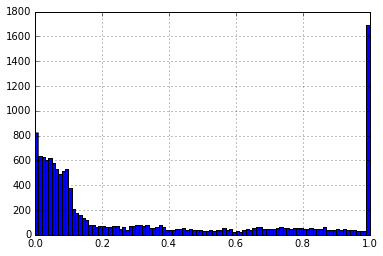

In [37]:
df2013_B.query("Fiscal_loss_pct_of_tax>0").Fiscal_loss_pct_of_tax.hist(bins = 100)

In [38]:
mln("Fiscal_loss_pct_of_tax", df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.321421
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46204
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:               0.0009380
Time:                        18:28:09   Log-Likelihood:                -14853.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 3.832e-06
==========================================================================================
          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax     0.5391      0.115      4.669      0.000         0.313     0.765
Intersect                 -3.8928      0.036   -107.436      0.000        -3.964    -3.822
------------------------------------------------------------------------------------------
             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.0899      0.123     -0.730      0.465        -0.331     0.151
Intersect                 -3.5279      0.031   -115.615      0.000        -3.588    -3.468
------------------------------------------------------------------------------------------
                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.4033      0.158     -2.558      0.011        -0.712    -0.094
Intersect                 -3.7852      0.035   -109.109      0.000        -3.853    -3.717
==========================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.320361
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46201
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                0.004231
Time:                        18:28:10   Log-Likelihood:                -14804.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 9.884e-25
==========================================================================================
          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax     0.4010      0.126      3.192      0.001         0.155     0.647
Intersect                 -3.9456      0.041    -95.159      0.000        -4.027    -3.864
Gain_fiscal_au_pacs        0.2136      0.075      2.833      0.005         0.066     0.361
------------------------------------------------------------------------------------------
             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.2289      0.131     -1.748      0.081        -0.486     0.028
Intersect                 -3.5787      0.035   -102.264      0.000        -3.647    -3.510
Gain_fiscal_au_pacs        0.2078      0.065      3.192      0.001         0.080     0.335
------------------------------------------------------------------------------------------
                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.8454      0.167     -5.076      0.000        -1.172    -0.519
Intersect                 -3.9739      0.043    -93.089      0.000        -4.058    -3.890
Gain_fiscal_au_pacs        0.6545      0.070      9.376      0.000         0.518     0.791
==========================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317007
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46195
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01466
Time:                        18:28:10   Log-Likelihood:                -14649.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 9.689e-86
==========================================================================================
          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax     0.3152      0.126      2.492      0.013         0.067     0.563
Intersect                 -2.7924      0.213    -13.094      0.000        -3.210    -2.374
Gain_fiscal_au_pacs        0.2740      0.076      3.589      0.000         0.124     0.424
Age_moyen                 -0.0390      0.007     -5.378      0.000        -0.053    -0.025
Age_elder_child            0.0332      0.012      2.840      0.005         0.010     0.056
------------------------------------------------------------------------------------------
             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.3557      0.131     -2.715      0.007        -0.613    -0.099
Intersect                 -1.7362      0.186     -9.350      0.000        -2.100    -1.372
Gain_fiscal_au_pacs        0.3072      0.066      4.656      0.000         0.178     0.437
Age_moyen                 -0.0607      0.006     -9.445      0.000        -0.073    -0.048
Age_elder_child            0.0365      0.010      3.510      0.000         0.016     0.057
------------------------------------------------------------------------------------------
                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.9070      0.167     -5.423      0.000        -1.235    -0.579
Intersect                 -2.9688      0.207    -14.335      0.000        -3.375    -2.563
Gain_fiscal_au_pacs        0.7389      0.071     10.408      0.000         0.600     0.878
Age_moyen                 -0.0175      0.007     -2.521      0.012        -0.031    -0.004
Age_elder_child           -0.1162      0.013     -8.814      0.000        -0.142    -0.090
==========================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.316405
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46189
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01653
Time:                        18:28:11   Log-Likelihood:                -14621.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 6.528e-93
==========================================================================================
          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax     0.3278      0.129      2.547      0.011         0.076     0.580
Intersect                 -2.7679      0.218    -12.685      0.000        -3.196    -2.340
Gain_fiscal_au_pacs        0.2737      0.076      3.584      0.000         0.124     0.423
Age_moyen                 -0.0396      0.007     -5.385      0.000        -0.054    -0.025
Age_elder_child            0.0363      0.013      2.770      0.006         0.011     0.062
deux_enfants              -0.0379      0.077     -0.491      0.623        -0.189     0.113
trois_enfants_et_plus     -0.0545      0.147     -0.371      0.711        -0.343     0.234
------------------------------------------------------------------------------------------
             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.5048      0.133     -3.791      0.000        -0.766    -0.244
Intersect                 -2.0132      0.192    -10.483      0.000        -2.390    -1.637
Gain_fiscal_au_pacs        0.3133      0.066      4.739      0.000         0.184     0.443
Age_moyen                 -0.0540      0.007     -8.264      0.000        -0.067    -0.041
Age_elder_child           -0.0028      0.012     -0.230      0.818        -0.026     0.021
deux_enfants               0.4592      0.068      6.793      0.000         0.327     0.592
trois_enfants_et_plus      0.5543      0.124      4.483      0.000         0.312     0.797
------------------------------------------------------------------------------------------
                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.8479      0.170     -4.994      0.000        -1.181    -0.515
Intersect                 -2.9059      0.209    -13.877      0.000        -3.316    -2.495
Gain_fiscal_au_pacs        0.7361      0.071     10.377      0.000         0.597     0.875
Age_moyen                 -0.0195      0.007     -2.778      0.005        -0.033    -0.006
Age_elder_child           -0.1018      0.015     -6.789      0.000        -0.131    -0.072
deux_enfants              -0.1078      0.081     -1.332      0.183        -0.266     0.051
trois_enfants_et_plus     -0.3975      0.205     -1.936      0.053        -0.800     0.005
==========================================================================================
"""

e
Optimization terminated successfully.
         Current function value: 0.315044
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46186
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02076
Time:                        18:28:11   Log-Likelihood:                -14558.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                3.860e-117
==========================================================================================
          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax     0.1845      0.131      1.411      0.158        -0.072     0.441
Intersect                 -2.6804      0.216    -12.388      0.000        -3.105    -2.256
Gain_fiscal_au_pacs        0.3344      0.077      4.335      0.000         0.183     0.486
Age_moyen                 -0.0284      0.008     -3.743      0.000        -0.043    -0.014
Age_elder_child            0.0301      0.013      2.297      0.022         0.004     0.056
deux_enfants              -0.0244      0.077     -0.317      0.751        -0.175     0.127
trois_enfants_et_plus     -0.0828      0.147     -0.564      0.573        -0.371     0.205
Rni                    -1.275e-05   2.81e-06     -4.531      0.000     -1.83e-05 -7.23e-06
------------------------------------------------------------------------------------------
             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.3847      0.136     -2.823      0.005        -0.652    -0.118
Intersect                 -2.0003      0.194    -10.306      0.000        -2.381    -1.620
Gain_fiscal_au_pacs        0.2402      0.068      3.524      0.000         0.107     0.374
Age_moyen                 -0.0645      0.007     -9.281      0.000        -0.078    -0.051
Age_elder_child            0.0030      0.012      0.249      0.804        -0.021     0.027
deux_enfants               0.4491      0.068      6.623      0.000         0.316     0.582
trois_enfants_et_plus      0.5713      0.124      4.610      0.000         0.328     0.814
Rni                      8.79e-06   1.63e-06      5.405      0.000       5.6e-06   1.2e-05
------------------------------------------------------------------------------------------
                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.5954      0.174     -3.415      0.001        -0.937    -0.254
Intersect                 -2.8734      0.214    -13.414      0.000        -3.293    -2.454
Gain_fiscal_au_pacs        0.6027      0.074      8.164      0.000         0.458     0.747
Age_moyen                 -0.0366      0.007     -4.888      0.000        -0.051    -0.022
Age_elder_child           -0.0904      0.015     -5.972      0.000        -0.120    -0.061
deux_enfants              -0.1414      0.081     -1.735      0.083        -0.301     0.018
trois_enfants_et_plus     -0.4665      0.211     -2.215      0.027        -0.879    -0.054
Rni                     1.387e-05   1.49e-06      9.339      0.000       1.1e-05  1.68e-05
==========================================================================================
"""

f
Optimization terminated successfully.
         Current function value: 0.314371
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02285
Time:                        18:28:12   Log-Likelihood:                -14527.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                5.246e-128
==========================================================================================
          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax     0.1845      0.130      1.414      0.157        -0.071     0.440
Intersect                 -2.6336      0.218    -12.106      0.000        -3.060    -2.207
Gain_fiscal_au_pacs        0.3297      0.077      4.278      0.000         0.179     0.481
Age_moyen                 -0.0278      0.008     -3.670      0.000        -0.043    -0.013
Age_elder_child            0.0299      0.013      2.282      0.023         0.004     0.056
deux_enfants              -0.0252      0.077     -0.328      0.743        -0.176     0.126
trois_enfants_et_plus     -0.0897      0.147     -0.610      0.542        -0.378     0.198
Rni                    -1.576e-05   3.34e-06     -4.714      0.000     -2.23e-05 -9.21e-06
Rni_squared             2.936e-05   1.04e-05      2.821      0.005      8.96e-06  4.98e-05
------------------------------------------------------------------------------------------
             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.3888      0.137     -2.844      0.004        -0.657    -0.121
Intersect                 -2.0181      0.195    -10.376      0.000        -2.399    -1.637
Gain_fiscal_au_pacs        0.2444      0.068      3.576      0.000         0.110     0.378
Age_moyen                 -0.0643      0.007     -9.110      0.000        -0.078    -0.051
Age_elder_child            0.0029      0.012      0.237      0.812        -0.021     0.027
deux_enfants               0.4502      0.068      6.639      0.000         0.317     0.583
trois_enfants_et_plus      0.5733      0.124      4.614      0.000         0.330     0.817
Rni                     9.529e-06   2.45e-06      3.894      0.000      4.73e-06  1.43e-05
Rni_squared            -8.888e-06   6.81e-06     -1.305      0.192     -2.22e-05  4.46e-06
------------------------------------------------------------------------------------------
                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax    -0.3889      0.180     -2.155      0.031        -0.743    -0.035
Intersect                 -3.1388      0.227    -13.799      0.000        -3.585    -2.693
Gain_fiscal_au_pacs        0.5190      0.076      6.845      0.000         0.370     0.668
Age_moyen                 -0.0523      0.008     -6.564      0.000        -0.068    -0.037
Age_elder_child           -0.0822      0.015     -5.408      0.000        -0.112    -0.052
deux_enfants              -0.1578      0.082     -1.926      0.054        -0.318     0.003
trois_enfants_et_plus     -0.3879      0.207     -1.875      0.061        -0.793     0.017
Rni                     3.925e-05   4.58e-06      8.572      0.000      3.03e-05  4.82e-05
Rni_squared               -0.0001   2.94e-05     -4.253 

g
Optimization terminated successfully.
         Current function value: 0.314827
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02143
Time:                        18:28:12   Log-Likelihood:                -14548.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                3.641e-119
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        0.3144      0.138      2.273      0.023         0.043     0.586
Intersect                    -2.7173      0.215    -12.616      0.000        -3.139    -2.295
Gain_fiscal_au_pacs           0.1972      0.094      2.108      0.035         0.014     0.381
Age_moyen                    -0.0281      0.008     -3.730      0.000        -0.043    -0.013
Age_elder_child               0.0303      0.013      2.316      0.021         0.005     0.056
deux_enfants                 -0.0544      0.078     -0.699      0.485        -0.207     0.098
trois_enfants_et_plus        -0.1550      0.150     -1.035      0.301        -0.449     0.139
Rni                       -1.408e-05   2.76e-06     -5.108      0.000     -1.95e-05 -8.68e-06
Diff_in_incompe_mere_pere  1.127e-05   4.28e-06      2.635      0.008      2.89e-06  1.97e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.3908      0.138     -2.823      0.005        -0.662    -0.119
Intersect                    -1.9998      0.194    -10.297      0.000        -2.380    -1.619
Gain_fiscal_au_pacs           0.2450      0.075      3.280      0.001         0.099     0.391
Age_moyen                    -0.0643      0.007     -9.122      0.000        -0.078    -0.050
Age_elder_child               0.0029      0.012      0.237      0.813        -0.021     0.027
deux_enfants                  0.4504      0.068      6.618      0.000         0.317     0.584
trois_enfants_et_plus         0.5749      0.125      4.594      0.000         0.330     0.820
Rni                        8.622e-06   2.08e-06      4.141      0.000      4.54e-06  1.27e-05
Diff_in_incompe_mere_pere -2.586e-07   2.78e-06     -0.093      0.926     -5.71e-06  5.19e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.6710      0.178     -3.766      0.000        -1.020    -0.322
Intersect                    -2.8678      0.216    -13.254      0.000        -3.292    -2.444
Gain_fiscal_au_pacs           0.7104      0.079      8.977      0.000         0.555     0.865
Age_moyen                    -0.0420      0.008     -5.419      0.000        -0.057    -0.027
Age_elder_child              -0.0874      0.015     -5.758      0.000        -0.117    -0.058
deux_enfants                 -0.1228      0.082     -1.504      0.133        -0.283     0.037
trois_enfants_et_plus        -0.4462      0.212     -2.105      0.035        -0.862    -0.031
Rni                         2.01e-05   2.32e-

h
Optimization terminated successfully.
         Current function value: 0.303688
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02146
Time:                        18:28:13   Log-Likelihood:                -9102.4
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 1.034e-69
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        0.4785      0.191      2.511      0.012         0.105     0.852
Intersect                    -2.9367      0.310     -9.486      0.000        -3.544    -2.330
Gain_fiscal_au_pacs           0.2003      0.129      1.550      0.121        -0.053     0.453
Age_moyen                    -0.0307      0.011     -2.864      0.004        -0.052    -0.010
Age_elder_child               0.0512      0.018      2.829      0.005         0.016     0.087
deux_enfants                 -0.1937      0.107     -1.807      0.071        -0.404     0.016
trois_enfants_et_plus        -0.4493      0.217     -2.066      0.039        -0.875    -0.023
Rni                       -1.332e-05    3.9e-06     -3.412      0.001      -2.1e-05 -5.67e-06
Diff_in_incompe_mere_pere  1.253e-05   5.82e-06      2.152      0.031      1.12e-06  2.39e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.3590      0.164     -2.185      0.029        -0.681    -0.037
Intersect                    -1.8446      0.241     -7.640      0.000        -2.318    -1.371
Gain_fiscal_au_pacs           0.2745      0.090      3.053      0.002         0.098     0.451
Age_moyen                    -0.0646      0.009     -7.428      0.000        -0.082    -0.048
Age_elder_child              -0.0132      0.015     -0.874      0.382        -0.043     0.016
deux_enfants                  0.5211      0.083      6.291      0.000         0.359     0.683
trois_enfants_et_plus         0.7863      0.146      5.398      0.000         0.501     1.072
Rni                         6.38e-06    2.6e-06      2.455      0.014      1.29e-06  1.15e-05
Diff_in_incompe_mere_pere  1.625e-06   3.36e-06      0.484      0.628     -4.95e-06   8.2e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.5693      0.219     -2.604      0.009        -0.998    -0.141
Intersect                    -2.7518      0.282     -9.762      0.000        -3.304    -2.199
Gain_fiscal_au_pacs           0.6831      0.101      6.769      0.000         0.485     0.881
Age_moyen                    -0.0450      0.010     -4.490      0.000        -0.065    -0.025
Age_elder_child              -0.0769      0.019     -4.030      0.000        -0.114    -0.040
deux_enfants                 -0.1350      0.102     -1.323      0.186        -0.335     0.065
trois_enfants_et_plus        -0.1998      0.236     -0.846      0.397        -0.662     0.263
Rni                        1.948e-05   3.03e-

i
Optimization terminated successfully.
         Current function value: 0.302350
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29928
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02577
Time:                        18:28:13   Log-Likelihood:                -9062.3
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 1.336e-75
==============================================================================================
              y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax         0.4917      0.190      2.583      0.010         0.119     0.865
Intersect                     -2.5920      0.340     -7.633      0.000        -3.258    -1.926
Gain_fiscal_au_pacs            0.1946      0.129      1.510      0.131        -0.058     0.447
Age_moyen                     -0.0299      0.011     -2.745      0.006        -0.051    -0.009
Age_elder_child                0.0471      0.019      2.531      0.011         0.011     0.084
deux_enfants                  -0.1835      0.108     -1.704      0.088        -0.395     0.028
trois_enfants_et_plus         -0.4480      0.218     -2.052      0.040        -0.876    -0.020
Rni                        -1.173e-05   4.19e-06     -2.799      0.005     -1.99e-05 -3.52e-06
Diff_in_incompe_mere_pere   1.129e-05   5.84e-06      1.933      0.053      -1.6e-07  2.27e-05
Vocational_education_femme    -0.4153      0.143     -2.907      0.004        -0.695    -0.135
Licence_education_femme       -0.4365      0.173     -2.517      0.012        -0.777    -0.097
Master_PhD_education_femme    -0.3134      0.204     -1.535      0.125        -0.714     0.087
Vocational_education_homme    -0.0571      0.131     -0.435      0.664        -0.315     0.201
Licence_education_homme        0.0421      0.180      0.234      0.815        -0.310     0.395
Master_PhD_education_homme    -0.0818      0.231     -0.353      0.724        -0.535     0.372
----------------------------------------------------------------------------------------------
                 y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        -0.3448      0.165     -2.087      0.037        -0.669    -0.021
Intersect                     -2.0774      0.284     -7.321      0.000        -2.633    -1.521
Gain_fiscal_au_pacs            0.2570      0.091      2.830      0.005         0.079     0.435
Age_moyen                     -0.0682      0.009     -7.535      0.000        -0.086    -0.050
Age_elder_child               -0.0052      0.016     -0.335      0.737        -0.036     0.025
deux_enfants                   0.5032      0.083      6.028      0.000         0.340     0.667
trois_enfants_et_plus          0.7674      0.147      5.226      0.000         0.480     1.055
Rni                         3.369e-06   2.78e-06      1.211      0.226     -2.08e-06  8.82e-06
Diff_in_incompe_mere_pere   3.621e-06   3.47e-06      1.042      0.297     -3.19e-06  1.04e-05
Vocational_education_femme     0.1103      0.138      0.802      0.422        -0.159     0.380
Licence_education_femme        0.3294      0.152      2.172      0.030         0.032     0.627
Master_PhD_education_femme    -0.0118      0.180     -0.066      0.947        -0.364     0.340
Vocational_education_homme     0.2898      0.117      2.482      0.013         0.061     0.519
Licence_edu

j
Optimization terminated successfully.
         Current function value: 0.313283
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02073
Time:                        18:28:14   Log-Likelihood:                -9390.0
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 2.323e-69
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        0.3426      0.171      2.007      0.045         0.008     0.677
Intersect                    -2.7171      0.267    -10.172      0.000        -3.241    -2.194
Gain_fiscal_au_pacs           0.1480      0.117      1.267      0.205        -0.081     0.377
Age_moyen                    -0.0267      0.009     -2.863      0.004        -0.045    -0.008
Age_elder_child               0.0338      0.016      2.085      0.037         0.002     0.066
deux_enfants                 -0.0627      0.097     -0.647      0.518        -0.253     0.127
trois_enfants_et_plus        -0.1813      0.186     -0.977      0.328        -0.545     0.182
Rni                       -1.582e-05   3.46e-06     -4.569      0.000     -2.26e-05 -9.03e-06
Diff_in_incompe_mere_pere  1.221e-05   5.37e-06      2.274      0.023      1.69e-06  2.27e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.4393      0.168     -2.611      0.009        -0.769    -0.110
Intersect                    -1.9462      0.242     -8.052      0.000        -2.420    -1.472
Gain_fiscal_au_pacs           0.3201      0.091      3.535      0.000         0.143     0.498
Age_moyen                    -0.0669      0.009     -7.625      0.000        -0.084    -0.050
Age_elder_child              -0.0037      0.015     -0.245      0.806        -0.034     0.026
deux_enfants                  0.5200      0.085      6.100      0.000         0.353     0.687
trois_enfants_et_plus         0.8412      0.147      5.727      0.000         0.553     1.129
Rni                         8.28e-06   2.53e-06      3.270      0.001      3.32e-06  1.32e-05
Diff_in_incompe_mere_pere -7.784e-07   3.34e-06     -0.233      0.816     -7.32e-06  5.76e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.4284      0.209     -2.050      0.040        -0.838    -0.019
Intersect                    -3.1532      0.272    -11.610      0.000        -3.686    -2.621
Gain_fiscal_au_pacs           0.6311      0.100      6.339      0.000         0.436     0.826
Age_moyen                    -0.0332      0.010     -3.448      0.001        -0.052    -0.014
Age_elder_child              -0.0923      0.019     -4.899      0.000        -0.129    -0.055
deux_enfants                 -0.0522      0.101     -0.515      0.607        -0.251     0.146
trois_enfants_et_plus        -0.3277      0.255     -1.284      0.199        -0.828     0.173
Rni                        2.036e-05   2.89e-

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02073
Time:                        18:28:14   Log-Likelihood:                -9390.0
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 2.323e-69
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        0.3426      0.171      2.007      0.045         0.008     0.677
Intersect                    -2.7171      0.267    -10.172      0.000        -3.241    -2.194
Gain_fiscal_au_pacs           0.1480      0.117      1.267      0.205        -0.081     0.377
Age_moyen                    -0.0267      0.009     -2.863      0.004        -0.045    -0.008
Age_elder_child               0.0338      0.016      2.085      0.037         0.002     0.066
deux_enfants                 -0.0627      0.097     -0.647      0.518        -0.253     0.127
trois_enfants_et_plus        -0.1813      0.186     -0.977      0.328        -0.545     0.182
Rni                       -1.582e-05   3.46e-06     -4.569      0.000     -2.26e-05 -9.03e-06
Diff_in_incompe_mere_pere  1.221e-05   5.37e-06      2.274      0.023      1.69e-06  2.27e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.4393      0.168     -2.611      0.009        -0.769    -0.110
Intersect                    -1.9462      0.242     -8.052      0.000        -2.420    -1.472
Gain_fiscal_au_pacs           0.3201      0.091      3.535      0.000         0.143     0.498
Age_moyen                    -0.0669      0.009     -7.625      0.000        -0.084    -0.050
Age_elder_child              -0.0037      0.015     -0.245      0.806        -0.034     0.026
deux_enfants                  0.5200      0.085      6.100      0.000         0.353     0.687
trois_enfants_et_plus         0.8412      0.147      5.727      0.000         0.553     1.129
Rni                         8.28e-06   2.53e-06      3.270      0.001      3.32e-06  1.32e-05
Diff_in_incompe_mere_pere -7.784e-07   3.34e-06     -0.233      0.816     -7.32e-06  5.76e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.4284      0.209     -2.050      0.040        -0.838    -0.019
Intersect                    -3.1532      0.272    -11.610      0.000        -3.686    -2.621
Gain_fiscal_au_pacs           0.6311      0.100      6.339      0.000         0.436     0.826
Age_moyen                    -0.0332      0.010     -3.448      0.001        -0.052    -0.014
Age_elder_child              -0.0923      0.019     -4.899      0.000        -0.129    -0.055
deux_enfants                 -0.0522      0.101     -0.515      0.607        -0.251     0.146
trois_enfants_et_plus        -0.3277      0.255     -1.284      0.199        -0.828     0.173
Rni                        2.036e-05   2.89e-

In [39]:
mln("Fiscal_loss_pct_of_tax", df=df2013_B, regression="g", marginal_effect = True, display_option = True)

Optimization terminated successfully.
         Current function value: 0.314827
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02143
Time:                        18:28:14   Log-Likelihood:                -14548.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                3.641e-119
=============================================================================================
             y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        0.3144      0.138      2.273      0.023         0.043     0.586
Intersect                    -2.7173      0.215    -12.616      0.000        -3.139    -2.295
Gain_fiscal_au_pacs           0.1972      0.094      2.108      0.035         0.014     0.381
Age_moyen                    -0.0281      0.008     -3.730      0.000        -0.043    -0.013
Age_elder_child               0.0303      0.013      2.316      0.021         0.005     0.056
deux_enfants                 -0.0544      0.078     -0.699      0.485        -0.207     0.098
trois_enfants_et_plus        -0.1550      0.150     -1.035      0.301        -0.449     0.139
Rni                       -1.408e-05   2.76e-06     -5.108      0.000     -1.95e-05 -8.68e-06
Diff_in_incompe_mere_pere  1.127e-05   4.28e-06      2.635      0.008      2.89e-06  1.97e-05
---------------------------------------------------------------------------------------------
                y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.3908      0.138     -2.823      0.005        -0.662    -0.119
Intersect                    -1.9998      0.194    -10.297      0.000        -2.380    -1.619
Gain_fiscal_au_pacs           0.2450      0.075      3.280      0.001         0.099     0.391
Age_moyen                    -0.0643      0.007     -9.122      0.000        -0.078    -0.050
Age_elder_child               0.0029      0.012      0.237      0.813        -0.021     0.027
deux_enfants                  0.4504      0.068      6.618      0.000         0.317     0.584
trois_enfants_et_plus         0.5749      0.125      4.594      0.000         0.330     0.820
Rni                        8.622e-06   2.08e-06      4.141      0.000      4.54e-06  1.27e-05
Diff_in_incompe_mere_pere -2.586e-07   2.78e-06     -0.093      0.926     -5.71e-06  5.19e-06
---------------------------------------------------------------------------------------------
                   y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.6710      0.178     -3.766      0.000        -1.020    -0.322
Intersect                    -2.8678      0.216    -13.254      0.000        -3.292    -2.444
Gain_fiscal_au_pacs           0.7104      0.079      8.977      0.000         0.555     0.865
Age_moyen                    -0.0420      0.008     -5.419      0.000        -0.057    -0.027
Age_elder_child              -0.0874      0.015     -5.758      0.000        -0.117    -0.058
deux_enfants                 -0.1228      0.082     -1.504      0.133        -0.283     0.037
trois_enfants_et_plus        -0.4462      0.212     -2.105      0.035        -0.862    -0.031
Rni                         2.01e-05   2.32e-

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
=============================================================================================
      y=Still_cohabitants      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        0.0166      0.006      2.930      0.003         0.005     0.028
Gain_fiscal_au_pacs          -0.0232      0.003     -7.498      0.000        -0.029    -0.017
Age_moyen                     0.0029      0.000     10.519      0.000         0.002     0.003
Age_elder_child               0.0010      0.000      2.017      0.044      2.86e-05     0.002
deux_enfants                 -0.0080      0.003     -2.847      0.004        -0.013    -0.002
trois_enfants_et_plus        -0.0031      0.006     -0.529      0.597        -0.015     0.009
Rni                       -3.313e-07   8.99e-08     -3.686      0.000     -5.07e-07 -1.55e-07
Diff_in_incompe_mere_pere -4.197e-09   1.26e-07     -0.033      0.973     -2.51e-07  2.43e-07
---------------------------------------------------------------------------------------------
             y=Separation      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax        0.0067      0.003      2.449      0.014         0.001     0.012
Gain_fiscal_au_pacs           0.0035      0.002      1.878      0.060        -0.000     0.007
Age_moyen                    -0.0005      0.000     -3.365      0.001        -0.001    -0.000
Age_elder_child               0.0006      0.000      2.443      0.015         0.000     0.001
deux_enfants                 -0.0013      0.002     -0.833      0.405        -0.004     0.002
trois_enfants_et_plus        -0.0032      0.003     -1.083      0.279        -0.009     0.003
Rni                       -2.905e-07   5.49e-08     -5.288      0.000     -3.98e-07 -1.83e-07
Diff_in_incompe_mere_pere  2.265e-07   8.45e-08      2.681      0.007      6.09e-08  3.92e-07
---------------------------------------------------------------------------------------------
                y=Mariage      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.0100      0.004     -2.755      0.006        -0.017    -0.003
Gain_fiscal_au_pacs           0.0059      0.002      3.001      0.003         0.002     0.010
Age_moyen                    -0.0016      0.000     -8.696      0.000        -0.002    -0.001
Age_elder_child               0.0001      0.000      0.352      0.725        -0.001     0.001
deux_enfants                  0.0120      0.002      6.590      0.000         0.008     0.016
trois_enfants_et_plus         0.0155      0.003      4.674      0.000         0.009     0.022
Rni                        2.224e-07   5.48e-08      4.058      0.000      1.15e-07   3.3e-07
Diff_in_incompe_mere_pere  -6.59e-09    7.3e-08     -0.090      0.928      -1.5e-07  1.36e-07
---------------------------------------------------------------------------------------------
                   y=Pacs      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Fiscal_loss_pct_of_tax       -0.0132      0.004     -3.714      0.000        -0.020    -0.006
Gain_fiscal_au_pacs           0.0139      0.002      8.557      0.000         0.011     0.017
Age_moyen                    -0.0008      0.000     -5.047      0.000        -0.001    -0.000
Age_elder_child              -0.0017      0.000     -5.723      0.000        -0.002    -0.001
de

#### Fiscal loss greater than 50, 250, 500 euros

In [40]:
for seuil_1_euros in [50,250,500]:
    mln("Fiscal_loss_greater_then_{}_euros".format(seuil_1_euros), df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.321707
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46204
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:               4.734e-05
Time:                        18:28:21   Log-Likelihood:                -14866.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                    0.7037
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0727      0.077      0.944      0.345        -0.078     0.224
Intersect                            -3.8518      0.038   -101.060      0.000        -3.927    -3.777
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0143      0.068      0.212      0.832        -0.118     0.147
Intersect                            -3.5392      0.033   -108.156      0.000        -3.603    -3.475
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0560      0.077      0.729      0.466        -0.094     0.206
Intersect                            -3.8307      0.038   -101.550      0.000        -3.905    -3.757
=====================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.320817
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46201
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                0.002814
Time:                        18:28:21   Log-Likelihood:                -14825.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 6.235e-16
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0105      0.080     -0.131      0.896        -0.167     0.146
Intersect                            -3.9273      0.043    -91.162      0.000        -4.012    -3.843
Gain_fiscal_au_pacs                   0.3002      0.072      4.173      0.000         0.159     0.441
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0336      0.070     -0.480      0.631        -0.171     0.103
Intersect                            -3.5812      0.037    -98.111      0.000        -3.653    -3.510
Gain_fiscal_au_pacs                   0.1753      0.063      2.762      0.006         0.051     0.300
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.1001      0.079     -1.260      0.208        -0.256     0.056
Intersect                            -3.9833      0.044    -90.172      0.000        -4.070    -3.897
Gain_fiscal_au_pacs                   0.5519      0.069      7.956      0.000         0.416     0.688
=====================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317522
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46195
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01306
Time:                        18:28:22   Log-Likelihood:                -14673.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 1.197e-75
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0015      0.080      0.019      0.985        -0.156     0.159
Intersect                            -2.7211      0.211    -12.887      0.000        -3.135    -2.307
Gain_fiscal_au_pacs                   0.3448      0.073      4.748      0.000         0.202     0.487
Age_moyen                            -0.0410      0.007     -5.688      0.000        -0.055    -0.027
Age_elder_child                       0.0349      0.012      2.996      0.003         0.012     0.058
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0114      0.070     -0.161      0.872        -0.149     0.127
Intersect                            -1.7976      0.185     -9.739      0.000        -2.159    -1.436
Gain_fiscal_au_pacs                   0.2418      0.064      3.770      0.000         0.116     0.367
Age_moyen                            -0.0589      0.006     -9.206      0.000        -0.071    -0.046
Age_elder_child                       0.0349      0.010      3.364      0.001         0.015     0.055
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0933      0.080     -1.170      0.242        -0.250     0.063
Intersect                            -3.1127      0.206    -15.126      0.000        -3.516    -2.709
Gain_fiscal_au_pacs                   0.6163      0.070      8.787      0.000         0.479     0.754
Age_moyen                            -0.0130      0.007     -1.885      0.059        -0.027     0.001
Age_elder_child                      -0.1204      0.013     -9.135      0.000        -0.146    -0.095
=====================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.316945
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46189
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01485
Time:                        18:28:22   Log-Likelihood:                -14646.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 1.904e-82
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0023      0.080      0.029      0.977        -0.155     0.160
Intersect                            -2.7171      0.217    -12.504      0.000        -3.143    -2.291
Gain_fiscal_au_pacs                   0.3449      0.073      4.746      0.000         0.202     0.487
Age_moyen                            -0.0411      0.007     -5.594      0.000        -0.056    -0.027
Age_elder_child                       0.0354      0.013      2.688      0.007         0.010     0.061
deux_enfants                         -0.0074      0.077     -0.097      0.923        -0.158     0.143
trois_enfants_et_plus                -0.0045      0.146     -0.031      0.975        -0.290     0.281
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0493      0.071     -0.692      0.489        -0.189     0.090
Intersect                            -2.0710      0.191    -10.819      0.000        -2.446    -1.696
Gain_fiscal_au_pacs                   0.2281      0.065      3.526      0.000         0.101     0.355
Age_moyen                            -0.0521      0.007     -7.989      0.000        -0.065    -0.039
Age_elder_child                      -0.0010      0.012     -0.079      0.937        -0.025     0.023
deux_enfants                          0.4213      0.067      6.295      0.000         0.290     0.552
trois_enfants_et_plus                 0.4927      0.123      4.020      0.000         0.253     0.733
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0660      0.080     -0.826      0.409        -0.223     0.091
Intersect                            -3.0049      0.208    -14.421      0.000        -3.413    -2.596
Gain_fiscal_au_pacs                   0.6233      0.070      8.919      0.000         0.486     0.760
Age_moyen                            -0.0163      0.007     -2.342      0.019        -0.030    -0.003
Age_elder_child                      -0.0988      0.015     -6.636      0.000        -0.128    -0.070
deux_enfants                         -0.1787      0.080     -2.236      0.025        -0.335    -0.022
trois_enfants_et_plus                -0.5232      0.204     -2.565      0.010        -0.923    -0.123
=====================================================================================================
"""

e
Optimization terminated successfully.
         Current function value: 0.315282
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46186
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02002
Time:                        18:28:23   Log-Likelihood:                -14569.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                1.634e-112
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0265      0.081      0.327      0.744        -0.132     0.185
Intersect                            -2.6529      0.215    -12.321      0.000        -3.075    -2.231
Gain_fiscal_au_pacs                   0.3722      0.073      5.109      0.000         0.229     0.515
Age_moyen                            -0.0284      0.008     -3.739      0.000        -0.043    -0.014
Age_elder_child                       0.0293      0.013      2.230      0.026         0.004     0.055
deux_enfants                         -0.0086      0.076     -0.113      0.910        -0.158     0.141
trois_enfants_et_plus                -0.0598      0.146     -0.410      0.682        -0.346     0.226
Rni                               -1.363e-05   2.76e-06     -4.929      0.000      -1.9e-05 -8.21e-06
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0539      0.071     -0.759      0.448        -0.193     0.085
Intersect                            -2.0467      0.194    -10.575      0.000        -2.426    -1.667
Gain_fiscal_au_pacs                   0.1752      0.066      2.666      0.008         0.046     0.304
Age_moyen                            -0.0642      0.007     -9.238      0.000        -0.078    -0.051
Age_elder_child                       0.0048      0.012      0.392      0.695        -0.019     0.029
deux_enfants                          0.4221      0.067      6.287      0.000         0.291     0.554
trois_enfants_et_plus                 0.5300      0.123      4.309      0.000         0.289     0.771
Rni                                9.947e-06   1.58e-06      6.276      0.000      6.84e-06  1.31e-05
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0525      0.080     -0.658      0.511        -0.209     0.104
Intersect                            -2.9520      0.213    -13.843      0.000        -3.370    -2.534
Gain_fiscal_au_pacs                   0.5203      0.072      7.255      0.000         0.380     0.661
Age_moyen                            -0.0355      0.007     -4.753      0.000        -0.050    -0.021
Age_elder_child                      -0.0880      0.015     -5.837      0.000        -0.118    -0.058
deux_enfants                         -0.1886      0.081     -2.341      0.019        -0.346    -0.031
trois_enfants_et_plus                -0.5508      0.209     -2.630      0.009  

f
Optimization terminated successfully.
         Current function value: 0.314521
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02238
Time:                        18:28:23   Log-Likelihood:                -14534.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                4.328e-125
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0326      0.081      0.402      0.688        -0.126     0.192
Intersect                            -2.6048      0.216    -12.035      0.000        -3.029    -2.181
Gain_fiscal_au_pacs                   0.3657      0.073      5.016      0.000         0.223     0.509
Age_moyen                            -0.0278      0.008     -3.670      0.000        -0.043    -0.013
Age_elder_child                       0.0291      0.013      2.219      0.026         0.003     0.055
deux_enfants                         -0.0101      0.076     -0.132      0.895        -0.160     0.139
trois_enfants_et_plus                -0.0674      0.146     -0.461      0.645        -0.354     0.219
Rni                               -1.673e-05    3.3e-06     -5.078      0.000     -2.32e-05 -1.03e-05
Rni_squared                        3.076e-05   1.04e-05      2.961      0.003      1.04e-05  5.11e-05
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0569      0.071     -0.802      0.423        -0.196     0.082
Intersect                            -2.0696      0.194    -10.672      0.000        -2.450    -1.690
Gain_fiscal_au_pacs                   0.1792      0.066      2.729      0.006         0.050     0.308
Age_moyen                            -0.0642      0.007     -9.092      0.000        -0.078    -0.050
Age_elder_child                       0.0047      0.012      0.387      0.699        -0.019     0.029
deux_enfants                          0.4233      0.067      6.303      0.000         0.292     0.555
trois_enfants_et_plus                 0.5332      0.123      4.321      0.000         0.291     0.775
Rni                                1.108e-05    2.4e-06      4.616      0.000      6.37e-06  1.58e-05
Rni_squared                       -1.142e-05   6.88e-06     -1.660      0.097     -2.49e-05  2.07e-06
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0720      0.080     -0.902      0.367        -0.228     0.084
Intersect                            -3.2083      0.226    -14.206      0.000        -3.651    -2.766
Gain_fiscal_au_pacs                   0.4726      0.073      6.486      0.000         0.330     0.615
Age_moyen                            -0.0522      0.008     -6.546      0.000        -0.068    -0.037
Age_elder_child                      -0.0809      0.015     -5.336      0.000  

g
Optimization terminated successfully.
         Current function value: 0.315095
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02060
Time:                        18:28:24   Log-Likelihood:                -14561.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                5.676e-114
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.1021      0.088      1.160      0.246        -0.070     0.275
Intersect                            -2.6714      0.215    -12.452      0.000        -3.092    -2.251
Gain_fiscal_au_pacs                   0.2611      0.089      2.925      0.003         0.086     0.436
Age_moyen                            -0.0283      0.008     -3.751      0.000        -0.043    -0.014
Age_elder_child                       0.0294      0.013      2.239      0.025         0.004     0.055
deux_enfants                         -0.0301      0.077     -0.391      0.696        -0.181     0.121
trois_enfants_et_plus                -0.1121      0.148     -0.756      0.450        -0.403     0.178
Rni                               -1.527e-05   2.81e-06     -5.430      0.000     -2.08e-05 -9.76e-06
Diff_in_incompe_mere_pere          9.786e-06   4.47e-06      2.187      0.029      1.02e-06  1.86e-05
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0460      0.075     -0.615      0.539        -0.192     0.101
Intersect                            -2.0484      0.193    -10.590      0.000        -2.427    -1.669
Gain_fiscal_au_pacs                   0.1668      0.073      2.281      0.023         0.023     0.310
Age_moyen                            -0.0635      0.007     -9.042      0.000        -0.077    -0.050
Age_elder_child                       0.0045      0.012      0.368      0.713        -0.019     0.028
deux_enfants                          0.4207      0.067      6.241      0.000         0.289     0.553
trois_enfants_et_plus                 0.5267      0.124      4.244      0.000         0.283     0.770
Rni                                9.214e-06   2.15e-06      4.293      0.000      5.01e-06  1.34e-05
Diff_in_incompe_mere_pere          8.195e-07   2.87e-06      0.286      0.775      -4.8e-06  6.44e-06
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.1338      0.083     -1.605      0.108        -0.297     0.030
Intersect                            -2.9571      0.215    -13.753      0.000        -3.378    -2.536
Gain_fiscal_au_pacs                   0.6318      0.078      8.064      0.000         0.478     0.785
Age_moyen                            -0.0404      0.008     -5.242      0.000        -0.056    -0.025
Age_elder_child                      -0.0858      0.015     -5.673      0.000  

h
Optimization terminated successfully.
         Current function value: 0.303914
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02074
Time:                        18:28:24   Log-Likelihood:                -9109.2
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 6.251e-67
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0867      0.122      0.709      0.479        -0.153     0.326
Intersect                            -2.8618      0.308     -9.280      0.000        -3.466    -2.257
Gain_fiscal_au_pacs                   0.3241      0.124      2.616      0.009         0.081     0.567
Age_moyen                            -0.0310      0.011     -2.883      0.004        -0.052    -0.010
Age_elder_child                       0.0494      0.018      2.727      0.006         0.014     0.085
deux_enfants                         -0.1524      0.106     -1.437      0.151        -0.360     0.055
trois_enfants_et_plus                -0.3768      0.216     -1.748      0.080        -0.799     0.046
Rni                               -1.469e-05   3.99e-06     -3.678      0.000     -2.25e-05 -6.86e-06
Diff_in_incompe_mere_pere          8.959e-06   6.26e-06      1.432      0.152     -3.31e-06  2.12e-05
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0301      0.090     -0.335      0.737        -0.206     0.146
Intersect                            -1.8883      0.241     -7.847      0.000        -2.360    -1.417
Gain_fiscal_au_pacs                   0.1971      0.088      2.245      0.025         0.025     0.369
Age_moyen                            -0.0639      0.009     -7.362      0.000        -0.081    -0.047
Age_elder_child                      -0.0114      0.015     -0.760      0.447        -0.041     0.018
deux_enfants                          0.4937      0.082      6.012      0.000         0.333     0.655
trois_enfants_et_plus                 0.7409      0.144      5.132      0.000         0.458     1.024
Rni                                6.746e-06   2.69e-06      2.503      0.012      1.46e-06   1.2e-05
Diff_in_incompe_mere_pere          2.821e-06   3.47e-06      0.814      0.416     -3.98e-06  9.62e-06
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.2164      0.107     -2.026      0.043        -0.426    -0.007
Intersect                            -2.8193      0.280    -10.063      0.000        -3.368    -2.270
Gain_fiscal_au_pacs                   0.6398      0.100      6.429      0.000         0.445     0.835
Age_moyen                            -0.0440      0.010     -4.399      0.000        -0.064    -0.024
Age_elder_child                      -0.0761      0.019     -3.993      0.000  

i
Optimization terminated successfully.
         Current function value: 0.302549
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29928
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02513
Time:                        18:28:25   Log-Likelihood:                -9068.3
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 3.137e-73
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0959      0.122      0.783      0.433        -0.144     0.336
Intersect                            -2.5269      0.339     -7.454      0.000        -3.191    -1.862
Gain_fiscal_au_pacs                   0.3183      0.124      2.572      0.010         0.076     0.561
Age_moyen                            -0.0300      0.011     -2.745      0.006        -0.051    -0.009
Age_elder_child                       0.0448      0.019      2.407      0.016         0.008     0.081
deux_enfants                         -0.1403      0.106     -1.318      0.188        -0.349     0.068
trois_enfants_et_plus                -0.3723      0.216     -1.722      0.085        -0.796     0.052
Rni                                 -1.3e-05   4.31e-06     -3.018      0.003     -2.14e-05 -4.56e-06
Diff_in_incompe_mere_pere          7.817e-06   6.28e-06      1.244      0.214      -4.5e-06  2.01e-05
Vocational_education_femme           -0.4108      0.143     -2.875      0.004        -0.691    -0.131
Licence_education_femme              -0.4392      0.174     -2.528      0.011        -0.780    -0.099
Master_PhD_education_femme           -0.3199      0.204     -1.565      0.117        -0.720     0.081
Vocational_education_homme           -0.0583      0.132     -0.443      0.658        -0.316     0.199
Licence_education_homme               0.0312      0.180      0.174      0.862        -0.321     0.384
Master_PhD_education_homme           -0.0904      0.232     -0.390      0.697        -0.545     0.364
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.0303      0.090     -0.336      0.737        -0.207     0.147
Intersect                            -2.1071      0.283     -7.434      0.000        -2.663    -1.552
Gain_fiscal_au_pacs                   0.1832      0.089      2.070      0.038         0.010     0.357
Age_moyen                            -0.0678      0.009     -7.501      0.000        -0.086    -0.050
Age_elder_child                      -0.0030      0.016     -0.191      0.849        -0.033     0.027
deux_enfants                          0.4760      0.083      5.756      0.000         0.314     0.638
trois_enfants_et_plus                 0.7208      0.145      4.959      0.000         0.436     1.006
Rni                                3.497e-06   2.88e-06      1.216      0.224     -2.14e-06  9.13e-06
Diff_in_incompe_mere_pere          4.773e-06   3.57e-06      1.336      0.182     -2.23e-06  1.18e-05
Vocational_education_femme            0.1079      0.137      0.785      0.433        -0.162     0.377
Licence_education_femme               0.3300      0.152      2.176      0.030  

j
Optimization terminated successfully.
         Current function value: 0.313478
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02012
Time:                        18:28:25   Log-Likelihood:                -9395.9
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 5.867e-67
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0877      0.110      0.800      0.424        -0.127     0.303
Intersect                            -2.6685      0.266    -10.026      0.000        -3.190    -2.147
Gain_fiscal_au_pacs                   0.2283      0.111      2.049      0.041         0.010     0.447
Age_moyen                            -0.0268      0.009     -2.865      0.004        -0.045    -0.008
Age_elder_child                       0.0325      0.016      2.002      0.045         0.001     0.064
deux_enfants                         -0.0330      0.096     -0.344      0.731        -0.221     0.155
trois_enfants_et_plus                -0.1326      0.184     -0.722      0.471        -0.493     0.228
Rni                               -1.701e-05   3.53e-06     -4.818      0.000     -2.39e-05 -1.01e-05
Diff_in_incompe_mere_pere          1.008e-05   5.62e-06      1.793      0.073     -9.39e-07  2.11e-05
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.1125      0.093     -1.204      0.229        -0.296     0.071
Intersect                            -1.9980      0.241     -8.301      0.000        -2.470    -1.526
Gain_fiscal_au_pacs                   0.2563      0.089      2.874      0.004         0.082     0.431
Age_moyen                            -0.0659      0.009     -7.547      0.000        -0.083    -0.049
Age_elder_child                      -0.0022      0.015     -0.148      0.883        -0.032     0.028
deux_enfants                          0.4923      0.085      5.825      0.000         0.327     0.658
trois_enfants_et_plus                 0.7948      0.146      5.461      0.000         0.510     1.080
Rni                                9.214e-06   2.61e-06      3.537      0.000      4.11e-06  1.43e-05
Diff_in_incompe_mere_pere         -5.108e-07   3.46e-06     -0.148      0.883      -7.3e-06  6.27e-06
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.1414      0.104     -1.360      0.174        -0.345     0.062
Intersect                            -3.2099      0.270    -11.903      0.000        -3.739    -2.681
Gain_fiscal_au_pacs                   0.5926      0.098      6.030      0.000         0.400     0.785
Age_moyen                            -0.0323      0.010     -3.368      0.001        -0.051    -0.013
Age_elder_child                      -0.0915      0.019     -4.869      0.000  

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02012
Time:                        18:28:25   Log-Likelihood:                -9395.9
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 5.867e-67
=====================================================================================================
                     y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros     0.0877      0.110      0.800      0.424        -0.127     0.303
Intersect                            -2.6685      0.266    -10.026      0.000        -3.190    -2.147
Gain_fiscal_au_pacs                   0.2283      0.111      2.049      0.041         0.010     0.447
Age_moyen                            -0.0268      0.009     -2.865      0.004        -0.045    -0.008
Age_elder_child                       0.0325      0.016      2.002      0.045         0.001     0.064
deux_enfants                         -0.0330      0.096     -0.344      0.731        -0.221     0.155
trois_enfants_et_plus                -0.1326      0.184     -0.722      0.471        -0.493     0.228
Rni                               -1.701e-05   3.53e-06     -4.818      0.000     -2.39e-05 -1.01e-05
Diff_in_incompe_mere_pere          1.008e-05   5.62e-06      1.793      0.073     -9.39e-07  2.11e-05
-----------------------------------------------------------------------------------------------------
                        y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.1125      0.093     -1.204      0.229        -0.296     0.071
Intersect                            -1.9980      0.241     -8.301      0.000        -2.470    -1.526
Gain_fiscal_au_pacs                   0.2563      0.089      2.874      0.004         0.082     0.431
Age_moyen                            -0.0659      0.009     -7.547      0.000        -0.083    -0.049
Age_elder_child                      -0.0022      0.015     -0.148      0.883        -0.032     0.028
deux_enfants                          0.4923      0.085      5.825      0.000         0.327     0.658
trois_enfants_et_plus                 0.7948      0.146      5.461      0.000         0.510     1.080
Rni                                9.214e-06   2.61e-06      3.537      0.000      4.11e-06  1.43e-05
Diff_in_incompe_mere_pere         -5.108e-07   3.46e-06     -0.148      0.883      -7.3e-06  6.27e-06
-----------------------------------------------------------------------------------------------------
                           y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_50_euros    -0.1414      0.104     -1.360      0.174        -0.345     0.062
Intersect                            -3.2099      0.270    -11.903      0.000        -3.739    -2.681
Gain_fiscal_au_pacs                   0.5926      0.098      6.030      0.000         0.400     0.785
Age_moyen                            -0.0323      0.010     -3.368      0.001        -0.051    -0.013
Age_elder_child                      -0.0915      0.019     -4.869      0.000  

a
Optimization terminated successfully.
         Current function value: 0.321586
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46204
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:               0.0004225
Time:                        18:28:25   Log-Likelihood:                -14861.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                  0.005685
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.3263      0.094      3.458      0.001         0.141     0.511
Intersect                             -3.8757      0.036   -108.230      0.000        -3.946    -3.806
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.0319      0.093     -0.343      0.732        -0.214     0.150
Intersect                             -3.5324      0.030   -116.631      0.000        -3.592    -3.473
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.1217      0.101      1.209      0.227        -0.076     0.319
Intersect                             -3.8315      0.035   -109.337      0.000        -3.900    -3.763
======================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.320718
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46201
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                0.003121
Time:                        18:28:26   Log-Likelihood:                -14820.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 7.939e-18
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.1722      0.106      1.618      0.106        -0.036     0.381
Intersect                             -3.9330      0.041    -95.597      0.000        -4.014    -3.852
Gain_fiscal_au_pacs                    0.2420      0.078      3.085      0.002         0.088     0.396
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.1702      0.102     -1.664      0.096        -0.371     0.030
Intersect                             -3.5833      0.035   -103.026      0.000        -3.651    -3.515
Gain_fiscal_au_pacs                    0.2169      0.068      3.212      0.001         0.085     0.349
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2497      0.109     -2.282      0.022        -0.464    -0.035
Intersect                             -3.9944      0.043    -93.916      0.000        -4.078    -3.911
Gain_fiscal_au_pacs                    0.5997      0.073      8.230      0.000         0.457     0.742
======================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317406
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46195
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01341
Time:                        18:28:26   Log-Likelihood:                -14667.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 6.553e-78
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.1572      0.107      1.474      0.140        -0.052     0.366
Intersect                             -2.7305      0.211    -12.916      0.000        -3.145    -2.316
Gain_fiscal_au_pacs                    0.2935      0.079      3.715      0.000         0.139     0.448
Age_moyen                             -0.0408      0.007     -5.657      0.000        -0.055    -0.027
Age_elder_child                        0.0348      0.012      2.988      0.003         0.012     0.058
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.1918      0.103     -1.870      0.061        -0.393     0.009
Intersect                             -1.7896      0.184     -9.705      0.000        -2.151    -1.428
Gain_fiscal_au_pacs                    0.2956      0.068      4.342      0.000         0.162     0.429
Age_moyen                             -0.0591      0.006     -9.252      0.000        -0.072    -0.047
Age_elder_child                        0.0350      0.010      3.375      0.001         0.015     0.055
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2696      0.110     -2.454      0.014        -0.485    -0.054
Intersect                             -3.1066      0.206    -15.107      0.000        -3.510    -2.704
Gain_fiscal_au_pacs                    0.6725      0.074      9.120      0.000         0.528     0.817
Age_moyen                             -0.0135      0.007     -1.960      0.050        -0.027 -3.43e-06
Age_elder_child                       -0.1201      0.013     -9.113      0.000        -0.146    -0.094
======================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.316807
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46189
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01528
Time:                        18:28:27   Log-Likelihood:                -14640.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 4.125e-85
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.1607      0.107      1.496      0.135        -0.050     0.371
Intersect                             -2.7181      0.217    -12.503      0.000        -3.144    -2.292
Gain_fiscal_au_pacs                    0.2934      0.079      3.712      0.000         0.139     0.448
Age_moyen                             -0.0411      0.007     -5.597      0.000        -0.056    -0.027
Age_elder_child                        0.0363      0.013      2.761      0.006         0.011     0.062
deux_enfants                          -0.0207      0.077     -0.269      0.788        -0.171     0.130
trois_enfants_et_plus                 -0.0171      0.146     -0.117      0.907        -0.303     0.269
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2703      0.103     -2.613      0.009        -0.473    -0.068
Intersect                             -2.0736      0.191    -10.834      0.000        -2.449    -1.698
Gain_fiscal_au_pacs                    0.2962      0.068      4.342      0.000         0.163     0.430
Age_moyen                             -0.0522      0.007     -8.017      0.000        -0.065    -0.039
Age_elder_child                       -0.0023      0.012     -0.192      0.848        -0.026     0.021
deux_enfants                           0.4382      0.067      6.524      0.000         0.307     0.570
trois_enfants_et_plus                  0.5103      0.123      4.156      0.000         0.270     0.751
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2310      0.111     -2.083      0.037        -0.448    -0.014
Intersect                             -3.0053      0.208    -14.423      0.000        -3.414    -2.597
Gain_fiscal_au_pacs                    0.6737      0.074      9.141      0.000         0.529     0.818
Age_moyen                             -0.0166      0.007     -2.378      0.017        -0.030    -0.003
Age_elder_child                       -0.0999      0.015     -6.697      0.000        -0.129    -0.071
deux_enfants                          -0.1625      0.080     -2.025      0.043        -0.320    -0.005
trois_enfants_et_plus                 -0.5066      0.204     -2.482      0.013        -0.907    -0.107
======================================================================================================
"""

e
Optimization terminated successfully.
         Current function value: 0.315164
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46186
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02038
Time:                        18:28:27   Log-Likelihood:                -14564.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                8.368e-115
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.1640      0.107      1.527      0.127        -0.047     0.375
Intersect                             -2.6504      0.215    -12.303      0.000        -3.073    -2.228
Gain_fiscal_au_pacs                    0.3259      0.079      4.127      0.000         0.171     0.481
Age_moyen                             -0.0284      0.008     -3.735      0.000        -0.043    -0.013
Age_elder_child                        0.0300      0.013      2.286      0.022         0.004     0.056
deux_enfants                          -0.0199      0.077     -0.260      0.795        -0.170     0.130
trois_enfants_et_plus                 -0.0700      0.146     -0.479      0.632        -0.356     0.216
Rni                                -1.366e-05   2.77e-06     -4.936      0.000     -1.91e-05 -8.23e-06
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2594      0.104     -2.504      0.012        -0.462    -0.056
Intersect                             -2.0473      0.193    -10.580      0.000        -2.427    -1.668
Gain_fiscal_au_pacs                    0.2401      0.070      3.454      0.001         0.104     0.376
Age_moyen                             -0.0642      0.007     -9.250      0.000        -0.078    -0.051
Age_elder_child                        0.0034      0.012      0.279      0.780        -0.020     0.027
deux_enfants                           0.4381      0.067      6.498      0.000         0.306     0.570
trois_enfants_et_plus                  0.5474      0.123      4.441      0.000         0.306     0.789
Rni                                 9.801e-06   1.58e-06      6.192      0.000       6.7e-06  1.29e-05
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.1950      0.112     -1.746      0.081        -0.414     0.024
Intersect                             -2.9500      0.213    -13.838      0.000        -3.368    -2.532
Gain_fiscal_au_pacs                    0.5650      0.076      7.438      0.000         0.416     0.714
Age_moyen                             -0.0357      0.007     -4.772      0.000        -0.050    -0.021
Age_elder_child                       -0.0891      0.015     -5.896      0.000        -0.119    -0.059
deux_enfants                          -0.1742      0.081     -2.153      0.031        -0.333    -0.016
trois_enfants_et_plus                 -0.5343   

f
Optimization terminated successfully.
         Current function value: 0.314406
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02274
Time:                        18:28:28   Log-Likelihood:                -14529.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                2.533e-127
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.1697      0.107      1.579      0.114        -0.041     0.380
Intersect                             -2.6016      0.217    -12.015      0.000        -3.026    -2.177
Gain_fiscal_au_pacs                    0.3191      0.079      4.040      0.000         0.164     0.474
Age_moyen                             -0.0278      0.008     -3.662      0.000        -0.043    -0.013
Age_elder_child                        0.0298      0.013      2.273      0.023         0.004     0.055
deux_enfants                          -0.0213      0.076     -0.278      0.781        -0.171     0.129
trois_enfants_et_plus                 -0.0776      0.146     -0.531      0.595        -0.364     0.209
Rni                                 -1.68e-05   3.29e-06     -5.102      0.000     -2.33e-05 -1.03e-05
Rni_squared                         3.103e-05   1.03e-05      3.017      0.003      1.09e-05  5.12e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2620      0.104     -2.530      0.011        -0.465    -0.059
Intersect                             -2.0699      0.194    -10.677      0.000        -2.450    -1.690
Gain_fiscal_au_pacs                    0.2441      0.070      3.512      0.000         0.108     0.380
Age_moyen                             -0.0643      0.007     -9.103      0.000        -0.078    -0.050
Age_elder_child                        0.0034      0.012      0.275      0.783        -0.021     0.027
deux_enfants                           0.4391      0.067      6.514      0.000         0.307     0.571
trois_enfants_et_plus                  0.5507      0.124      4.454      0.000         0.308     0.793
Rni                                 1.092e-05   2.39e-06      4.560      0.000      6.23e-06  1.56e-05
Rni_squared                        -1.124e-05    6.9e-06     -1.630      0.103     -2.48e-05  2.28e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.1931      0.112     -1.728      0.084        -0.412     0.026
Intersect                             -3.2054      0.226    -14.196      0.000        -3.648    -2.763
Gain_fiscal_au_pacs                    0.5139      0.077      6.644      0.000         0.362     0.665
Age_moyen                             -0.0523      0.008     -6.566      0.000        -0.068    -0.037
Age_elder_child                       -0.0818   

g
Optimization terminated successfully.
         Current function value: 0.314945
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02107
Time:                        18:28:28   Log-Likelihood:                -14554.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                7.181e-117
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.2664      0.114      2.332      0.020         0.042     0.490
Intersect                             -2.6700      0.214    -12.458      0.000        -3.090    -2.250
Gain_fiscal_au_pacs                    0.1875      0.096      1.955      0.051        -0.001     0.375
Age_moyen                             -0.0281      0.008     -3.728      0.000        -0.043    -0.013
Age_elder_child                        0.0301      0.013      2.297      0.022         0.004     0.056
deux_enfants                          -0.0458      0.077     -0.593      0.553        -0.197     0.105
trois_enfants_et_plus                 -0.1331      0.148     -0.896      0.370        -0.424     0.158
Rni                                -1.543e-05   2.77e-06     -5.561      0.000     -2.09e-05 -9.99e-06
Diff_in_incompe_mere_pere           1.122e-05   4.31e-06      2.601      0.009      2.77e-06  1.97e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2621      0.107     -2.449      0.014        -0.472    -0.052
Intersect                             -2.0472      0.194    -10.578      0.000        -2.427    -1.668
Gain_fiscal_au_pacs                    0.2464      0.078      3.177      0.001         0.094     0.398
Age_moyen                             -0.0640      0.007     -9.096      0.000        -0.078    -0.050
Age_elder_child                        0.0033      0.012      0.273      0.785        -0.021     0.027
deux_enfants                           0.4393      0.068      6.490      0.000         0.307     0.572
trois_enfants_et_plus                  0.5513      0.124      4.431      0.000         0.307     0.795
Rni                                 9.696e-06   2.11e-06      4.587      0.000      5.55e-06  1.38e-05
Diff_in_incompe_mere_pere          -4.582e-07   2.83e-06     -0.162      0.872     -6.01e-06   5.1e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.2883      0.115     -2.515      0.012        -0.513    -0.064
Intersect                             -2.9587      0.215    -13.753      0.000        -3.380    -2.537
Gain_fiscal_au_pacs                    0.6919      0.083      8.339      0.000         0.529     0.855
Age_moyen                             -0.0410      0.008     -5.302      0.000        -0.056    -0.026
Age_elder_child                       -0.0866   

h
Optimization terminated successfully.
         Current function value: 0.303723
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02135
Time:                        18:28:28   Log-Likelihood:                -9103.5
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 2.805e-69
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.2924      0.160      1.829      0.067        -0.021     0.606
Intersect                             -2.8653      0.308     -9.304      0.000        -3.469    -2.262
Gain_fiscal_au_pacs                    0.2288      0.134      1.702      0.089        -0.035     0.492
Age_moyen                             -0.0307      0.011     -2.863      0.004        -0.052    -0.010
Age_elder_child                        0.0503      0.018      2.778      0.005         0.015     0.086
deux_enfants                          -0.1726      0.106     -1.621      0.105        -0.381     0.036
trois_enfants_et_plus                 -0.4061      0.216     -1.880      0.060        -0.830     0.017
Rni                                -1.499e-05   3.93e-06     -3.810      0.000     -2.27e-05 -7.28e-06
Diff_in_incompe_mere_pere           1.129e-05   6.02e-06      1.876      0.061     -5.05e-07  2.31e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.3111      0.130     -2.390      0.017        -0.566    -0.056
Intersect                             -1.8836      0.241     -7.822      0.000        -2.356    -1.412
Gain_fiscal_au_pacs                    0.3008      0.093      3.224      0.001         0.118     0.484
Age_moyen                             -0.0646      0.009     -7.431      0.000        -0.082    -0.048
Age_elder_child                       -0.0129      0.015     -0.855      0.392        -0.042     0.017
deux_enfants                           0.5175      0.082      6.275      0.000         0.356     0.679
trois_enfants_et_plus                  0.7745      0.145      5.350      0.000         0.491     1.058
Rni                                 7.535e-06   2.64e-06      2.854      0.004      2.36e-06  1.27e-05
Diff_in_incompe_mere_pere           9.328e-07   3.42e-06      0.273      0.785     -5.78e-06  7.64e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.3922      0.150     -2.610      0.009        -0.687    -0.098
Intersect                             -2.8199      0.280    -10.053      0.000        -3.370    -2.270
Gain_fiscal_au_pacs                    0.7107      0.105      6.753      0.000         0.504     0.917
Age_moyen                             -0.0447      0.010     -4.461      0.000        -0.064    -0.025
Age_elder_child                       -0.0768   

i
Optimization terminated successfully.
         Current function value: 0.302379
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29928
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02568
Time:                        18:28:29   Log-Likelihood:                -9063.2
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 2.958e-75
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.3037      0.160      1.899      0.058        -0.010     0.617
Intersect                             -2.5236      0.339     -7.453      0.000        -3.187    -1.860
Gain_fiscal_au_pacs                    0.2220      0.134      1.653      0.098        -0.041     0.485
Age_moyen                             -0.0298      0.011     -2.734      0.006        -0.051    -0.008
Age_elder_child                        0.0460      0.019      2.469      0.014         0.009     0.082
deux_enfants                          -0.1613      0.107     -1.508      0.132        -0.371     0.048
trois_enfants_et_plus                 -0.4030      0.217     -1.859      0.063        -0.828     0.022
Rni                                -1.336e-05   4.25e-06     -3.147      0.002     -2.17e-05 -5.04e-06
Diff_in_incompe_mere_pere           1.007e-05   6.05e-06      1.664      0.096     -1.79e-06  2.19e-05
Vocational_education_femme            -0.4129      0.143     -2.889      0.004        -0.693    -0.133
Licence_education_femme               -0.4405      0.174     -2.538      0.011        -0.781    -0.100
Master_PhD_education_femme            -0.3183      0.204     -1.558      0.119        -0.719     0.082
Vocational_education_homme            -0.0588      0.132     -0.447      0.655        -0.317     0.199
Licence_education_homme                0.0376      0.180      0.209      0.834        -0.315     0.390
Master_PhD_education_homme            -0.0813      0.232     -0.351      0.726        -0.536     0.373
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.3035      0.131     -2.320      0.020        -0.560    -0.047
Intersect                             -2.1134      0.284     -7.453      0.000        -2.669    -1.558
Gain_fiscal_au_pacs                    0.2853      0.094      3.025      0.002         0.100     0.470
Age_moyen                             -0.0683      0.009     -7.541      0.000        -0.086    -0.051
Age_elder_child                       -0.0049      0.016     -0.312      0.755        -0.035     0.026
deux_enfants                           0.5001      0.083      6.020      0.000         0.337     0.663
trois_enfants_et_plus                  0.7556      0.146      5.183      0.000         0.470     1.041
Rni                                 4.413e-06   2.83e-06      1.561      0.118     -1.13e-06  9.95e-06
Diff_in_incompe_mere_pere           2.884e-06   3.54e-06      0.816      0.415     -4.05e-06  9.81e-06
Vocational_education_femme             0.1105      0.138      0.803      0.422        -0.159     0.380
Licence_education_femme                0.3334   

j
Optimization terminated successfully.
         Current function value: 0.313303
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02067
Time:                        18:28:29   Log-Likelihood:                -9390.6
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 4.140e-69
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.2925      0.141      2.067      0.039         0.015     0.570
Intersect                             -2.6686      0.266    -10.036      0.000        -3.190    -2.147
Gain_fiscal_au_pacs                    0.1369      0.120      1.146      0.252        -0.097     0.371
Age_moyen                             -0.0266      0.009     -2.846      0.004        -0.045    -0.008
Age_elder_child                        0.0335      0.016      2.060      0.039         0.002     0.065
deux_enfants                          -0.0527      0.096     -0.549      0.583        -0.241     0.135
trois_enfants_et_plus                 -0.1600      0.184     -0.869      0.385        -0.521     0.201
Rni                                -1.733e-05   3.48e-06     -4.975      0.000     -2.42e-05 -1.05e-05
Diff_in_incompe_mere_pere           1.219e-05    5.4e-06      2.257      0.024       1.6e-06  2.28e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.3698      0.132     -2.793      0.005        -0.629    -0.110
Intersect                             -1.9963      0.241     -8.287      0.000        -2.468    -1.524
Gain_fiscal_au_pacs                    0.3468      0.094      3.705      0.000         0.163     0.530
Age_moyen                             -0.0667      0.009     -7.620      0.000        -0.084    -0.050
Age_elder_child                       -0.0034      0.015     -0.225      0.822        -0.033     0.026
deux_enfants                           0.5133      0.085      6.053      0.000         0.347     0.680
trois_enfants_et_plus                  0.8221      0.146      5.638      0.000         0.536     1.108
Rni                                 9.657e-06   2.57e-06      3.763      0.000      4.63e-06  1.47e-05
Diff_in_incompe_mere_pere          -1.643e-06   3.42e-06     -0.481      0.630     -8.34e-06  5.05e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.1938      0.141     -1.378      0.168        -0.470     0.082
Intersect                             -3.2150      0.270    -11.917      0.000        -3.744    -2.686
Gain_fiscal_au_pacs                    0.6203      0.105      5.918      0.000         0.415     0.826
Age_moyen                             -0.0326      0.010     -3.392      0.001        -0.051    -0.014
Age_elder_child                       -0.0917   

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02067
Time:                        18:28:29   Log-Likelihood:                -9390.6
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 4.140e-69
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros     0.2925      0.141      2.067      0.039         0.015     0.570
Intersect                             -2.6686      0.266    -10.036      0.000        -3.190    -2.147
Gain_fiscal_au_pacs                    0.1369      0.120      1.146      0.252        -0.097     0.371
Age_moyen                             -0.0266      0.009     -2.846      0.004        -0.045    -0.008
Age_elder_child                        0.0335      0.016      2.060      0.039         0.002     0.065
deux_enfants                          -0.0527      0.096     -0.549      0.583        -0.241     0.135
trois_enfants_et_plus                 -0.1600      0.184     -0.869      0.385        -0.521     0.201
Rni                                -1.733e-05   3.48e-06     -4.975      0.000     -2.42e-05 -1.05e-05
Diff_in_incompe_mere_pere           1.219e-05    5.4e-06      2.257      0.024       1.6e-06  2.28e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.3698      0.132     -2.793      0.005        -0.629    -0.110
Intersect                             -1.9963      0.241     -8.287      0.000        -2.468    -1.524
Gain_fiscal_au_pacs                    0.3468      0.094      3.705      0.000         0.163     0.530
Age_moyen                             -0.0667      0.009     -7.620      0.000        -0.084    -0.050
Age_elder_child                       -0.0034      0.015     -0.225      0.822        -0.033     0.026
deux_enfants                           0.5133      0.085      6.053      0.000         0.347     0.680
trois_enfants_et_plus                  0.8221      0.146      5.638      0.000         0.536     1.108
Rni                                 9.657e-06   2.57e-06      3.763      0.000      4.63e-06  1.47e-05
Diff_in_incompe_mere_pere          -1.643e-06   3.42e-06     -0.481      0.630     -8.34e-06  5.05e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_250_euros    -0.1938      0.141     -1.378      0.168        -0.470     0.082
Intersect                             -3.2150      0.270    -11.917      0.000        -3.744    -2.686
Gain_fiscal_au_pacs                    0.6203      0.105      5.918      0.000         0.415     0.826
Age_moyen                             -0.0326      0.010     -3.392      0.001        -0.051    -0.014
Age_elder_child                       -0.0917   

a
Optimization terminated successfully.
         Current function value: 0.321587
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46204
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:               0.0004199
Time:                        18:28:30   Log-Likelihood:                -14861.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                  0.005892
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.3784      0.116      3.260      0.001         0.151     0.606
Intersect                             -3.8633      0.035   -111.273      0.000        -3.931    -3.795
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.0287      0.116      0.248      0.804        -0.198     0.256
Intersect                             -3.5377      0.030   -119.439      0.000        -3.596    -3.480
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.2214      0.123      1.805      0.071        -0.019     0.462
Intersect                             -3.8331      0.034   -112.049      0.000        -3.900    -3.766
======================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.320782
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46201
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                0.002922
Time:                        18:28:30   Log-Likelihood:                -14823.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 1.337e-16
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.1928      0.128      1.501      0.133        -0.059     0.444
Intersect                             -3.9290      0.041    -95.705      0.000        -4.009    -3.849
Gain_fiscal_au_pacs                    0.2517      0.077      3.271      0.001         0.101     0.402
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1138      0.126     -0.906      0.365        -0.360     0.132
Intersect                             -3.5866      0.035   -103.270      0.000        -3.655    -3.519
Gain_fiscal_au_pacs                    0.1917      0.067      2.882      0.004         0.061     0.322
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1779      0.131     -1.356      0.175        -0.435     0.079
Intersect                             -3.9992      0.042    -94.116      0.000        -4.082    -3.916
Gain_fiscal_au_pacs                    0.5660      0.072      7.891      0.000         0.425     0.707
======================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317478
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46195
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01319
Time:                        18:28:30   Log-Likelihood:                -14671.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 1.681e-76
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.1889      0.128      1.470      0.142        -0.063     0.441
Intersect                             -2.7215      0.211    -12.884      0.000        -3.136    -2.307
Gain_fiscal_au_pacs                    0.2998      0.077      3.874      0.000         0.148     0.452
Age_moyen                             -0.0410      0.007     -5.686      0.000        -0.055    -0.027
Age_elder_child                        0.0350      0.012      3.006      0.003         0.012     0.058
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1192      0.126     -0.948      0.343        -0.366     0.127
Intersect                             -1.7986      0.184     -9.749      0.000        -2.160    -1.437
Gain_fiscal_au_pacs                    0.2644      0.067      3.952      0.000         0.133     0.396
Age_moyen                             -0.0589      0.006     -9.219      0.000        -0.071    -0.046
Age_elder_child                        0.0349      0.010      3.361      0.001         0.015     0.055
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1956      0.131     -1.488      0.137        -0.453     0.062
Intersect                             -3.1232      0.206    -15.181      0.000        -3.526    -2.720
Gain_fiscal_au_pacs                    0.6356      0.072      8.779      0.000         0.494     0.777
Age_moyen                             -0.0131      0.007     -1.902      0.057        -0.027     0.000
Age_elder_child                       -0.1205      0.013     -9.137      0.000        -0.146    -0.095
======================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.316892
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46189
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01501
Time:                        18:28:31   Log-Likelihood:                -14644.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 1.800e-83
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.1914      0.129      1.484      0.138        -0.061     0.444
Intersect                             -2.7113      0.217    -12.472      0.000        -3.137    -2.285
Gain_fiscal_au_pacs                    0.3001      0.077      3.875      0.000         0.148     0.452
Age_moyen                             -0.0413      0.007     -5.616      0.000        -0.056    -0.027
Age_elder_child                        0.0362      0.013      2.755      0.006         0.010     0.062
deux_enfants                          -0.0170      0.077     -0.222      0.824        -0.167     0.133
trois_enfants_et_plus                 -0.0135      0.146     -0.093      0.926        -0.299     0.272
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1878      0.126     -1.488      0.137        -0.435     0.060
Intersect                             -2.0783      0.192    -10.851      0.000        -2.454    -1.703
Gain_fiscal_au_pacs                    0.2557      0.067      3.818      0.000         0.124     0.387
Age_moyen                             -0.0522      0.007     -8.001      0.000        -0.065    -0.039
Age_elder_child                       -0.0014      0.012     -0.117      0.907        -0.025     0.022
deux_enfants                           0.4260      0.067      6.366      0.000         0.295     0.557
trois_enfants_et_plus                  0.4984      0.123      4.064      0.000         0.258     0.739
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1588      0.132     -1.201      0.230        -0.418     0.100
Intersect                             -3.0132      0.208    -14.453      0.000        -3.422    -2.605
Gain_fiscal_au_pacs                    0.6416      0.072      8.858      0.000         0.500     0.784
Age_moyen                             -0.0164      0.007     -2.352      0.019        -0.030    -0.003
Age_elder_child                       -0.0991      0.015     -6.651      0.000        -0.128    -0.070
deux_enfants                          -0.1759      0.080     -2.204      0.028        -0.332    -0.019
trois_enfants_et_plus                 -0.5212      0.204     -2.556      0.011        -0.921    -0.122
======================================================================================================
"""

e
Optimization terminated successfully.
         Current function value: 0.315220
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46186
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02021
Time:                        18:28:31   Log-Likelihood:                -14566.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                1.032e-113
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.2120      0.129      1.641      0.101        -0.041     0.465
Intersect                             -2.6434      0.215    -12.270      0.000        -3.066    -2.221
Gain_fiscal_au_pacs                    0.3291      0.077      4.254      0.000         0.177     0.481
Age_moyen                             -0.0284      0.008     -3.744      0.000        -0.043    -0.014
Age_elder_child                        0.0299      0.013      2.280      0.023         0.004     0.056
deux_enfants                          -0.0169      0.076     -0.221      0.825        -0.166     0.133
trois_enfants_et_plus                 -0.0669      0.146     -0.458      0.647        -0.353     0.219
Rni                                -1.373e-05   2.76e-06     -4.968      0.000     -1.91e-05 -8.31e-06
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1989      0.126     -1.573      0.116        -0.447     0.049
Intersect                             -2.0539      0.194    -10.607      0.000        -2.433    -1.674
Gain_fiscal_au_pacs                    0.2044      0.068      3.002      0.003         0.071     0.338
Age_moyen                             -0.0643      0.007     -9.256      0.000        -0.078    -0.051
Age_elder_child                        0.0043      0.012      0.351      0.726        -0.020     0.028
deux_enfants                           0.4272      0.067      6.360      0.000         0.296     0.559
trois_enfants_et_plus                  0.5373      0.123      4.364      0.000         0.296     0.779
Rni                                 9.979e-06   1.59e-06      6.296      0.000      6.87e-06  1.31e-05
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1623      0.133     -1.217      0.223        -0.424     0.099
Intersect                             -2.9588      0.213    -13.876      0.000        -3.377    -2.541
Gain_fiscal_au_pacs                    0.5428      0.074      7.292      0.000         0.397     0.689
Age_moyen                             -0.0356      0.007     -4.765      0.000        -0.050    -0.021
Age_elder_child                       -0.0885      0.015     -5.863      0.000        -0.118    -0.059
deux_enfants                          -0.1836      0.081     -2.279      0.023        -0.341    -0.026
trois_enfants_et_plus                 -0.5444   

f
Optimization terminated successfully.
         Current function value: 0.314459
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02258
Time:                        18:28:32   Log-Likelihood:                -14531.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                2.679e-126
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.2173      0.129      1.682      0.093        -0.036     0.471
Intersect                             -2.5945      0.217    -11.982      0.000        -3.019    -2.170
Gain_fiscal_au_pacs                    0.3229      0.077      4.173      0.000         0.171     0.475
Age_moyen                             -0.0279      0.008     -3.672      0.000        -0.043    -0.013
Age_elder_child                        0.0297      0.013      2.267      0.023         0.004     0.055
deux_enfants                          -0.0180      0.076     -0.236      0.813        -0.167     0.131
trois_enfants_et_plus                 -0.0743      0.146     -0.509      0.611        -0.360     0.212
Rni                                -1.687e-05   3.29e-06     -5.126      0.000     -2.33e-05 -1.04e-05
Rni_squared                         3.106e-05   1.03e-05      3.007      0.003      1.08e-05  5.13e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.2007      0.126     -1.588      0.112        -0.448     0.047
Intersect                             -2.0769      0.194    -10.704      0.000        -2.457    -1.697
Gain_fiscal_au_pacs                    0.2081      0.068      3.056      0.002         0.075     0.342
Age_moyen                             -0.0643      0.007     -9.107      0.000        -0.078    -0.050
Age_elder_child                        0.0042      0.012      0.347      0.728        -0.020     0.028
deux_enfants                           0.4282      0.067      6.374      0.000         0.297     0.560
trois_enfants_et_plus                  0.5404      0.124      4.375      0.000         0.298     0.783
Rni                                  1.11e-05    2.4e-06      4.627      0.000       6.4e-06  1.58e-05
Rni_squared                        -1.139e-05   6.87e-06     -1.658      0.097     -2.49e-05  2.08e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1808      0.133     -1.358      0.175        -0.442     0.080
Intersect                             -3.2146      0.226    -14.238      0.000        -3.657    -2.772
Gain_fiscal_au_pacs                    0.4955      0.076      6.553      0.000         0.347     0.644
Age_moyen                             -0.0523      0.008     -6.563      0.000        -0.068    -0.037
Age_elder_child                       -0.0814   

g
Optimization terminated successfully.
         Current function value: 0.315037
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02078
Time:                        18:28:32   Log-Likelihood:                -14558.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                4.400e-115
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.2819      0.133      2.122      0.034         0.022     0.542
Intersect                             -2.6591      0.214    -12.399      0.000        -3.079    -2.239
Gain_fiscal_au_pacs                    0.2207      0.091      2.415      0.016         0.042     0.400
Age_moyen                             -0.0282      0.008     -3.741      0.000        -0.043    -0.013
Age_elder_child                        0.0298      0.013      2.274      0.023         0.004     0.055
deux_enfants                          -0.0355      0.077     -0.463      0.644        -0.186     0.115
trois_enfants_et_plus                 -0.1174      0.148     -0.794      0.427        -0.407     0.172
Rni                                -1.523e-05   2.77e-06     -5.497      0.000     -2.07e-05  -9.8e-06
Diff_in_incompe_mere_pere           9.689e-06   4.21e-06      2.301      0.021      1.44e-06  1.79e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1902      0.128     -1.485      0.137        -0.441     0.061
Intersect                             -2.0551      0.194    -10.620      0.000        -2.434    -1.676
Gain_fiscal_au_pacs                    0.1966      0.074      2.644      0.008         0.051     0.342
Age_moyen                             -0.0636      0.007     -9.054      0.000        -0.077    -0.050
Age_elder_child                        0.0040      0.012      0.326      0.744        -0.020     0.028
deux_enfants                           0.4260      0.067      6.326      0.000         0.294     0.558
trois_enfants_et_plus                  0.5344      0.124      4.305      0.000         0.291     0.778
Rni                                 9.309e-06   2.11e-06      4.411      0.000      5.17e-06  1.34e-05
Diff_in_incompe_mere_pere           7.527e-07   2.77e-06      0.272      0.786     -4.67e-06  6.17e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.2238      0.135     -1.663      0.096        -0.487     0.040
Intersect                             -2.9715      0.215    -13.819      0.000        -3.393    -2.550
Gain_fiscal_au_pacs                    0.6437      0.080      8.065      0.000         0.487     0.800
Age_moyen                             -0.0404      0.008     -5.238      0.000        -0.056    -0.025
Age_elder_child                       -0.0860   

h
Optimization terminated successfully.
         Current function value: 0.303934
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02067
Time:                        18:28:33   Log-Likelihood:                -9109.8
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 1.116e-66
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.1300      0.194      0.670      0.503        -0.251     0.511
Intersect                             -2.8559      0.308     -9.265      0.000        -3.460    -2.252
Gain_fiscal_au_pacs                    0.3228      0.127      2.539      0.011         0.074     0.572
Age_moyen                             -0.0309      0.011     -2.874      0.004        -0.052    -0.010
Age_elder_child                        0.0494      0.018      2.726      0.006         0.014     0.085
deux_enfants                          -0.1512      0.106     -1.427      0.154        -0.359     0.056
trois_enfants_et_plus                 -0.3731      0.215     -1.733      0.083        -0.795     0.049
Rni                                -1.438e-05   3.93e-06     -3.662      0.000     -2.21e-05 -6.69e-06
Diff_in_incompe_mere_pere           8.123e-06   5.92e-06      1.372      0.170     -3.48e-06  1.97e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.2211      0.157     -1.412      0.158        -0.528     0.086
Intersect                             -1.8953      0.241     -7.872      0.000        -2.367    -1.423
Gain_fiscal_au_pacs                    0.2392      0.089      2.674      0.008         0.064     0.415
Age_moyen                             -0.0641      0.009     -7.383      0.000        -0.081    -0.047
Age_elder_child                       -0.0121      0.015     -0.805      0.421        -0.042     0.017
deux_enfants                           0.5020      0.082      6.115      0.000         0.341     0.663
trois_enfants_et_plus                  0.7526      0.144      5.212      0.000         0.470     1.036
Rni                                 7.056e-06   2.64e-06      2.675      0.007      1.89e-06  1.22e-05
Diff_in_incompe_mere_pere           2.493e-06   3.35e-06      0.745      0.456     -4.07e-06  9.05e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1812      0.172     -1.051      0.293        -0.519     0.157
Intersect                             -2.8406      0.280    -10.135      0.000        -3.390    -2.291
Gain_fiscal_au_pacs                    0.6181      0.102      6.061      0.000         0.418     0.818
Age_moyen                             -0.0437      0.010     -4.370      0.000        -0.063    -0.024
Age_elder_child                       -0.0756   

i
Optimization terminated successfully.
         Current function value: 0.302558
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29928
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02510
Time:                        18:28:33   Log-Likelihood:                -9068.6
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 3.976e-73
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.1397      0.194      0.718      0.472        -0.241     0.521
Intersect                             -2.5202      0.339     -7.432      0.000        -3.185    -1.856
Gain_fiscal_au_pacs                    0.3179      0.127      2.501      0.012         0.069     0.567
Age_moyen                             -0.0299      0.011     -2.739      0.006        -0.051    -0.008
Age_elder_child                        0.0449      0.019      2.408      0.016         0.008     0.081
deux_enfants                          -0.1389      0.106     -1.305      0.192        -0.348     0.070
trois_enfants_et_plus                 -0.3680      0.216     -1.704      0.088        -0.791     0.055
Rni                                -1.268e-05   4.25e-06     -2.984      0.003      -2.1e-05 -4.35e-06
Diff_in_incompe_mere_pere           6.882e-06   5.97e-06      1.153      0.249     -4.82e-06  1.86e-05
Vocational_education_femme            -0.4100      0.143     -2.870      0.004        -0.690    -0.130
Licence_education_femme               -0.4359      0.174     -2.511      0.012        -0.776    -0.096
Master_PhD_education_femme            -0.3185      0.204     -1.558      0.119        -0.719     0.082
Vocational_education_homme            -0.0584      0.132     -0.444      0.657        -0.316     0.199
Licence_education_homme                0.0317      0.180      0.176      0.860        -0.321     0.384
Master_PhD_education_homme            -0.0920      0.232     -0.397      0.691        -0.546     0.362
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.2090      0.157     -1.331      0.183        -0.517     0.099
Intersect                             -2.1174      0.284     -7.466      0.000        -2.673    -1.562
Gain_fiscal_au_pacs                    0.2236      0.090      2.479      0.013         0.047     0.400
Age_moyen                             -0.0679      0.009     -7.506      0.000        -0.086    -0.050
Age_elder_child                       -0.0038      0.016     -0.243      0.808        -0.034     0.027
deux_enfants                           0.4842      0.083      5.858      0.000         0.322     0.646
trois_enfants_et_plus                  0.7323      0.145      5.039      0.000         0.447     1.017
Rni                                 3.801e-06   2.82e-06      1.350      0.177     -1.72e-06  9.32e-06
Diff_in_incompe_mere_pere           4.399e-06   3.45e-06      1.275      0.202     -2.36e-06  1.12e-05
Vocational_education_femme             0.1088      0.137      0.791      0.429        -0.161     0.378
Licence_education_femme                0.3297   

j
Optimization terminated successfully.
         Current function value: 0.313471
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02015
Time:                        18:28:34   Log-Likelihood:                -9395.7
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 4.727e-67
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.2866      0.167      1.720      0.085        -0.040     0.613
Intersect                             -2.6570      0.266     -9.986      0.000        -3.178    -2.135
Gain_fiscal_au_pacs                    0.1818      0.114      1.597      0.110        -0.041     0.405
Age_moyen                             -0.0267      0.009     -2.856      0.004        -0.045    -0.008
Age_elder_child                        0.0330      0.016      2.031      0.042         0.001     0.065
deux_enfants                          -0.0389      0.095     -0.408      0.684        -0.226     0.148
trois_enfants_et_plus                 -0.1405      0.183     -0.766      0.444        -0.500     0.219
Rni                                -1.705e-05   3.48e-06     -4.901      0.000     -2.39e-05 -1.02e-05
Diff_in_incompe_mere_pere           1.023e-05   5.28e-06      1.940      0.052     -1.07e-07  2.06e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1588      0.154     -1.031      0.303        -0.461     0.143
Intersect                             -2.0072      0.241     -8.335      0.000        -2.479    -1.535
Gain_fiscal_au_pacs                    0.2536      0.090      2.809      0.005         0.077     0.431
Age_moyen                             -0.0660      0.009     -7.548      0.000        -0.083    -0.049
Age_elder_child                       -0.0021      0.015     -0.141      0.888        -0.032     0.028
deux_enfants                           0.4889      0.084      5.797      0.000         0.324     0.654
trois_enfants_et_plus                  0.7914      0.145      5.440      0.000         0.506     1.077
Rni                                 8.867e-06   2.57e-06      3.450      0.001      3.83e-06  1.39e-05
Diff_in_incompe_mere_pere            3.49e-07   3.33e-06      0.105      0.917     -6.19e-06  6.88e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.0998      0.165     -0.607      0.544        -0.422     0.223
Intersect                             -3.2252      0.270    -11.962      0.000        -3.754    -2.697
Gain_fiscal_au_pacs                    0.5722      0.101      5.678      0.000         0.375     0.770
Age_moyen                             -0.0321      0.010     -3.350      0.001        -0.051    -0.013
Age_elder_child                       -0.0911   

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02015
Time:                        18:28:34   Log-Likelihood:                -9395.7
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 4.727e-67
======================================================================================================
                      y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros     0.2866      0.167      1.720      0.085        -0.040     0.613
Intersect                             -2.6570      0.266     -9.986      0.000        -3.178    -2.135
Gain_fiscal_au_pacs                    0.1818      0.114      1.597      0.110        -0.041     0.405
Age_moyen                             -0.0267      0.009     -2.856      0.004        -0.045    -0.008
Age_elder_child                        0.0330      0.016      2.031      0.042         0.001     0.065
deux_enfants                          -0.0389      0.095     -0.408      0.684        -0.226     0.148
trois_enfants_et_plus                 -0.1405      0.183     -0.766      0.444        -0.500     0.219
Rni                                -1.705e-05   3.48e-06     -4.901      0.000     -2.39e-05 -1.02e-05
Diff_in_incompe_mere_pere           1.023e-05   5.28e-06      1.940      0.052     -1.07e-07  2.06e-05
------------------------------------------------------------------------------------------------------
                         y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.1588      0.154     -1.031      0.303        -0.461     0.143
Intersect                             -2.0072      0.241     -8.335      0.000        -2.479    -1.535
Gain_fiscal_au_pacs                    0.2536      0.090      2.809      0.005         0.077     0.431
Age_moyen                             -0.0660      0.009     -7.548      0.000        -0.083    -0.049
Age_elder_child                       -0.0021      0.015     -0.141      0.888        -0.032     0.028
deux_enfants                           0.4889      0.084      5.797      0.000         0.324     0.654
trois_enfants_et_plus                  0.7914      0.145      5.440      0.000         0.506     1.077
Rni                                 8.867e-06   2.57e-06      3.450      0.001      3.83e-06  1.39e-05
Diff_in_incompe_mere_pere            3.49e-07   3.33e-06      0.105      0.917     -6.19e-06  6.88e-06
------------------------------------------------------------------------------------------------------
                            y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_500_euros    -0.0998      0.165     -0.607      0.544        -0.422     0.223
Intersect                             -3.2252      0.270    -11.962      0.000        -3.754    -2.697
Gain_fiscal_au_pacs                    0.5722      0.101      5.678      0.000         0.375     0.770
Age_moyen                             -0.0321      0.010     -3.350      0.001        -0.051    -0.013
Age_elder_child                       -0.0911   

#### Fiscal loss/1000 euros

In [41]:
mln("Fiscal_loss_thousand_divided", df=df2013_B, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.321610
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46204
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:               0.0003483
Time:                        18:28:34   Log-Likelihood:                -14862.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                   0.01577
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.3569      0.122      2.923      0.003         0.118     0.596
Intersect                       -3.8688      0.036   -108.619      0.000        -3.939    -3.799
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.0702      0.124      0.568      0.570        -0.172     0.312
Intersect                       -3.5420      0.031   -115.361      0.000        -3.602    -3.482
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.2286      0.130      1.753      0.080        -0.027     0.484
Intersect                       -3.8385      0.035   -108.792      0.000        -3.908    -3.769
================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.320795
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46201
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                0.002882
Time:                        18:28:34   Log-Likelihood:                -14824.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 2.379e-16
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.1607      0.138      1.162      0.245        -0.110     0.432
Intersect                       -3.9335      0.041    -95.371      0.000        -4.014    -3.853
Gain_fiscal_au_pacs              0.2633      0.076      3.455      0.001         0.114     0.413
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.0785      0.137     -0.574      0.566        -0.346     0.189
Intersect                       -3.5845      0.035   -102.607      0.000        -3.653    -3.516
Gain_fiscal_au_pacs              0.1831      0.067      2.738      0.006         0.052     0.314
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.2114      0.148     -1.424      0.154        -0.502     0.079
Intersect                       -3.9934      0.043    -93.567      0.000        -4.077    -3.910
Gain_fiscal_au_pacs              0.5694      0.072      7.894      0.000         0.428     0.711
================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.317497
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46195
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01313
Time:                        18:28:35   Log-Likelihood:                -14672.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 3.794e-76
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.1652      0.139      1.189      0.234        -0.107     0.437
Intersect                       -2.7231      0.211    -12.888      0.000        -3.137    -2.309
Gain_fiscal_au_pacs              0.3094      0.077      4.029      0.000         0.159     0.460
Age_moyen                       -0.0411      0.007     -5.695      0.000        -0.055    -0.027
Age_elder_child                  0.0349      0.012      2.998      0.003         0.012     0.058
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.0685      0.138     -0.498      0.618        -0.338     0.201
Intersect                       -1.7978      0.184     -9.744      0.000        -2.159    -1.436
Gain_fiscal_au_pacs              0.2528      0.068      3.744      0.000         0.120     0.385
Age_moyen                       -0.0589      0.006     -9.213      0.000        -0.071    -0.046
Age_elder_child                  0.0349      0.010      3.365      0.001         0.015     0.055
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.2125      0.151     -1.409      0.159        -0.508     0.083
Intersect                       -3.1186      0.206    -15.164      0.000        -3.522    -2.716
Gain_fiscal_au_pacs              0.6354      0.073      8.703      0.000         0.492     0.778
Age_moyen                       -0.0131      0.007     -1.900      0.057        -0.027     0.000
Age_elder_child                 -0.1203      0.013     -9.127      0.000        -0.146    -0.094
================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.316914
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46189
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01495
Time:                        18:28:35   Log-Likelihood:                -14645.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                 4.797e-83
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.1689      0.140      1.208      0.227        -0.105     0.443
Intersect                       -2.7120      0.217    -12.473      0.000        -3.138    -2.286
Gain_fiscal_au_pacs              0.3096      0.077      4.031      0.000         0.159     0.460
Age_moyen                       -0.0414      0.007     -5.628      0.000        -0.056    -0.027
Age_elder_child                  0.0363      0.013      2.756      0.006         0.010     0.062
deux_enfants                    -0.0169      0.077     -0.220      0.826        -0.167     0.134
trois_enfants_et_plus           -0.0194      0.146     -0.133      0.895        -0.306     0.267
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1702      0.140     -1.218      0.223        -0.444     0.104
Intersect                       -2.0772      0.191    -10.847      0.000        -2.453    -1.702
Gain_fiscal_au_pacs              0.2503      0.068      3.693      0.000         0.117     0.383
Age_moyen                       -0.0521      0.007     -7.984      0.000        -0.065    -0.039
Age_elder_child                 -0.0015      0.012     -0.122      0.903        -0.025     0.022
deux_enfants                     0.4262      0.067      6.356      0.000         0.295     0.558
trois_enfants_et_plus            0.5020      0.123      4.086      0.000         0.261     0.743
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1495      0.153     -0.980      0.327        -0.449     0.150
Intersect                       -3.0106      0.208    -14.446      0.000        -3.419    -2.602
Gain_fiscal_au_pacs              0.6367      0.073      8.727      0.000         0.494     0.780
Age_moyen                       -0.0164      0.007     -2.347      0.019        -0.030    -0.003
Age_elder_child                 -0.0991      0.015     -6.647      0.000        -0.128    -0.070
deux_enfants                    -0.1755      0.080     -2.190      0.029        -0.333    -0.018
trois_enfants_et_plus           -0.5151      0.204     -2.521      0.012        -0.916    -0.115
================================================================================================
"""

e
Optimization terminated successfully.
         Current function value: 0.315220
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46186
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02021
Time:                        18:28:36   Log-Likelihood:                -14566.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                1.029e-113
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.2515      0.147      1.707      0.088        -0.037     0.540
Intersect                       -2.6403      0.216    -12.249      0.000        -3.063    -2.218
Gain_fiscal_au_pacs              0.3262      0.077      4.212      0.000         0.174     0.478
Age_moyen                       -0.0284      0.008     -3.743      0.000        -0.043    -0.014
Age_elder_child                  0.0301      0.013      2.298      0.022         0.004     0.056
deux_enfants                    -0.0202      0.076     -0.264      0.792        -0.170     0.130
trois_enfants_et_plus           -0.0769      0.146     -0.526      0.599        -0.363     0.210
Rni                          -1.402e-05   2.78e-06     -5.045      0.000     -1.95e-05 -8.57e-06
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.2058      0.135     -1.521      0.128        -0.471     0.059
Intersect                       -2.0532      0.194    -10.606      0.000        -2.433    -1.674
Gain_fiscal_au_pacs              0.2033      0.068      2.976      0.003         0.069     0.337
Age_moyen                       -0.0643      0.007     -9.254      0.000        -0.078    -0.051
Age_elder_child                  0.0041      0.012      0.336      0.737        -0.020     0.028
deux_enfants                     0.4289      0.067      6.373      0.000         0.297     0.561
trois_enfants_et_plus            0.5449      0.123      4.413      0.000         0.303     0.787
Rni                           1.008e-05   1.58e-06      6.364      0.000      6.97e-06  1.32e-05
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1773      0.147     -1.203      0.229        -0.466     0.112
Intersect                       -2.9561      0.213    -13.866      0.000        -3.374    -2.538
Gain_fiscal_au_pacs              0.5417      0.074      7.284      0.000         0.396     0.687
Age_moyen                       -0.0356      0.007     -4.767      0.000        -0.050    -0.021
Age_elder_child                 -0.0886      0.015     -5.868      0.000        -0.118    -0.059
deux_enfants                    -0.1812      0.081     -2.242      0.025        -0.340    -0.023
trois_enfants_et_plus           -0.5314      0.210     -2.529      0.011        -0.943    -0.120
Rni                           1.522e-05   1.47e-06     10.385      0.000      1.23e-05  1.81e-05
========================================

f
Optimization terminated successfully.
         Current function value: 0.314454
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02259
Time:                        18:28:36   Log-Likelihood:                -14531.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                2.132e-126
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.2585      0.147      1.759      0.079        -0.029     0.546
Intersect                       -2.5903      0.217    -11.954      0.000        -3.015    -2.166
Gain_fiscal_au_pacs              0.3197      0.077      4.127      0.000         0.168     0.471
Age_moyen                       -0.0278      0.008     -3.670      0.000        -0.043    -0.013
Age_elder_child                  0.0300      0.013      2.286      0.022         0.004     0.056
deux_enfants                    -0.0215      0.076     -0.281      0.778        -0.171     0.128
trois_enfants_et_plus           -0.0849      0.146     -0.580      0.562        -0.372     0.202
Rni                          -1.722e-05   3.31e-06     -5.200      0.000     -2.37e-05 -1.07e-05
Rni_squared                   3.159e-05   1.04e-05      3.051      0.002      1.13e-05  5.19e-05
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.2088      0.136     -1.538      0.124        -0.475     0.057
Intersect                       -2.0765      0.194    -10.704      0.000        -2.457    -1.696
Gain_fiscal_au_pacs              0.2071      0.068      3.031      0.002         0.073     0.341
Age_moyen                       -0.0643      0.007     -9.109      0.000        -0.078    -0.050
Age_elder_child                  0.0041      0.012      0.333      0.739        -0.020     0.028
deux_enfants                     0.4300      0.067      6.388      0.000         0.298     0.562
trois_enfants_et_plus            0.5484      0.124      4.426      0.000         0.306     0.791
Rni                           1.125e-05    2.4e-06      4.684      0.000      6.54e-06   1.6e-05
Rni_squared                   -1.16e-05   6.89e-06     -1.685      0.092     -2.51e-05  1.89e-06
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.2119      0.144     -1.477      0.140        -0.493     0.069
Intersect                       -3.2121      0.226    -14.230      0.000        -3.655    -2.770
Gain_fiscal_au_pacs              0.4968      0.075      6.599      0.000         0.349     0.644
Age_moyen                       -0.0524      0.008     -6.571      0.000        -0.068    -0.037
Age_elder_child                 -0.0816      0.015     -5.371      0.000        -0.111    -0.052
deux_enfants                    -0.1736      0.081     -2.135      0.033        -0.333    -0.014
trois_enfants_et_plus           -0.4065 

g
Optimization terminated successfully.
         Current function value: 0.315025
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02082
Time:                        18:28:37   Log-Likelihood:                -14557.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                2.540e-115
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.3345      0.145      2.309      0.021         0.051     0.618
Intersect                       -2.6541      0.215    -12.372      0.000        -3.075    -2.234
Gain_fiscal_au_pacs              0.2138      0.091      2.362      0.018         0.036     0.391
Age_moyen                       -0.0282      0.008     -3.736      0.000        -0.043    -0.013
Age_elder_child                  0.0301      0.013      2.300      0.021         0.004     0.056
deux_enfants                    -0.0408      0.077     -0.531      0.595        -0.192     0.110
trois_enfants_et_plus           -0.1338      0.149     -0.901      0.368        -0.425     0.157
Rni                          -1.572e-05    2.8e-06     -5.606      0.000     -2.12e-05 -1.02e-05
Diff_in_incompe_mere_pere     1.004e-05   4.18e-06      2.401      0.016      1.84e-06  1.82e-05
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1946      0.139     -1.400      0.161        -0.467     0.078
Intersect                       -2.0541      0.193    -10.616      0.000        -2.433    -1.675
Gain_fiscal_au_pacs              0.1974      0.076      2.613      0.009         0.049     0.345
Age_moyen                       -0.0637      0.007     -9.059      0.000        -0.077    -0.050
Age_elder_child                  0.0039      0.012      0.317      0.751        -0.020     0.028
deux_enfants                     0.4280      0.068      6.337      0.000         0.296     0.560
trois_enfants_et_plus            0.5426      0.125      4.351      0.000         0.298     0.787
Rni                             9.5e-06   2.13e-06      4.455      0.000      5.32e-06  1.37e-05
Diff_in_incompe_mere_pere     5.124e-07   2.81e-06      0.183      0.855     -4.99e-06  6.01e-06
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.2877      0.155     -1.852      0.064        -0.592     0.017
Intersect                       -2.9669      0.215    -13.797      0.000        -3.388    -2.545
Gain_fiscal_au_pacs              0.6546      0.081      8.084      0.000         0.496     0.813
Age_moyen                       -0.0406      0.008     -5.261      0.000        -0.056    -0.025
Age_elder_child                 -0.0863      0.015     -5.697      0.000        -0.116    -0.057
deux_enfants                    -0.1608      0.081     -1.983      0.047        -0.320    -0.002
trois_enfants_et_plus           -0.5041 

h
Optimization terminated successfully.
         Current function value: 0.303907
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02076
Time:                        18:28:37   Log-Likelihood:                -9109.0
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 5.133e-67
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.2182      0.215      1.016      0.309        -0.203     0.639
Intersect                       -2.8520      0.308     -9.253      0.000        -3.456    -2.248
Gain_fiscal_au_pacs              0.3020      0.127      2.376      0.017         0.053     0.551
Age_moyen                       -0.0309      0.011     -2.874      0.004        -0.052    -0.010
Age_elder_child                  0.0498      0.018      2.749      0.006         0.014     0.085
deux_enfants                    -0.1575      0.106     -1.482      0.138        -0.366     0.051
trois_enfants_et_plus           -0.3871      0.216     -1.791      0.073        -0.811     0.037
Rni                           -1.48e-05   3.97e-06     -3.726      0.000     -2.26e-05 -7.02e-06
Diff_in_incompe_mere_pere     8.822e-06   5.91e-06      1.493      0.135     -2.76e-06  2.04e-05
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1741      0.165     -1.055      0.291        -0.498     0.149
Intersect                       -1.8939      0.241     -7.867      0.000        -2.366    -1.422
Gain_fiscal_au_pacs              0.2278      0.091      2.511      0.012         0.050     0.406
Age_moyen                       -0.0641      0.009     -7.381      0.000        -0.081    -0.047
Age_elder_child                 -0.0121      0.015     -0.803      0.422        -0.042     0.017
deux_enfants                     0.5012      0.082      6.090      0.000         0.340     0.662
trois_enfants_et_plus            0.7564      0.145      5.214      0.000         0.472     1.041
Rni                           7.139e-06   2.67e-06      2.671      0.008       1.9e-06  1.24e-05
Diff_in_incompe_mere_pere      2.47e-06   3.39e-06      0.729      0.466     -4.17e-06  9.11e-06
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.3430      0.202     -1.697      0.090        -0.739     0.053
Intersect                       -2.8359      0.280    -10.117      0.000        -3.385    -2.286
Gain_fiscal_au_pacs              0.6498      0.103      6.308      0.000         0.448     0.852
Age_moyen                       -0.0441      0.010     -4.402      0.000        -0.064    -0.024
Age_elder_child                 -0.0764      0.019     -4.008      0.000        -0.114    -0.039
deux_enfants                    -0.1582      0.101     -1.560      0.119        -0.357     0.041
trois_enfants_et_plus           -0.2342 

i
Optimization terminated successfully.
         Current function value: 0.302541
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29928
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02516
Time:                        18:28:38   Log-Likelihood:                -9068.0
converged:                       True   LL-Null:                       -9302.1
                                        LLR p-value:                 2.481e-73
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.2332      0.214      1.090      0.276        -0.186     0.653
Intersect                       -2.5139      0.339     -7.413      0.000        -3.179    -1.849
Gain_fiscal_au_pacs              0.2960      0.127      2.332      0.020         0.047     0.545
Age_moyen                       -0.0299      0.011     -2.741      0.006        -0.051    -0.009
Age_elder_child                  0.0454      0.019      2.434      0.015         0.009     0.082
deux_enfants                    -0.1457      0.107     -1.365      0.172        -0.355     0.063
trois_enfants_et_plus           -0.3835      0.217     -1.768      0.077        -0.808     0.042
Rni                          -1.315e-05   4.29e-06     -3.062      0.002     -2.16e-05 -4.73e-06
Diff_in_incompe_mere_pere     7.591e-06   5.94e-06      1.277      0.201     -4.06e-06  1.92e-05
Vocational_education_femme      -0.4116      0.143     -2.880      0.004        -0.692    -0.131
Licence_education_femme         -0.4390      0.174     -2.528      0.011        -0.779    -0.099
Master_PhD_education_femme      -0.3197      0.204     -1.564      0.118        -0.720     0.081
Vocational_education_homme      -0.0578      0.132     -0.440      0.660        -0.316     0.200
Licence_education_homme          0.0345      0.180      0.192      0.848        -0.318     0.387
Master_PhD_education_homme      -0.0861      0.232     -0.371      0.710        -0.541     0.368
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1643      0.166     -0.989      0.322        -0.490     0.161
Intersect                       -2.1156      0.284     -7.460      0.000        -2.671    -1.560
Gain_fiscal_au_pacs              0.2125      0.092      2.320      0.020         0.033     0.392
Age_moyen                       -0.0679      0.009     -7.508      0.000        -0.086    -0.050
Age_elder_child                 -0.0037      0.016     -0.239      0.811        -0.034     0.027
deux_enfants                     0.4833      0.083      5.832      0.000         0.321     0.646
trois_enfants_et_plus            0.7357      0.146      5.037      0.000         0.449     1.022
Rni                           3.868e-06   2.85e-06      1.357      0.175     -1.72e-06  9.45e-06
Diff_in_incompe_mere_pere     4.413e-06   3.49e-06      1.264      0.206     -2.43e-06  1.13e-05
Vocational_education_femme       0.1090      0.138      0.793      0.428        -0.161     0.378
Licence_education_femme          0.3316      0.152      2.187      0.029         0.034     0.629
Master_PhD_education_femme      -0.0064      0.179     -0.036      0.971        -0.358     0.345
Vocational_education_homme       0.2908 

j
Optimization terminated successfully.
         Current function value: 0.313427
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02028
Time:                        18:28:38   Log-Likelihood:                -9394.4
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 1.380e-67
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.3436      0.179      1.924      0.054        -0.006     0.694
Intersect                       -2.6499      0.266     -9.955      0.000        -3.172    -2.128
Gain_fiscal_au_pacs              0.1735      0.112      1.544      0.123        -0.047     0.394
Age_moyen                       -0.0267      0.009     -2.855      0.004        -0.045    -0.008
Age_elder_child                  0.0334      0.016      2.057      0.040         0.002     0.065
deux_enfants                    -0.0456      0.096     -0.476      0.634        -0.233     0.142
trois_enfants_et_plus           -0.1581      0.184     -0.858      0.391        -0.519     0.203
Rni                           -1.76e-05   3.52e-06     -4.995      0.000     -2.45e-05 -1.07e-05
Diff_in_incompe_mere_pere      1.06e-05   5.22e-06      2.032      0.042      3.74e-07  2.08e-05
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.2749      0.171     -1.612      0.107        -0.609     0.059
Intersect                       -2.0086      0.241     -8.341      0.000        -2.481    -1.537
Gain_fiscal_au_pacs              0.2815      0.092      3.074      0.002         0.102     0.461
Age_moyen                       -0.0662      0.009     -7.563      0.000        -0.083    -0.049
Age_elder_child                 -0.0028      0.015     -0.187      0.852        -0.033     0.027
deux_enfants                     0.4980      0.085      5.884      0.000         0.332     0.664
trois_enfants_et_plus            0.8117      0.146      5.548      0.000         0.525     1.098
Rni                           9.368e-06    2.6e-06      3.610      0.000      4.28e-06  1.45e-05
Diff_in_incompe_mere_pere        -4e-07    3.4e-06     -0.118      0.906     -7.06e-06  6.26e-06
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1523      0.185     -0.823      0.410        -0.515     0.210
Intersect                       -3.2233      0.270    -11.954      0.000        -3.752    -2.695
Gain_fiscal_au_pacs              0.5834      0.102      5.732      0.000         0.384     0.783
Age_moyen                       -0.0322      0.010     -3.363      0.001        -0.051    -0.013
Age_elder_child                 -0.0914      0.019     -4.860      0.000        -0.128    -0.055
deux_enfants                    -0.0804      0.101     -0.799      0.424        -0.278     0.117
trois_enfants_et_plus           -0.3677 

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                29973
Model:                        MNLogit   Df Residuals:                    29946
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02028
Time:                        18:28:38   Log-Likelihood:                -9394.4
converged:                       True   LL-Null:                       -9588.8
                                        LLR p-value:                 1.380e-67
================================================================================================
                y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided     0.3436      0.179      1.924      0.054        -0.006     0.694
Intersect                       -2.6499      0.266     -9.955      0.000        -3.172    -2.128
Gain_fiscal_au_pacs              0.1735      0.112      1.544      0.123        -0.047     0.394
Age_moyen                       -0.0267      0.009     -2.855      0.004        -0.045    -0.008
Age_elder_child                  0.0334      0.016      2.057      0.040         0.002     0.065
deux_enfants                    -0.0456      0.096     -0.476      0.634        -0.233     0.142
trois_enfants_et_plus           -0.1581      0.184     -0.858      0.391        -0.519     0.203
Rni                           -1.76e-05   3.52e-06     -4.995      0.000     -2.45e-05 -1.07e-05
Diff_in_incompe_mere_pere      1.06e-05   5.22e-06      2.032      0.042      3.74e-07  2.08e-05
------------------------------------------------------------------------------------------------
                   y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.2749      0.171     -1.612      0.107        -0.609     0.059
Intersect                       -2.0086      0.241     -8.341      0.000        -2.481    -1.537
Gain_fiscal_au_pacs              0.2815      0.092      3.074      0.002         0.102     0.461
Age_moyen                       -0.0662      0.009     -7.563      0.000        -0.083    -0.049
Age_elder_child                 -0.0028      0.015     -0.187      0.852        -0.033     0.027
deux_enfants                     0.4980      0.085      5.884      0.000         0.332     0.664
trois_enfants_et_plus            0.8117      0.146      5.548      0.000         0.525     1.098
Rni                           9.368e-06    2.6e-06      3.610      0.000      4.28e-06  1.45e-05
Diff_in_incompe_mere_pere        -4e-07    3.4e-06     -0.118      0.906     -7.06e-06  6.26e-06
------------------------------------------------------------------------------------------------
                      y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Fiscal_loss_thousand_divided    -0.1523      0.185     -0.823      0.410        -0.515     0.210
Intersect                       -3.2233      0.270    -11.954      0.000        -3.752    -2.695
Gain_fiscal_au_pacs              0.5834      0.102      5.732      0.000         0.384     0.783
Age_moyen                       -0.0322      0.010     -3.363      0.001        -0.051    -0.013
Age_elder_child                 -0.0914      0.019     -4.860      0.000        -0.128    -0.055
deux_enfants                    -0.0804      0.101     -0.799      0.424        -0.278     0.117
trois_enfants_et_plus           -0.3677 

### Other sample

- Full Sample
- Only one optimal allocation sample.
- No decote sample

#### Full sample

In [42]:
mln("Fiscal_loss_greater_then_0.01_prct_rev", df=df2013_A, regression="All", marginal_effect = True, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.317867
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                51544
Model:                        MNLogit   Df Residuals:                    51538
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:               0.0003716
Time:                        18:28:39   Log-Likelihood:                -16384.
converged:                       True   LL-Null:                       -16390.
                                        LLR p-value:                  0.006787
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.3491      0.099      3.542      0.000         0.156     0.542
Intersect                                 -3.8133      0.032   -117.957      0.000        -3.877    -3.750
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0448      0.104     -0.430      0.668        -0.249     0.160
Intersect                                 -3.5735      0.029   -124.256      0.000        -3.630    -3.517
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0803      0.115      0.700      0.484        -0.144     0.305
Intersect                                 -3.8809      0.033   -116.138      0.000        -3.946    -3.815
==========================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.316823
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                51544
Model:                        MNLogit   Df Residuals:                    51535
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                0.003655
Time:                        18:28:39   Log-Likelihood:                -16330.
converged:                       True   LL-Null:                       -16390.
                                        LLR p-value:                 1.788e-23
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2632      0.112      2.341      0.019         0.043     0.483
Intersect                                 -3.8387      0.036   -105.264      0.000        -3.910    -3.767
Gain_fiscal_au_pacs                        0.1201      0.076      1.577      0.115        -0.029     0.269
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2403      0.114     -2.111      0.035        -0.463    -0.017
Intersect                                 -3.6358      0.033   -109.889      0.000        -3.701    -3.571
Gain_fiscal_au_pacs                        0.2765      0.066      4.207      0.000         0.148     0.405
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3934      0.123     -3.202      0.001        -0.634    -0.153
Intersect                                 -4.0669      0.041    -99.500      0.000        -4.147    -3.987
Gain_fiscal_au_pacs                        0.6989      0.070      9.930      0.000         0.561     0.837
==========================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.313646
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                51544
Model:                        MNLogit   Df Residuals:                    51529
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01364
Time:                        18:28:40   Log-Likelihood:                -16167.
converged:                       True   LL-Null:                       -16390.
                                        LLR p-value:                 3.641e-88
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2202      0.113      1.954      0.051        -0.001     0.441
Intersect                                 -2.4995      0.189    -13.256      0.000        -2.869    -2.130
Gain_fiscal_au_pacs                        0.1951      0.077      2.535      0.011         0.044     0.346
Age_moyen                                 -0.0452      0.007     -6.940      0.000        -0.058    -0.032
Age_elder_child                            0.0345      0.011      3.196      0.001         0.013     0.056
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2959      0.114     -2.592      0.010        -0.520    -0.072
Intersect                                 -1.9712      0.171    -11.535      0.000        -2.306    -1.636
Gain_fiscal_au_pacs                        0.3740      0.067      5.621      0.000         0.244     0.504
Age_moyen                                 -0.0547      0.006     -9.195      0.000        -0.066    -0.043
Age_elder_child                            0.0296      0.010      2.969      0.003         0.010     0.049
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4375      0.123     -3.547      0.000        -0.679    -0.196
Intersect                                 -3.3356      0.193    -17.271      0.000        -3.714    -2.957
Gain_fiscal_au_pacs                        0.7815      0.072     10.928      0.000         0.641     0.922
Age_moyen                                 -0.0086      0.006     -1.322      0.186        -0.021     0.004
Age_elder_child                           -0.1234      0.013     -9.685      0.000        -0.148    -0.098
==========================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.313081
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                51544
Model:                        MNLogit   Df Residuals:                    51523
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01542
Time:                        18:28:40   Log-Likelihood:                -16137.
converged:                       True   LL-Null:                       -16390.
                                        LLR p-value:                 7.300e-96
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2099      0.113      1.852      0.064        -0.012     0.432
Intersect                                 -2.5486      0.195    -13.088      0.000        -2.930    -2.167
Gain_fiscal_au_pacs                        0.1945      0.077      2.527      0.012         0.044     0.345
Age_moyen                                 -0.0438      0.007     -6.600      0.000        -0.057    -0.031
Age_elder_child                            0.0285      0.012      2.325      0.020         0.004     0.053
deux_enfants                               0.0554      0.071      0.781      0.435        -0.084     0.194
trois_enfants_et_plus                      0.1211      0.129      0.939      0.348        -0.132     0.374
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3691      0.115     -3.217      0.001        -0.594    -0.144
Intersect                                 -2.2455      0.178    -12.617      0.000        -2.594    -1.897
Gain_fiscal_au_pacs                        0.3737      0.067      5.614      0.000         0.243     0.504
Age_moyen                                 -0.0482      0.006     -7.919      0.000        -0.060    -0.036
Age_elder_child                           -0.0054      0.012     -0.468      0.640        -0.028     0.017
deux_enfants                               0.4185      0.064      6.491      0.000         0.292     0.545
trois_enfants_et_plus                      0.4637      0.117      3.966      0.000         0.235     0.693
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3949      0.124     -3.180      0.001        -0.638    -0.151
Intersect                                 -3.2140      0.196    -16.390      0.000        -3.598    -2.830
Gain_fiscal_au_pacs                        0.7821      0.071     10.939      0.000         0.642     0.922
Age_moyen                                 -0.0122      0.007     -1.853      0.064        -0.025     0.001
Age_elder_child                           -0.1006      0.014     -6.991      0.000        -0.129    -0.072
deux_enfants                              -0.1871      0.078     -2.401      0.016        -0.340    -0.034
trois_enfants_et_plus                     -0.5554      0.197     -2.820      0.005        -0.941    -0.169
===============================

e
Optimization terminated successfully.
         Current function value: 0.312070
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                51544
Model:                        MNLogit   Df Residuals:                    51520
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01860
Time:                        18:28:41   Log-Likelihood:                -16085.
converged:                       True   LL-Null:                       -16390.
                                        LLR p-value:                1.433e-115
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1578      0.114      1.390      0.165        -0.065     0.380
Intersect                                 -2.5833      0.191    -13.533      0.000        -2.957    -2.209
Gain_fiscal_au_pacs                        0.2853      0.078      3.676      0.000         0.133     0.437
Age_moyen                                 -0.0261      0.007     -3.812      0.000        -0.040    -0.013
Age_elder_child                            0.0191      0.012      1.562      0.118        -0.005     0.043
deux_enfants                               0.0490      0.070      0.695      0.487        -0.089     0.187
trois_enfants_et_plus                      0.0229      0.129      0.177      0.859        -0.231     0.276
Rni                                    -1.586e-05   2.26e-06     -7.007      0.000     -2.03e-05 -1.14e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3336      0.115     -2.898      0.004        -0.559    -0.108
Intersect                                 -2.1729      0.180    -12.090      0.000        -2.525    -1.821
Gain_fiscal_au_pacs                        0.3255      0.068      4.816      0.000         0.193     0.458
Age_moyen                                 -0.0559      0.006     -8.844      0.000        -0.068    -0.044
Age_elder_child                           -0.0011      0.012     -0.094      0.925        -0.024     0.022
deux_enfants                               0.4200      0.065      6.497      0.000         0.293     0.547
trois_enfants_et_plus                      0.4913      0.117      4.190      0.000         0.261     0.721
Rni                                     4.831e-06   8.89e-07      5.434      0.000      3.09e-06  6.57e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3423      0.125     -2.744      0.006        -0.587    -0.098
Intersect                                 -3.1277      0.198    -15.771      0.000        -3.516    -2.739
Gain_fiscal_au_pacs                        0.7253      0.073      9.986      0.000         0.583     0.868
Age_moyen                                 -0.0211      0.007     -3.095      0.002        -0.035    -0.008
Age_elder_child                           -0.0951      0.014     -6.568      0.000        -0.123    -0.067
deux_enfants                   

f
Optimization terminated successfully.
         Current function value: nan
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                51544
Model:                        MNLogit   Df Residuals:                    51517
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                     nan
Time:                        18:28:41   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -16390.
                                        LLR p-value:                       nan
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1620      0.114      1.427      0.154        -0.061     0.384
Intersect                                 -2.5795      0.191    -13.518      0.000        -2.953    -2.205
Gain_fiscal_au_pacs                        0.2806      0.078      3.616      0.000         0.128     0.433
Age_moyen                                 -0.0264      0.007     -3.862      0.000        -0.040    -0.013
Age_elder_child                            0.0194      0.012      1.591      0.112        -0.005     0.043
deux_enfants                               0.0486      0.070      0.689      0.491        -0.090     0.187
trois_enfants_et_plus                      0.0246      0.129      0.190      0.849        -0.229     0.278
Rni                                    -1.589e-05   2.32e-06     -6.838      0.000     -2.04e-05 -1.13e-05
Rni_squared                             4.966e-06   1.25e-06      3.968      0.000      2.51e-06  7.42e-06
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3167      0.115     -2.745      0.006        -0.543    -0.091
Intersect                                 -2.1631      0.182    -11.879      0.000        -2.520    -1.806
Gain_fiscal_au_pacs                        0.2935      0.068      4.290      0.000         0.159     0.428
Age_moyen                                 -0.0631      0.007     -9.373      0.000        -0.076    -0.050
Age_elder_child                            0.0024      0.012      0.203      0.839        -0.021     0.025
deux_enfants                               0.4233      0.065      6.530      0.000         0.296     0.550
trois_enfants_et_plus                      0.5322      0.118      4.510      0.000         0.301     0.763
Rni                                     1.183e-05   2.31e-06      5.125      0.000      7.31e-06  1.64e-05
Rni_squared                            -2.118e-05   9.56e-06     -2.217      0.027     -3.99e-05 -2.46e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2319      0.126     -1.843      0.065        -0.479     0.015
Intersect                                 -3.1374      0.210    -14.922      0.000        -3.550    -2.725
Gain_fiscal_au_pacs                        0.5906      0.074      7.938      0.000         0.445     0.736
Age_moyen                      

g
Optimization terminated successfully.
         Current function value: 0.311534
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                51544
Model:                        MNLogit   Df Residuals:                    51517
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02029
Time:                        18:28:42   Log-Likelihood:                -16058.
converged:                       True   LL-Null:                       -16390.
                                        LLR p-value:                5.644e-125
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2368      0.119      1.984      0.047         0.003     0.471
Intersect                                 -2.6101      0.191    -13.690      0.000        -2.984    -2.236
Gain_fiscal_au_pacs                        0.1750      0.094      1.868      0.062        -0.009     0.359
Age_moyen                                 -0.0261      0.007     -3.827      0.000        -0.039    -0.013
Age_elder_child                            0.0192      0.012      1.574      0.116        -0.005     0.043
deux_enfants                               0.0303      0.071      0.426      0.670        -0.109     0.169
trois_enfants_et_plus                     -0.0196      0.131     -0.150      0.881        -0.277     0.238
Rni                                    -1.675e-05   2.28e-06     -7.332      0.000     -2.12e-05 -1.23e-05
Diff_in_incompe_mere_pere               8.995e-06   4.22e-06      2.133      0.033       7.3e-07  1.73e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3883      0.115     -3.366      0.001        -0.614    -0.162
Intersect                                 -2.1440      0.181    -11.813      0.000        -2.500    -1.788
Gain_fiscal_au_pacs                        0.4018      0.068      5.871      0.000         0.268     0.536
Age_moyen                                 -0.0586      0.007     -8.907      0.000        -0.071    -0.046
Age_elder_child                            0.0003      0.012      0.027      0.979        -0.023     0.023
deux_enfants                               0.4339      0.065      6.697      0.000         0.307     0.561
trois_enfants_et_plus                      0.5304      0.118      4.497      0.000         0.299     0.762
Rni                                     7.497e-06   1.57e-06      4.761      0.000      4.41e-06  1.06e-05
Diff_in_incompe_mere_pere              -6.605e-06    1.8e-06     -3.670      0.000     -1.01e-05 -3.08e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4106      0.125     -3.290      0.001        -0.655    -0.166
Intersect                                 -3.0198      0.202    -14.921      0.000        -3.416    -2.623
Gain_fiscal_au_pacs                        0.8496      0.073     11.571      0.000         0.706     0.993
Age_moyen                      

h
Optimization terminated successfully.
         Current function value: 0.298483
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                32651
Model:                        MNLogit   Df Residuals:                    32624
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02131
Time:                        18:28:42   Log-Likelihood:                -9745.8
converged:                       True   LL-Null:                       -9958.0
                                        LLR p-value:                 7.281e-75
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1489      0.172      0.865      0.387        -0.189     0.486
Intersect                                 -2.8219      0.283     -9.958      0.000        -3.377    -2.267
Gain_fiscal_au_pacs                        0.2919      0.133      2.194      0.028         0.031     0.553
Age_moyen                                 -0.0283      0.010     -2.836      0.005        -0.048    -0.009
Age_elder_child                            0.0381      0.017      2.207      0.027         0.004     0.072
deux_enfants                              -0.0273      0.100     -0.273      0.785        -0.223     0.169
trois_enfants_et_plus                     -0.3654      0.203     -1.799      0.072        -0.764     0.033
Rni                                    -1.725e-05   3.39e-06     -5.089      0.000     -2.39e-05 -1.06e-05
Diff_in_incompe_mere_pere               7.541e-06   6.13e-06      1.229      0.219     -4.48e-06  1.96e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3964      0.142     -2.784      0.005        -0.675    -0.117
Intersect                                 -1.9730      0.229     -8.608      0.000        -2.422    -1.524
Gain_fiscal_au_pacs                        0.3888      0.089      4.387      0.000         0.215     0.563
Age_moyen                                 -0.0615      0.008     -7.434      0.000        -0.078    -0.045
Age_elder_child                           -0.0143      0.015     -0.976      0.329        -0.043     0.014
deux_enfants                               0.5163      0.080      6.465      0.000         0.360     0.673
trois_enfants_et_plus                      0.7349      0.139      5.278      0.000         0.462     1.008
Rni                                     6.158e-06   2.11e-06      2.925      0.003      2.03e-06  1.03e-05
Diff_in_incompe_mere_pere              -8.293e-07   3.02e-06     -0.275      0.783     -6.74e-06  5.08e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3193      0.160     -1.999      0.046        -0.632    -0.006
Intersect                                 -2.7877      0.267    -10.453      0.000        -3.310    -2.265
Gain_fiscal_au_pacs                        0.7429      0.100      7.432      0.000         0.547     0.939
Age_moyen                      

i
Optimization terminated successfully.
         Current function value: 0.296943
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                32651
Model:                        MNLogit   Df Residuals:                    32606
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02636
Time:                        18:28:43   Log-Likelihood:                -9695.5
converged:                       True   LL-Null:                       -9958.0
                                        LLR p-value:                 1.114e-84
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1699      0.172      0.986      0.324        -0.168     0.508
Intersect                                 -2.4966      0.306     -8.152      0.000        -3.097    -1.896
Gain_fiscal_au_pacs                        0.2844      0.133      2.136      0.033         0.023     0.545
Age_moyen                                 -0.0285      0.010     -2.799      0.005        -0.048    -0.009
Age_elder_child                            0.0369      0.018      2.081      0.037         0.002     0.072
deux_enfants                              -0.0237      0.100     -0.236      0.813        -0.221     0.173
trois_enfants_et_plus                     -0.3800      0.204     -1.864      0.062        -0.779     0.019
Rni                                    -1.646e-05   3.66e-06     -4.498      0.000     -2.36e-05 -9.29e-06
Diff_in_incompe_mere_pere               6.628e-06   6.18e-06      1.073      0.283     -5.48e-06  1.87e-05
Vocational_education_femme                -0.3229      0.133     -2.427      0.015        -0.584    -0.062
Licence_education_femme                   -0.3294      0.164     -2.004      0.045        -0.652    -0.007
Master_PhD_education_femme                -0.1982      0.194     -1.020      0.308        -0.579     0.183
Vocational_education_homme                -0.1051      0.120     -0.878      0.380        -0.340     0.129
Licence_education_homme                    0.0517      0.168      0.308      0.758        -0.277     0.380
Master_PhD_education_homme                -0.0201      0.214     -0.094      0.925        -0.440     0.400
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3923      0.143     -2.742      0.006        -0.673    -0.112
Intersect                                 -2.2991      0.269     -8.560      0.000        -2.826    -1.773
Gain_fiscal_au_pacs                        0.3640      0.090      4.053      0.000         0.188     0.540
Age_moyen                                 -0.0669      0.009     -7.695      0.000        -0.084    -0.050
Age_elder_child                           -0.0049      0.015     -0.324      0.746        -0.035     0.025
deux_enfants                               0.4983      0.080      6.192      0.000         0.341     0.656
trois_enfants_et_plus                      0.7308      0.140      5.210      0.000         0.456     1.006
Rni                                      3.48e-06   2.32e-06      1.497      0.134     -1.07e-06  8.04e-06
Diff_in_incompe_mere_pere                1.66e-06   3.16e-06      0.525      0.599     -4.54e-06  7.86e-06
Vocational_education_femme     

j
Optimization terminated successfully.
         Current function value: 0.312387
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                32651
Model:                        MNLogit   Df Residuals:                    32624
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01999
Time:                        18:28:43   Log-Likelihood:                -10200.
converged:                       True   LL-Null:                       -10408.
                                        LLR p-value:                 3.646e-73
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.3952      0.150      2.632      0.008         0.101     0.689
Intersect                                 -2.4764      0.239    -10.344      0.000        -2.946    -2.007
Gain_fiscal_au_pacs                       -0.0037      0.120     -0.031      0.975        -0.239     0.231
Age_moyen                                 -0.0299      0.009     -3.473      0.001        -0.047    -0.013
Age_elder_child                            0.0225      0.015      1.474      0.141        -0.007     0.052
deux_enfants                              -0.0133      0.089     -0.150      0.881        -0.188     0.161
trois_enfants_et_plus                     -0.0457      0.164     -0.279      0.780        -0.367     0.275
Rni                                    -1.713e-05   2.88e-06     -5.956      0.000     -2.28e-05 -1.15e-05
Diff_in_incompe_mere_pere               1.338e-05   5.07e-06      2.640      0.008      3.45e-06  2.33e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3426      0.141     -2.435      0.015        -0.618    -0.067
Intersect                                 -2.0375      0.225     -9.036      0.000        -2.479    -1.596
Gain_fiscal_au_pacs                        0.4077      0.085      4.772      0.000         0.240     0.575
Age_moyen                                 -0.0616      0.008     -7.522      0.000        -0.078    -0.046
Age_elder_child                            0.0068      0.014      0.471      0.637        -0.021     0.035
deux_enfants                               0.4150      0.080      5.194      0.000         0.258     0.572
trois_enfants_et_plus                      0.4158      0.150      2.776      0.006         0.122     0.709
Rni                                     7.595e-06   1.97e-06      3.848      0.000      3.73e-06  1.15e-05
Diff_in_incompe_mere_pere              -6.914e-06   2.21e-06     -3.133      0.002     -1.12e-05 -2.59e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4397      0.158     -2.777      0.005        -0.750    -0.129
Intersect                                 -3.0744      0.257    -11.950      0.000        -3.579    -2.570
Gain_fiscal_au_pacs                        0.8460      0.093      9.056      0.000         0.663     1.029
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                32651
Model:                        MNLogit   Df Residuals:                    32624
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01999
Time:                        18:28:43   Log-Likelihood:                -10200.
converged:                       True   LL-Null:                       -10408.
                                        LLR p-value:                 3.646e-73
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.3952      0.150      2.632      0.008         0.101     0.689
Intersect                                 -2.4764      0.239    -10.344      0.000        -2.946    -2.007
Gain_fiscal_au_pacs                       -0.0037      0.120     -0.031      0.975        -0.239     0.231
Age_moyen                                 -0.0299      0.009     -3.473      0.001        -0.047    -0.013
Age_elder_child                            0.0225      0.015      1.474      0.141        -0.007     0.052
deux_enfants                              -0.0133      0.089     -0.150      0.881        -0.188     0.161
trois_enfants_et_plus                     -0.0457      0.164     -0.279      0.780        -0.367     0.275
Rni                                    -1.713e-05   2.88e-06     -5.956      0.000     -2.28e-05 -1.15e-05
Diff_in_incompe_mere_pere               1.338e-05   5.07e-06      2.640      0.008      3.45e-06  2.33e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3426      0.141     -2.435      0.015        -0.618    -0.067
Intersect                                 -2.0375      0.225     -9.036      0.000        -2.479    -1.596
Gain_fiscal_au_pacs                        0.4077      0.085      4.772      0.000         0.240     0.575
Age_moyen                                 -0.0616      0.008     -7.522      0.000        -0.078    -0.046
Age_elder_child                            0.0068      0.014      0.471      0.637        -0.021     0.035
deux_enfants                               0.4150      0.080      5.194      0.000         0.258     0.572
trois_enfants_et_plus                      0.4158      0.150      2.776      0.006         0.122     0.709
Rni                                     7.595e-06   1.97e-06      3.848      0.000      3.73e-06  1.15e-05
Diff_in_incompe_mere_pere              -6.914e-06   2.21e-06     -3.133      0.002     -1.12e-05 -2.59e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4397      0.158     -2.777      0.005        -0.750    -0.129
Intersect                                 -3.0744      0.257    -11.950      0.000        -3.579    -2.570
Gain_fiscal_au_pacs                        0.8460      0.093      9.056      0.000         0.663     1.029
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
==========================================================================================================
                   y=Still_cohabitants      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0083      0.006      1.513      0.130        -0.002     0.019
Gain_fiscal_au_pacs                       -0.0248      0.004     -6.693      0.000        -0.032    -0.018
Age_moyen                                  0.0027      0.000      8.344      0.000         0.002     0.003
Age_elder_child                            0.0009      0.001      1.578      0.114        -0.000     0.002
deux_enfants                              -0.0075      0.003     -2.305      0.021        -0.014    -0.001
trois_enfants_et_plus                     -0.0034      0.007     -0.522      0.602        -0.016     0.009
Rni                                    -9.263e-08   8.67e-08     -1.069      0.285     -2.63e-07  7.73e-08
Diff_in_incompe_mere_pere               1.401e-07   1.24e-07      1.129      0.259     -1.03e-07  3.83e-07
----------------------------------------------------------------------------------------------------------
                          y=Separation      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0086      0.003      2.743      0.006         0.002     0.015
Gain_fiscal_au_pacs                       -0.0006      0.002     -0.260      0.795        -0.006     0.004
Age_moyen                                 -0.0006      0.000     -3.190      0.001        -0.001    -0.000
Age_elder_child                            0.0005      0.000      1.568      0.117        -0.000     0.001
deux_enfants                              -0.0005      0.002     -0.252      0.801        -0.004     0.003
trois_enfants_et_plus                     -0.0011      0.003     -0.313      0.755        -0.008     0.006
Rni                                    -3.663e-07   6.11e-08     -5.993      0.000     -4.86e-07 -2.47e-07
Diff_in_incompe_mere_pere               2.877e-07   1.06e-07      2.717      0.007      8.02e-08  4.95e-07
----------------------------------------------------------------------------------------------------------
                             y=Mariage      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0089      0.004     -2.428      0.015        -0.016    -0.002
Gain_fiscal_au_pacs                        0.0101      0.002      4.533      0.000         0.006     0.014
Age_moyen                                 -0.0016      0.000     -7.191      0.000        -0.002    -0.001
Age_elder_child                            0.0002      0.000      0.567      0.571        -0.001     0.001
deux_enfants                               0.0108      0.002      5.176      0.000         0.007     0.015
trois_enfants_et_plus                      0.0110      0.004      2.823      0.005         0.003     0.019
Rni                                     1.993e-07   5.13e-08      3.887      0.000      9.88e-08     3e-07
Diff_in_incompe_mere_pere              -1.797e-07   5.73e-08     -3.138      0.002     -2.92e-07 -6.75e-08
----------------------------------------------------------------------------------------------------------
                                y=Pacs      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------

##### Only one optimal allocation sample

In [43]:
mln("Fiscal_loss_greater_then_0.01_prct_rev", df=df2013_D, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.323023
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                43192
Model:                        MNLogit   Df Residuals:                    43186
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:               0.0005665
Time:                        18:28:48   Log-Likelihood:                -13952.
converged:                       True   LL-Null:                       -13960.
                                        LLR p-value:                  0.001237
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.4211      0.103      4.075      0.000         0.219     0.624
Intersect                                 -3.9121      0.037   -104.801      0.000        -3.985    -3.839
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0813      0.106     -0.764      0.445        -0.290     0.127
Intersect                                 -3.5241      0.031   -114.091      0.000        -3.585    -3.464
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0166      0.115      0.144      0.886        -0.209     0.242
Intersect                                 -3.7745      0.035   -108.161      0.000        -3.843    -3.706
==========================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.322118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                43192
Model:                        MNLogit   Df Residuals:                    43183
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                0.003364
Time:                        18:28:49   Log-Likelihood:                -13913.
converged:                       True   LL-Null:                       -13960.
                                        LLR p-value:                 4.607e-18
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2446      0.116      2.109      0.035         0.017     0.472
Intersect                                 -3.9810      0.044    -90.663      0.000        -4.067    -3.895
Gain_fiscal_au_pacs                        0.2641      0.081      3.264      0.001         0.106     0.423
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2338      0.115     -2.025      0.043        -0.460    -0.008
Intersect                                 -3.5826      0.036    -98.914      0.000        -3.654    -3.512
Gain_fiscal_au_pacs                        0.2273      0.068      3.342      0.001         0.094     0.361
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3554      0.123     -2.886      0.004        -0.597    -0.114
Intersect                                 -3.9434      0.043    -91.247      0.000        -4.028    -3.859
Gain_fiscal_au_pacs                        0.5766      0.072      7.960      0.000         0.435     0.719
==========================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.318761
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                43192
Model:                        MNLogit   Df Residuals:                    43177
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01375
Time:                        18:28:49   Log-Likelihood:                -13768.
converged:                       True   LL-Null:                       -13960.
                                        LLR p-value:                 9.290e-75
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2126      0.116      1.829      0.067        -0.015     0.440
Intersect                                 -2.8605      0.224    -12.774      0.000        -3.299    -2.422
Gain_fiscal_au_pacs                        0.3121      0.082      3.828      0.000         0.152     0.472
Age_moyen                                 -0.0377      0.008     -4.963      0.000        -0.053    -0.023
Age_elder_child                            0.0317      0.012      2.573      0.010         0.008     0.056
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2884      0.116     -2.492      0.013        -0.515    -0.062
Intersect                                 -1.7336      0.192     -9.009      0.000        -2.111    -1.356
Gain_fiscal_au_pacs                        0.3100      0.069      4.520      0.000         0.176     0.444
Age_moyen                                 -0.0605      0.007     -9.101      0.000        -0.074    -0.047
Age_elder_child                            0.0347      0.011      3.198      0.001         0.013     0.056
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4103      0.124     -3.318      0.001        -0.653    -0.168
Intersect                                 -2.9199      0.210    -13.883      0.000        -3.332    -2.508
Gain_fiscal_au_pacs                        0.6714      0.073      9.154      0.000         0.528     0.815
Age_moyen                                 -0.0190      0.007     -2.685      0.007        -0.033    -0.005
Age_elder_child                           -0.1118      0.013     -8.289      0.000        -0.138    -0.085
==========================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.318012
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                43192
Model:                        MNLogit   Df Residuals:                    43171
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.01607
Time:                        18:28:50   Log-Likelihood:                -13736.
converged:                       True   LL-Null:                       -13960.
                                        LLR p-value:                 6.248e-84
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2321      0.117      1.984      0.047         0.003     0.461
Intersect                                 -2.7870      0.227    -12.262      0.000        -3.232    -2.342
Gain_fiscal_au_pacs                        0.3251      0.082      3.981      0.000         0.165     0.485
Age_moyen                                 -0.0401      0.008     -5.222      0.000        -0.055    -0.025
Age_elder_child                            0.0435      0.014      3.177      0.001         0.017     0.070
deux_enfants                              -0.0894      0.080     -1.113      0.266        -0.247     0.068
trois_enfants_et_plus                     -0.4668      0.209     -2.231      0.026        -0.877    -0.057
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3798      0.116     -3.261      0.001        -0.608    -0.152
Intersect                                 -1.9894      0.199    -10.021      0.000        -2.378    -1.600
Gain_fiscal_au_pacs                        0.2930      0.069      4.261      0.000         0.158     0.428
Age_moyen                                 -0.0545      0.007     -8.053      0.000        -0.068    -0.041
Age_elder_child                           -0.0063      0.013     -0.502      0.615        -0.031     0.018
deux_enfants                               0.5141      0.069      7.446      0.000         0.379     0.649
trois_enfants_et_plus                      0.5109      0.154      3.313      0.001         0.209     0.813
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3894      0.125     -3.125      0.002        -0.634    -0.145
Intersect                                 -2.8817      0.212    -13.592      0.000        -3.297    -2.466
Gain_fiscal_au_pacs                        0.6762      0.073      9.204      0.000         0.532     0.820
Age_moyen                                 -0.0201      0.007     -2.831      0.005        -0.034    -0.006
Age_elder_child                           -0.1020      0.015     -6.695      0.000        -0.132    -0.072
deux_enfants                              -0.0954      0.082     -1.159      0.246        -0.257     0.066
trois_enfants_et_plus                     -0.2054      0.225     -0.913      0.361        -0.646     0.236
===============================

e
Optimization terminated successfully.
         Current function value: 0.316519
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                43192
Model:                        MNLogit   Df Residuals:                    43168
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02069
Time:                        18:28:50   Log-Likelihood:                -13671.
converged:                       True   LL-Null:                       -13960.
                                        LLR p-value:                7.976e-109
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1864      0.117      1.591      0.112        -0.043     0.416
Intersect                                 -2.6887      0.226    -11.907      0.000        -3.131    -2.246
Gain_fiscal_au_pacs                        0.3583      0.082      4.395      0.000         0.198     0.518
Age_moyen                                 -0.0281      0.008     -3.548      0.000        -0.044    -0.013
Age_elder_child                            0.0368      0.014      2.687      0.007         0.010     0.064
deux_enfants                              -0.0688      0.080     -0.858      0.391        -0.226     0.088
trois_enfants_et_plus                     -0.4334      0.209     -2.073      0.038        -0.843    -0.024
Rni                                     -1.37e-05   2.99e-06     -4.580      0.000     -1.96e-05 -7.84e-06
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3432      0.117     -2.932      0.003        -0.573    -0.114
Intersect                                 -1.9957      0.200     -9.977      0.000        -2.388    -1.604
Gain_fiscal_au_pacs                        0.2533      0.070      3.613      0.000         0.116     0.391
Age_moyen                                 -0.0628      0.007     -8.716      0.000        -0.077    -0.049
Age_elder_child                           -0.0019      0.013     -0.147      0.883        -0.027     0.023
deux_enfants                               0.5057      0.069      7.305      0.000         0.370     0.641
trois_enfants_et_plus                      0.4985      0.154      3.227      0.001         0.196     0.801
Rni                                      7.48e-06   1.93e-06      3.871      0.000      3.69e-06  1.13e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2603      0.126     -2.062      0.039        -0.508    -0.013
Intersect                                 -2.8529      0.217    -13.135      0.000        -3.279    -2.427
Gain_fiscal_au_pacs                        0.5453      0.077      7.115      0.000         0.395     0.695
Age_moyen                                 -0.0398      0.008     -5.207      0.000        -0.055    -0.025
Age_elder_child                           -0.0896      0.015     -5.820      0.000        -0.120    -0.059
deux_enfants                   

f
Optimization terminated successfully.
         Current function value: 0.315810
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                43192
Model:                        MNLogit   Df Residuals:                    43165
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02288
Time:                        18:28:50   Log-Likelihood:                -13640.
converged:                       True   LL-Null:                       -13960.
                                        LLR p-value:                1.685e-119
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1907      0.117      1.628      0.103        -0.039     0.420
Intersect                                 -2.6387      0.227    -11.603      0.000        -3.084    -2.193
Gain_fiscal_au_pacs                        0.3502      0.082      4.294      0.000         0.190     0.510
Age_moyen                                 -0.0277      0.008     -3.494      0.000        -0.043    -0.012
Age_elder_child                            0.0366      0.014      2.673      0.008         0.010     0.063
deux_enfants                              -0.0676      0.080     -0.844      0.399        -0.225     0.089
trois_enfants_et_plus                     -0.4315      0.209     -2.064      0.039        -0.841    -0.022
Rni                                    -1.678e-05   3.59e-06     -4.672      0.000     -2.38e-05 -9.74e-06
Rni_squared                             3.227e-05   1.24e-05      2.601      0.009      7.95e-06  5.66e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3562      0.117     -3.037      0.002        -0.586    -0.126
Intersect                                 -2.2454      0.227     -9.888      0.000        -2.690    -1.800
Gain_fiscal_au_pacs                        0.2790      0.071      3.918      0.000         0.139     0.419
Age_moyen                                 -0.0672      0.007     -9.041      0.000        -0.082    -0.053
Age_elder_child                         1.415e-05      0.013      0.001      0.999        -0.025     0.025
deux_enfants                               0.5040      0.069      7.269      0.000         0.368     0.640
trois_enfants_et_plus                      0.5009      0.154      3.242      0.001         0.198     0.804
Rni                                     2.351e-05    6.6e-06      3.561      0.000      1.06e-05  3.64e-05
Rni_squared                               -0.0001   6.07e-05     -2.254      0.024        -0.000 -1.79e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2208      0.127     -1.742      0.082        -0.469     0.028
Intersect                                 -3.1166      0.229    -13.621      0.000        -3.565    -2.668
Gain_fiscal_au_pacs                        0.5030      0.078      6.451      0.000         0.350     0.656
Age_moyen                      

g
Optimization terminated successfully.
         Current function value: 0.316268
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                43192
Model:                        MNLogit   Df Residuals:                    43165
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02147
Time:                        18:28:51   Log-Likelihood:                -13660.
converged:                       True   LL-Null:                       -13960.
                                        LLR p-value:                3.280e-111
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2776      0.124      2.242      0.025         0.035     0.520
Intersect                                 -2.7004      0.225    -12.026      0.000        -3.140    -2.260
Gain_fiscal_au_pacs                        0.2283      0.100      2.273      0.023         0.031     0.425
Age_moyen                                 -0.0280      0.008     -3.551      0.000        -0.043    -0.013
Age_elder_child                            0.0369      0.014      2.697      0.007         0.010     0.064
deux_enfants                              -0.0893      0.081     -1.107      0.268        -0.247     0.069
trois_enfants_et_plus                     -0.4758      0.210     -2.266      0.023        -0.887    -0.064
Rni                                    -1.536e-05      3e-06     -5.113      0.000     -2.13e-05 -9.47e-06
Diff_in_incompe_mere_pere               1.027e-05   4.52e-06      2.269      0.023       1.4e-06  1.91e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3494      0.120     -2.921      0.003        -0.584    -0.115
Intersect                                 -1.9951      0.200     -9.975      0.000        -2.387    -1.603
Gain_fiscal_au_pacs                        0.2624      0.080      3.295      0.001         0.106     0.418
Age_moyen                                 -0.0627      0.007     -8.620      0.000        -0.077    -0.048
Age_elder_child                           -0.0019      0.013     -0.150      0.881        -0.027     0.023
deux_enfants                               0.5070      0.069      7.308      0.000         0.371     0.643
trois_enfants_et_plus                      0.5013      0.155      3.241      0.001         0.198     0.804
Rni                                     7.437e-06   2.36e-06      3.152      0.002      2.81e-06  1.21e-05
Diff_in_incompe_mere_pere              -6.567e-07   3.12e-06     -0.210      0.833     -6.78e-06  5.47e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3363      0.128     -2.637      0.008        -0.586    -0.086
Intersect                                 -2.8687      0.220    -13.058      0.000        -3.299    -2.438
Gain_fiscal_au_pacs                        0.6758      0.082      8.192      0.000         0.514     0.838
Age_moyen                      

h
Optimization terminated successfully.
         Current function value: 0.303628
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                28162
Model:                        MNLogit   Df Residuals:                    28135
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02120
Time:                        18:28:51   Log-Likelihood:                -8550.8
converged:                       True   LL-Null:                       -8736.0
                                        LLR p-value:                 8.414e-64
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2143      0.177      1.214      0.225        -0.132     0.560
Intersect                                 -2.9746      0.323     -9.217      0.000        -3.607    -2.342
Gain_fiscal_au_pacs                        0.3567      0.141      2.533      0.011         0.081     0.633
Age_moyen                                 -0.0273      0.011     -2.446      0.014        -0.049    -0.005
Age_elder_child                            0.0471      0.019      2.480      0.013         0.010     0.084
deux_enfants                              -0.2179      0.112     -1.952      0.051        -0.437     0.001
trois_enfants_et_plus                     -0.7147      0.300     -2.384      0.017        -1.302    -0.127
Rni                                    -1.445e-05   4.26e-06     -3.393      0.001     -2.28e-05  -6.1e-06
Diff_in_incompe_mere_pere               7.061e-06   6.48e-06      1.090      0.276     -5.63e-06  1.98e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3722      0.145     -2.561      0.010        -0.657    -0.087
Intersect                                 -1.8344      0.249     -7.366      0.000        -2.322    -1.346
Gain_fiscal_au_pacs                        0.3070      0.097      3.166      0.002         0.117     0.497
Age_moyen                                 -0.0621      0.009     -6.923      0.000        -0.080    -0.045
Age_elder_child                           -0.0191      0.016     -1.220      0.223        -0.050     0.012
deux_enfants                               0.5805      0.084      6.886      0.000         0.415     0.746
trois_enfants_et_plus                      0.6995      0.175      3.986      0.000         0.356     1.043
Rni                                     4.375e-06   2.94e-06      1.489      0.136     -1.38e-06  1.01e-05
Diff_in_incompe_mere_pere                 8.6e-07   3.87e-06      0.222      0.824     -6.72e-06  8.44e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2729      0.162     -1.687      0.092        -0.590     0.044
Intersect                                 -2.7129      0.287     -9.468      0.000        -3.275    -2.151
Gain_fiscal_au_pacs                        0.6385      0.106      6.008      0.000         0.430     0.847
Age_moyen                      

i
Optimization terminated successfully.
         Current function value: 0.302340
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                28162
Model:                        MNLogit   Df Residuals:                    28117
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02536
Time:                        18:28:52   Log-Likelihood:                -8514.5
converged:                       True   LL-Null:                       -8736.0
                                        LLR p-value:                 2.284e-68
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2243      0.177      1.268      0.205        -0.122     0.571
Intersect                                 -2.8154      0.363     -7.750      0.000        -3.527    -2.103
Gain_fiscal_au_pacs                        0.3468      0.141      2.459      0.014         0.070     0.623
Age_moyen                                 -0.0264      0.011     -2.327      0.020        -0.049    -0.004
Age_elder_child                            0.0439      0.020      2.247      0.025         0.006     0.082
deux_enfants                              -0.2077      0.112     -1.851      0.064        -0.428     0.012
trois_enfants_et_plus                     -0.7067      0.300     -2.353      0.019        -1.295    -0.118
Rni                                    -1.328e-05    4.6e-06     -2.890      0.004     -2.23e-05 -4.27e-06
Diff_in_incompe_mere_pere               6.091e-06   6.53e-06      0.932      0.351     -6.71e-06  1.89e-05
Vocational_education_femme                -0.3244      0.158     -2.054      0.040        -0.634    -0.015
Licence_education_femme                   -0.3993      0.188     -2.122      0.034        -0.768    -0.031
Master_PhD_education_femme                -0.2882      0.219     -1.317      0.188        -0.717     0.141
Vocational_education_homme                 0.1021      0.148      0.689      0.491        -0.188     0.393
Licence_education_homme                    0.1430      0.196      0.730      0.465        -0.241     0.527
Master_PhD_education_homme                 0.1071      0.244      0.439      0.660        -0.370     0.584
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3632      0.146     -2.490      0.013        -0.649    -0.077
Intersect                                 -1.9828      0.295     -6.720      0.000        -2.561    -1.405
Gain_fiscal_au_pacs                        0.2947      0.098      3.013      0.003         0.103     0.486
Age_moyen                                 -0.0655      0.009     -7.038      0.000        -0.084    -0.047
Age_elder_child                           -0.0114      0.016     -0.705      0.481        -0.043     0.020
deux_enfants                               0.5596      0.085      6.591      0.000         0.393     0.726
trois_enfants_et_plus                      0.6697      0.176      3.796      0.000         0.324     1.015
Rni                                     1.398e-06   3.19e-06      0.439      0.661     -4.84e-06  7.64e-06
Diff_in_incompe_mere_pere               2.702e-06   3.96e-06      0.682      0.495     -5.07e-06  1.05e-05
Vocational_education_femme     

j
Optimization terminated successfully.
         Current function value: 0.317055
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                28162
Model:                        MNLogit   Df Residuals:                    28135
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02365
Time:                        18:28:52   Log-Likelihood:                -8928.9
converged:                       True   LL-Null:                       -9145.2
                                        LLR p-value:                 1.454e-76
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2397      0.152      1.574      0.115        -0.059     0.538
Intersect                                 -2.7065      0.276     -9.796      0.000        -3.248    -2.165
Gain_fiscal_au_pacs                        0.2824      0.123      2.288      0.022         0.040     0.524
Age_moyen                                 -0.0268      0.010     -2.771      0.006        -0.046    -0.008
Age_elder_child                            0.0412      0.017      2.447      0.014         0.008     0.074
deux_enfants                              -0.1033      0.099     -1.042      0.298        -0.298     0.091
trois_enfants_et_plus                     -0.4592      0.258     -1.783      0.075        -0.964     0.046
Rni                                    -1.694e-05    3.7e-06     -4.574      0.000     -2.42e-05 -9.68e-06
Diff_in_incompe_mere_pere               1.068e-05    5.6e-06      1.907      0.057     -2.99e-07  2.17e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.1857      0.145     -1.279      0.201        -0.470     0.099
Intersect                                 -2.0466      0.250     -8.199      0.000        -2.536    -1.557
Gain_fiscal_au_pacs                        0.1580      0.101      1.561      0.118        -0.040     0.356
Age_moyen                                 -0.0642      0.009     -7.067      0.000        -0.082    -0.046
Age_elder_child                            0.0044      0.016      0.279      0.781        -0.026     0.035
deux_enfants                               0.5642      0.086      6.570      0.000         0.396     0.733
trois_enfants_et_plus                      0.3872      0.204      1.894      0.058        -0.014     0.788
Rni                                      9.35e-06   2.96e-06      3.163      0.002      3.56e-06  1.51e-05
Diff_in_incompe_mere_pere              -9.548e-07   3.89e-06     -0.245      0.806     -8.58e-06  6.67e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4923      0.163     -3.019      0.003        -0.812    -0.173
Intersect                                 -2.9542      0.272    -10.880      0.000        -3.486    -2.422
Gain_fiscal_au_pacs                        0.7592      0.100      7.561      0.000         0.562     0.956
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                28162
Model:                        MNLogit   Df Residuals:                    28135
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02365
Time:                        18:28:52   Log-Likelihood:                -8928.9
converged:                       True   LL-Null:                       -9145.2
                                        LLR p-value:                 1.454e-76
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2397      0.152      1.574      0.115        -0.059     0.538
Intersect                                 -2.7065      0.276     -9.796      0.000        -3.248    -2.165
Gain_fiscal_au_pacs                        0.2824      0.123      2.288      0.022         0.040     0.524
Age_moyen                                 -0.0268      0.010     -2.771      0.006        -0.046    -0.008
Age_elder_child                            0.0412      0.017      2.447      0.014         0.008     0.074
deux_enfants                              -0.1033      0.099     -1.042      0.298        -0.298     0.091
trois_enfants_et_plus                     -0.4592      0.258     -1.783      0.075        -0.964     0.046
Rni                                    -1.694e-05    3.7e-06     -4.574      0.000     -2.42e-05 -9.68e-06
Diff_in_incompe_mere_pere               1.068e-05    5.6e-06      1.907      0.057     -2.99e-07  2.17e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.1857      0.145     -1.279      0.201        -0.470     0.099
Intersect                                 -2.0466      0.250     -8.199      0.000        -2.536    -1.557
Gain_fiscal_au_pacs                        0.1580      0.101      1.561      0.118        -0.040     0.356
Age_moyen                                 -0.0642      0.009     -7.067      0.000        -0.082    -0.046
Age_elder_child                            0.0044      0.016      0.279      0.781        -0.026     0.035
deux_enfants                               0.5642      0.086      6.570      0.000         0.396     0.733
trois_enfants_et_plus                      0.3872      0.204      1.894      0.058        -0.014     0.788
Rni                                      9.35e-06   2.96e-06      3.163      0.002      3.56e-06  1.51e-05
Diff_in_incompe_mere_pere              -9.548e-07   3.89e-06     -0.245      0.806     -8.58e-06  6.67e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4923      0.163     -3.019      0.003        -0.812    -0.173
Intersect                                 -2.9542      0.272    -10.880      0.000        -3.486    -2.422
Gain_fiscal_au_pacs                        0.7592      0.100      7.561      0.000         0.562     0.956
Age_moyen                      

##### No decote sample

In [44]:
mln("Fiscal_loss_greater_then_0.01_prct_rev", df=df2013_C, regression="All", marginal_effect = False, display_option = True)

a
Optimization terminated successfully.
         Current function value: 0.373684
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8876
Model:                        MNLogit   Df Residuals:                     8870
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                0.002414
Time:                        18:28:52   Log-Likelihood:                -3316.8
converged:                       True   LL-Null:                       -3324.8
                                        LLR p-value:                  0.001106
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.8427      0.202      4.166      0.000         0.446     1.239
Intersect                                 -3.9655      0.085    -46.647      0.000        -4.132    -3.799
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0156      0.213      0.073      0.941        -0.402     0.433
Intersect                                 -3.3535      0.063    -53.153      0.000        -3.477    -3.230
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2549      0.241     -1.058      0.290        -0.727     0.217
Intersect                                 -3.3574      0.063    -53.115      0.000        -3.481    -3.234
==========================================================================================================
"""

b
Optimization terminated successfully.
         Current function value: 0.371985
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8876
Model:                        MNLogit   Df Residuals:                     8867
Method:                           MLE   Df Model:                            6
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                0.006951
Time:                        18:28:52   Log-Likelihood:                -3301.7
converged:                       True   LL-Null:                       -3324.8
                                        LLR p-value:                 2.678e-08
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.8158      0.223      3.663      0.000         0.379     1.252
Intersect                                 -3.9873      0.115    -34.668      0.000        -4.213    -3.762
Gain_fiscal_au_pacs                        0.0488      0.171      0.286      0.775        -0.286     0.383
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0363      0.224     -0.162      0.871        -0.474     0.402
Intersect                                 -3.3966      0.086    -39.392      0.000        -3.566    -3.228
Gain_fiscal_au_pacs                        0.0950      0.127      0.751      0.453        -0.153     0.343
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.5838      0.246     -2.371      0.018        -1.066    -0.101
Intersect                                 -3.7259      0.101    -36.818      0.000        -3.924    -3.528
Gain_fiscal_au_pacs                        0.6974      0.130      5.375      0.000         0.443     0.952
==========================================================================================================
"""

c
Optimization terminated successfully.
         Current function value: 0.365712
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8876
Model:                        MNLogit   Df Residuals:                     8861
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02370
Time:                        18:28:52   Log-Likelihood:                -3246.1
converged:                       True   LL-Null:                       -3324.8
                                        LLR p-value:                 1.641e-27
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.7999      0.224      3.575      0.000         0.361     1.238
Intersect                                 -2.7889      0.534     -5.226      0.000        -3.835    -1.743
Gain_fiscal_au_pacs                        0.1029      0.172      0.598      0.550        -0.234     0.440
Age_moyen                                 -0.0448      0.017     -2.699      0.007        -0.077    -0.012
Age_elder_child                            0.0761      0.024      3.180      0.001         0.029     0.123
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.1373      0.225     -0.610      0.542        -0.578     0.304
Intersect                                 -0.6776      0.424     -1.599      0.110        -1.508     0.153
Gain_fiscal_au_pacs                        0.1687      0.127      1.323      0.186        -0.081     0.419
Age_moyen                                 -0.0797      0.013     -5.940      0.000        -0.106    -0.053
Age_elder_child                            0.0238      0.020      1.173      0.241        -0.016     0.064
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.6788      0.247     -2.744      0.006        -1.164    -0.194
Intersect                                 -1.9206      0.434     -4.427      0.000        -2.771    -1.070
Gain_fiscal_au_pacs                        0.7266      0.131      5.561      0.000         0.471     0.983
Age_moyen                                 -0.0399      0.013     -2.987      0.003        -0.066    -0.014
Age_elder_child                           -0.0837      0.022     -3.759      0.000        -0.127    -0.040
==========================================================================================================
"""

d
Optimization terminated successfully.
         Current function value: 0.364789
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8876
Model:                        MNLogit   Df Residuals:                     8855
Method:                           MLE   Df Model:                           18
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02616
Time:                        18:28:53   Log-Likelihood:                -3237.9
converged:                       True   LL-Null:                       -3324.8
                                        LLR p-value:                 1.494e-27
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.7794      0.227      3.434      0.001         0.335     1.224
Intersect                                 -2.9206      0.576     -5.073      0.000        -4.049    -1.792
Gain_fiscal_au_pacs                        0.1142      0.174      0.657      0.511        -0.227     0.455
Age_moyen                                 -0.0412      0.018     -2.346      0.019        -0.076    -0.007
Age_elder_child                            0.0685      0.027      2.525      0.012         0.015     0.122
deux_enfants                               0.0557      0.178      0.313      0.755        -0.293     0.405
trois_enfants_et_plus                      0.1722      0.286      0.602      0.547        -0.388     0.733
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2458      0.229     -1.075      0.283        -0.694     0.202
Intersect                                 -0.9190      0.459     -2.002      0.045        -1.819    -0.020
Gain_fiscal_au_pacs                        0.1595      0.129      1.232      0.218        -0.094     0.413
Age_moyen                                 -0.0739      0.014     -5.166      0.000        -0.102    -0.046
Age_elder_child                           -0.0075      0.025     -0.307      0.759        -0.056     0.041
deux_enfants                               0.4451      0.144      3.085      0.002         0.162     0.728
trois_enfants_et_plus                      0.3080      0.250      1.234      0.217        -0.181     0.797
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.5921      0.251     -2.362      0.018        -1.083    -0.101
Intersect                                 -1.6380      0.450     -3.643      0.000        -2.519    -0.757
Gain_fiscal_au_pacs                        0.6952      0.131      5.294      0.000         0.438     0.953
Age_moyen                                 -0.0480      0.014     -3.473      0.001        -0.075    -0.021
Age_elder_child                           -0.0542      0.025     -2.127      0.033        -0.104    -0.004
deux_enfants                              -0.2124      0.153     -1.387      0.165        -0.512     0.088
trois_enfants_et_plus                     -0.8291      0.386     -2.150      0.032        -1.585    -0.073
===============================

e
Optimization terminated successfully.
         Current function value: 0.364096
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8876
Model:                        MNLogit   Df Residuals:                     8852
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02801
Time:                        18:28:53   Log-Likelihood:                -3231.7
converged:                       True   LL-Null:                       -3324.8
                                        LLR p-value:                 1.780e-28
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.6895      0.231      2.983      0.003         0.236     1.143
Intersect                                 -2.8244      0.574     -4.919      0.000        -3.950    -1.699
Gain_fiscal_au_pacs                        0.1583      0.176      0.901      0.368        -0.186     0.503
Age_moyen                                 -0.0314      0.018     -1.754      0.079        -0.066     0.004
Age_elder_child                            0.0620      0.027      2.277      0.023         0.009     0.115
deux_enfants                               0.1129      0.180      0.627      0.531        -0.240     0.466
trois_enfants_et_plus                      0.0933      0.294      0.318      0.751        -0.482     0.669
Rni                                    -8.977e-06   4.52e-06     -1.985      0.047     -1.78e-05 -1.13e-07
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2152      0.231     -0.932      0.351        -0.668     0.237
Intersect                                 -0.9231      0.460     -2.008      0.045        -1.824    -0.022
Gain_fiscal_au_pacs                        0.1450      0.130      1.112      0.266        -0.111     0.401
Age_moyen                                 -0.0774      0.015     -5.209      0.000        -0.106    -0.048
Age_elder_child                           -0.0049      0.025     -0.197      0.844        -0.053     0.044
deux_enfants                               0.4279      0.145      2.941      0.003         0.143     0.713
trois_enfants_et_plus                      0.3275      0.249      1.315      0.189        -0.161     0.816
Rni                                     2.397e-06   2.49e-06      0.961      0.337     -2.49e-06  7.28e-06
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.5096      0.252     -2.019      0.043        -1.004    -0.015
Intersect                                 -1.6672      0.453     -3.680      0.000        -2.555    -0.779
Gain_fiscal_au_pacs                        0.6604      0.132      4.998      0.000         0.401     0.919
Age_moyen                                 -0.0557      0.014     -3.896      0.000        -0.084    -0.028
Age_elder_child                           -0.0475      0.026     -1.849      0.064        -0.098     0.003
deux_enfants                   

f
Optimization terminated successfully.
         Current function value: 0.363066
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8876
Model:                        MNLogit   Df Residuals:                     8849
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.03076
Time:                        18:28:53   Log-Likelihood:                -3222.6
converged:                       True   LL-Null:                       -3324.8
                                        LLR p-value:                 1.378e-30
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.6835      0.231      2.954      0.003         0.230     1.137
Intersect                                 -2.7594      0.579     -4.765      0.000        -3.894    -1.624
Gain_fiscal_au_pacs                        0.1539      0.176      0.875      0.381        -0.191     0.498
Age_moyen                                 -0.0305      0.018     -1.706      0.088        -0.066     0.005
Age_elder_child                            0.0615      0.027      2.261      0.024         0.008     0.115
deux_enfants                               0.1173      0.180      0.652      0.515        -0.235     0.470
trois_enfants_et_plus                      0.0618      0.297      0.208      0.835        -0.521     0.644
Rni                                    -1.202e-05   5.84e-06     -2.057      0.040     -2.35e-05 -5.68e-07
Rni_squared                             2.065e-05   1.78e-05      1.160      0.246     -1.42e-05  5.56e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2576      0.232     -1.109      0.268        -0.713     0.198
Intersect                                 -0.8292      0.462     -1.794      0.073        -1.735     0.077
Gain_fiscal_au_pacs                        0.1508      0.130      1.156      0.248        -0.105     0.406
Age_moyen                                 -0.0723      0.015     -4.836      0.000        -0.102    -0.043
Age_elder_child                           -0.0081      0.025     -0.329      0.742        -0.057     0.040
deux_enfants                               0.4569      0.146      3.127      0.002         0.171     0.743
trois_enfants_et_plus                      0.2358      0.257      0.917      0.359        -0.268     0.740
Rni                                    -3.639e-06   4.25e-06     -0.856      0.392      -1.2e-05  4.69e-06
Rni_squared                             1.472e-05   8.46e-06      1.740      0.082     -1.86e-06  3.13e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.4072      0.254     -1.604      0.109        -0.905     0.090
Intersect                                 -2.3859      0.532     -4.486      0.000        -3.428    -1.343
Gain_fiscal_au_pacs                        0.6627      0.133      4.981      0.000         0.402     0.924
Age_moyen                      

g
Optimization terminated successfully.
         Current function value: 0.363840
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8876
Model:                        MNLogit   Df Residuals:                     8849
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02870
Time:                        18:28:53   Log-Likelihood:                -3229.4
converged:                       True   LL-Null:                       -3324.8
                                        LLR p-value:                 6.197e-28
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.7391      0.234      3.153      0.002         0.280     1.198
Intersect                                 -2.8444      0.571     -4.981      0.000        -3.964    -1.725
Gain_fiscal_au_pacs                        0.0214      0.208      0.103      0.918        -0.387     0.430
Age_moyen                                 -0.0301      0.018     -1.692      0.091        -0.065     0.005
Age_elder_child                            0.0616      0.027      2.268      0.023         0.008     0.115
deux_enfants                               0.0858      0.181      0.474      0.635        -0.269     0.440
trois_enfants_et_plus                  -9.829e-05      0.305     -0.000      1.000        -0.597     0.597
Rni                                    -1.052e-05    4.5e-06     -2.336      0.019     -1.93e-05 -1.69e-06
Diff_in_incompe_mere_pere               8.187e-06   6.38e-06      1.283      0.200     -4.32e-06  2.07e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.1984      0.231     -0.858      0.391        -0.652     0.255
Intersect                                 -0.9270      0.458     -2.025      0.043        -1.824    -0.030
Gain_fiscal_au_pacs                        0.0473      0.147      0.322      0.748        -0.241     0.336
Age_moyen                                 -0.0737      0.015     -4.932      0.000        -0.103    -0.044
Age_elder_child                           -0.0073      0.025     -0.297      0.767        -0.056     0.041
deux_enfants                               0.4192      0.145      2.887      0.004         0.135     0.704
trois_enfants_et_plus                      0.2361      0.260      0.910      0.363        -0.273     0.745
Rni                                     -7.02e-07   3.28e-06     -0.214      0.830     -7.12e-06  5.72e-06
Diff_in_incompe_mere_pere               6.045e-06   4.08e-06      1.482      0.138     -1.95e-06   1.4e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.5103      0.252     -2.022      0.043        -1.005    -0.016
Intersect                                 -1.6763      0.455     -3.683      0.000        -2.568    -0.784
Gain_fiscal_au_pacs                        0.7037      0.142      4.963      0.000         0.426     0.982
Age_moyen                      

h
Optimization terminated successfully.
         Current function value: 0.337858
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 5451
Model:                        MNLogit   Df Residuals:                     5424
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.03180
Time:                        18:28:53   Log-Likelihood:                -1841.7
converged:                       True   LL-Null:                       -1902.1
                                        LLR p-value:                 6.543e-15
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0544      0.406      0.134      0.893        -0.742     0.850
Intersect                                 -3.0881      0.824     -3.749      0.000        -4.702    -1.474
Gain_fiscal_au_pacs                        0.2261      0.284      0.797      0.425        -0.330     0.782
Age_moyen                                 -0.0309      0.026     -1.204      0.229        -0.081     0.019
Age_elder_child                            0.0582      0.039      1.479      0.139        -0.019     0.135
deux_enfants                               0.0386      0.258      0.150      0.881        -0.467     0.544
trois_enfants_et_plus                      0.1083      0.438      0.247      0.805        -0.750     0.967
Rni                                    -9.539e-06   6.49e-06     -1.471      0.141     -2.22e-05  3.17e-06
Diff_in_incompe_mere_pere               8.241e-06   8.82e-06      0.934      0.350     -9.05e-06  2.55e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3254      0.304     -1.070      0.284        -0.921     0.270
Intersect                                 -0.9284      0.589     -1.577      0.115        -2.082     0.225
Gain_fiscal_au_pacs                        0.2658      0.184      1.448      0.148        -0.094     0.626
Age_moyen                                 -0.0774      0.019     -4.007      0.000        -0.115    -0.040
Age_elder_child                           -0.0432      0.033     -1.317      0.188        -0.108     0.021
deux_enfants                               0.5862      0.188      3.123      0.002         0.218     0.954
trois_enfants_et_plus                      0.8582      0.309      2.780      0.005         0.253     1.463
Rni                                     1.355e-06   3.92e-06      0.346      0.729     -6.32e-06  9.03e-06
Diff_in_incompe_mere_pere               4.242e-06   4.96e-06      0.855      0.393     -5.48e-06   1.4e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.6607      0.381     -1.734      0.083        -1.407     0.086
Intersect                                 -1.2366      0.621     -1.991      0.047        -2.454    -0.019
Gain_fiscal_au_pacs                        0.6552      0.192      3.406      0.001         0.278     1.032
Age_moyen                      

i
Optimization terminated successfully.
         Current function value: 0.334275
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 5451
Model:                        MNLogit   Df Residuals:                     5406
Method:                           MLE   Df Model:                           42
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.04206
Time:                        18:28:53   Log-Likelihood:                -1822.1
converged:                       True   LL-Null:                       -1902.1
                                        LLR p-value:                 1.127e-15
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0153      0.407      0.038      0.970        -0.782     0.813
Intersect                                 -2.8741      0.902     -3.188      0.001        -4.641    -1.107
Gain_fiscal_au_pacs                        0.2765      0.281      0.984      0.325        -0.274     0.827
Age_moyen                                 -0.0248      0.026     -0.966      0.334        -0.075     0.026
Age_elder_child                            0.0451      0.040      1.118      0.264        -0.034     0.124
deux_enfants                               0.0942      0.260      0.363      0.717        -0.415     0.604
trois_enfants_et_plus                      0.1926      0.443      0.434      0.664        -0.676     1.062
Rni                                    -6.036e-06   7.04e-06     -0.857      0.391     -1.98e-05  7.76e-06
Diff_in_incompe_mere_pere                6.59e-06   8.72e-06      0.756      0.450     -1.05e-05  2.37e-05
Vocational_education_femme                -0.4164      0.413     -1.008      0.314        -1.226     0.393
Licence_education_femme                   -0.1657      0.447     -0.371      0.711        -1.042     0.710
Master_PhD_education_femme                -0.4340      0.492     -0.883      0.377        -1.398     0.530
Vocational_education_homme                -0.1841      0.349     -0.528      0.598        -0.868     0.500
Licence_education_homme                   -0.2207      0.414     -0.533      0.594        -1.032     0.591
Master_PhD_education_homme                -0.6432      0.476     -1.351      0.177        -1.577     0.290
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2703      0.306     -0.884      0.377        -0.870     0.329
Intersect                                 -1.3578      0.718     -1.890      0.059        -2.766     0.050
Gain_fiscal_au_pacs                        0.2027      0.186      1.089      0.276        -0.162     0.567
Age_moyen                                 -0.0811      0.020     -4.044      0.000        -0.120    -0.042
Age_elder_child                           -0.0343      0.034     -1.011      0.312        -0.101     0.032
deux_enfants                               0.5494      0.190      2.891      0.004         0.177     0.922
trois_enfants_et_plus                      0.8847      0.313      2.830      0.005         0.272     1.497
Rni                                    -8.877e-07   4.41e-06     -0.201      0.840     -9.53e-06  7.75e-06
Diff_in_incompe_mere_pere               6.385e-06   5.33e-06      1.198      0.231     -4.06e-06  1.68e-05
Vocational_education_femme     

j
Optimization terminated successfully.
         Current function value: 0.354501
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 5451
Model:                        MNLogit   Df Residuals:                     5424
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02938
Time:                        18:28:53   Log-Likelihood:                -1932.4
converged:                       True   LL-Null:                       -1990.9
                                        LLR p-value:                 3.339e-14
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.5545      0.314      1.764      0.078        -0.062     1.171
Intersect                                 -2.0519      0.760     -2.699      0.007        -3.542    -0.562
Gain_fiscal_au_pacs                        0.0786      0.285      0.275      0.783        -0.481     0.638
Age_moyen                                 -0.0559      0.024     -2.326      0.020        -0.103    -0.009
Age_elder_child                            0.1136      0.036      3.185      0.001         0.044     0.184
deux_enfants                               0.0659      0.237      0.279      0.781        -0.398     0.530
trois_enfants_et_plus                     -0.3546      0.414     -0.856      0.392        -1.167     0.457
Rni                                    -1.466e-05    6.2e-06     -2.365      0.018     -2.68e-05 -2.51e-06
Diff_in_incompe_mere_pere               9.535e-06   9.36e-06      1.019      0.308      -8.8e-06  2.79e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0975      0.293     -0.333      0.739        -0.671     0.476
Intersect                                 -1.3464      0.606     -2.223      0.026        -2.534    -0.159
Gain_fiscal_au_pacs                        0.1103      0.189      0.583      0.560        -0.261     0.481
Age_moyen                                 -0.0669      0.020     -3.376      0.001        -0.106    -0.028
Age_elder_child                           -0.0236      0.033     -0.712      0.477        -0.089     0.041
deux_enfants                               0.3093      0.194      1.596      0.111        -0.071     0.689
trois_enfants_et_plus                      0.4501      0.324      1.387      0.165        -0.186     1.086
Rni                                     4.283e-06   3.98e-06      1.076      0.282     -3.52e-06  1.21e-05
Diff_in_incompe_mere_pere                9.48e-07   5.17e-06      0.183      0.854     -9.18e-06  1.11e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -1.0560      0.379     -2.789      0.005        -1.798    -0.314
Intersect                                 -2.1108      0.593     -3.558      0.000        -3.274    -0.948
Gain_fiscal_au_pacs                        0.7097      0.181      3.931      0.000         0.356     1.064
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 5451
Model:                        MNLogit   Df Residuals:                     5424
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02938
Time:                        18:28:53   Log-Likelihood:                -1932.4
converged:                       True   LL-Null:                       -1990.9
                                        LLR p-value:                 3.339e-14
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.5545      0.314      1.764      0.078        -0.062     1.171
Intersect                                 -2.0519      0.760     -2.699      0.007        -3.542    -0.562
Gain_fiscal_au_pacs                        0.0786      0.285      0.275      0.783        -0.481     0.638
Age_moyen                                 -0.0559      0.024     -2.326      0.020        -0.103    -0.009
Age_elder_child                            0.1136      0.036      3.185      0.001         0.044     0.184
deux_enfants                               0.0659      0.237      0.279      0.781        -0.398     0.530
trois_enfants_et_plus                     -0.3546      0.414     -0.856      0.392        -1.167     0.457
Rni                                    -1.466e-05    6.2e-06     -2.365      0.018     -2.68e-05 -2.51e-06
Diff_in_incompe_mere_pere               9.535e-06   9.36e-06      1.019      0.308      -8.8e-06  2.79e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0975      0.293     -0.333      0.739        -0.671     0.476
Intersect                                 -1.3464      0.606     -2.223      0.026        -2.534    -0.159
Gain_fiscal_au_pacs                        0.1103      0.189      0.583      0.560        -0.261     0.481
Age_moyen                                 -0.0669      0.020     -3.376      0.001        -0.106    -0.028
Age_elder_child                           -0.0236      0.033     -0.712      0.477        -0.089     0.041
deux_enfants                               0.3093      0.194      1.596      0.111        -0.071     0.689
trois_enfants_et_plus                      0.4501      0.324      1.387      0.165        -0.186     1.086
Rni                                     4.283e-06   3.98e-06      1.076      0.282     -3.52e-06  1.21e-05
Diff_in_incompe_mere_pere                9.48e-07   5.17e-06      0.183      0.854     -9.18e-06  1.11e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -1.0560      0.379     -2.789      0.005        -1.798    -0.314
Intersect                                 -2.1108      0.593     -3.558      0.000        -3.274    -0.948
Gain_fiscal_au_pacs                        0.7097      0.181      3.931      0.000         0.356     1.064
Age_moyen                      

##### With marginal effect

In [45]:
mln("Fiscal_loss_greater_then_0.01_prct_rev", df=df2013_C, regression="g", marginal_effect = True, display_option = True)

Optimization terminated successfully.
         Current function value: 0.363840
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                 8876
Model:                        MNLogit   Df Residuals:                     8849
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02870
Time:                        18:28:53   Log-Likelihood:                -3229.4
converged:                       True   LL-Null:                       -3324.8
                                        LLR p-value:                 6.197e-28
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.7391      0.234      3.153      0.002         0.280     1.198
Intersect                                 -2.8444      0.571     -4.981      0.000        -3.964    -1.725
Gain_fiscal_au_pacs                        0.0214      0.208      0.103      0.918        -0.387     0.430
Age_moyen                                 -0.0301      0.018     -1.692      0.091        -0.065     0.005
Age_elder_child                            0.0616      0.027      2.268      0.023         0.008     0.115
deux_enfants                               0.0858      0.181      0.474      0.635        -0.269     0.440
trois_enfants_et_plus                  -9.829e-05      0.305     -0.000      1.000        -0.597     0.597
Rni                                    -1.052e-05    4.5e-06     -2.336      0.019     -1.93e-05 -1.69e-06
Diff_in_incompe_mere_pere               8.187e-06   6.38e-06      1.283      0.200     -4.32e-06  2.07e-05
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.1984      0.231     -0.858      0.391        -0.652     0.255
Intersect                                 -0.9270      0.458     -2.025      0.043        -1.824    -0.030
Gain_fiscal_au_pacs                        0.0473      0.147      0.322      0.748        -0.241     0.336
Age_moyen                                 -0.0737      0.015     -4.932      0.000        -0.103    -0.044
Age_elder_child                           -0.0073      0.025     -0.297      0.767        -0.056     0.041
deux_enfants                               0.4192      0.145      2.887      0.004         0.135     0.704
trois_enfants_et_plus                      0.2361      0.260      0.910      0.363        -0.273     0.745
Rni                                     -7.02e-07   3.28e-06     -0.214      0.830     -7.12e-06  5.72e-06
Diff_in_incompe_mere_pere               6.045e-06   4.08e-06      1.482      0.138     -1.95e-06   1.4e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.5103      0.252     -2.022      0.043        -1.005    -0.016
Intersect                                 -1.6763      0.455     -3.683      0.000        -2.568    -0.784
Gain_fiscal_au_pacs                        0.7037      0.142      4.963      0.000         0.426     0.982
Age_moyen                      

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
==========================================================================================================
                   y=Still_cohabitants      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0071      0.011      0.644      0.520        -0.015     0.029
Gain_fiscal_au_pacs                       -0.0217      0.007     -3.007      0.003        -0.036    -0.008
Age_moyen                                  0.0043      0.001      6.127      0.000         0.003     0.006
Age_elder_child                            0.0004      0.001      0.354      0.723        -0.002     0.003
deux_enfants                              -0.0065      0.007     -0.911      0.362        -0.020     0.007
trois_enfants_et_plus                      0.0171      0.015      1.156      0.248        -0.012     0.046
Rni                                     -4.74e-09   1.52e-07     -0.031      0.975     -3.03e-07  2.93e-07
Diff_in_incompe_mere_pere              -2.327e-07   2.03e-07     -1.144      0.252     -6.31e-07  1.66e-07
----------------------------------------------------------------------------------------------------------
                          y=Separation      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.0144      0.005      3.175      0.002         0.006     0.023
Gain_fiscal_au_pacs                    -1.845e-05      0.004     -0.005      0.996        -0.008     0.008
Age_moyen                                 -0.0005      0.000     -1.454      0.146        -0.001     0.000
Age_elder_child                            0.0012      0.001      2.298      0.022         0.000     0.002
deux_enfants                               0.0015      0.003      0.437      0.662        -0.005     0.008
trois_enfants_et_plus                      0.0003      0.006      0.055      0.956        -0.011     0.012
Rni                                    -2.027e-07   8.63e-08     -2.349      0.019     -3.72e-07 -3.36e-08
Diff_in_incompe_mere_pere               1.527e-07   1.21e-07      1.261      0.207     -8.47e-08   3.9e-07
----------------------------------------------------------------------------------------------------------
                             y=Mariage      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.0060      0.007     -0.847      0.397        -0.020     0.008
Gain_fiscal_au_pacs                        0.0007      0.005      0.146      0.884        -0.008     0.010
Age_moyen                                 -0.0022      0.000     -4.628      0.000        -0.003    -0.001
Age_elder_child                           -0.0002      0.001     -0.283      0.777        -0.002     0.001
deux_enfants                               0.0132      0.005      2.910      0.004         0.004     0.022
trois_enfants_et_plus                      0.0082      0.008      1.028      0.304        -0.007     0.024
Rni                                     -2.32e-08   1.01e-07     -0.230      0.818     -2.21e-07  1.74e-07
Diff_in_incompe_mere_pere               1.848e-07   1.26e-07      1.468      0.142      -6.2e-08  4.32e-07
----------------------------------------------------------------------------------------------------------
                                y=Pacs      dy/dx    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------

### Robustness 

With log income 

In [46]:
df2013_B.Rni_squared.isnull().value_counts()

False    46429
dtype: int64

In [47]:
df2013_B["Log_rni"] = np.log(df2013_B.Rni)

df2013_B["Rni_classes"] = pd.qcut(df2013_B.Rni, 6 )
rni_classes_list = ["Rni_classes_{}".format(a_class) for a_class in list(df2013_B.Rni_classes.value_counts().index) ]
df2013_B = pd.get_dummies(df2013_B, columns=["Rni_classes"] )

In [48]:
regression_dict["e"] = ['Intersect',
                         'Gain_fiscal_au_pacs',
                         'Age_moyen',
                         'Age_elder_child',
                         'deux_enfants',
                         'trois_enfants_et_plus',
                         'Rni_squared'] + rni_classes_list[1:]
reg_check = mln_core("Fiscal_loss_greater_then_0.01_prct_rev",df = df2013_B.sample(frac = 1), regression="e",regressions_without_var_of_interest = regression_dict )
reg_check.summary()

Optimization terminated successfully.
         Current function value: 0.313910
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46171
Method:                           MLE   Df Model:                           36
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02428
Time:                        18:28:55   Log-Likelihood:                -14506.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                1.460e-128
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2557      0.116      2.197      0.028         0.028     0.484
Intersect                                 -3.1774      0.236    -13.471      0.000        -3.640    -2.715
Gain_fiscal_au_pacs                        0.1952      0.085      2.304      0.021         0.029     0.361
Age_moyen                                 -0.0266      0.008     -3.518      0.000        -0.041    -0.012
Age_elder_child                            0.0298      0.013      2.278      0.023         0.004     0.055
deux_enfants                              -0.0323      0.077     -0.422      0.673        -0.182     0.118
trois_enfants_et_plus                     -0.1096      0.147     -0.746      0.456        -0.398     0.178
Rni_squared                            -1.365e-05   2.85e-05     -0.480      0.631     -6.94e-05  4.21e-05
Rni_classes_[5, 24105]                     0.3473      0.112      3.091      0.002         0.127     0.567
Rni_classes_(46966, 591401]               -0.0503      0.151     -0.332      0.740        -0.347     0.246
Rni_classes_(24105, 29661]                 0.2781      0.110      2.535      0.011         0.063     0.493
Rni_classes_(38996, 46966]                -0.2040      0.130     -1.565      0.118        -0.459     0.052
Rni_classes_(34058, 38996]                -0.2146      0.126     -1.705      0.088        -0.461     0.032
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3821      0.117     -3.254      0.001        -0.612    -0.152
Intersect                                 -1.6108      0.216     -7.471      0.000        -2.033    -1.188
Gain_fiscal_au_pacs                        0.3255      0.073      4.469      0.000         0.183     0.468
Age_moyen                                 -0.0659      0.007     -9.181      0.000        -0.080    -0.052
Age_elder_child                            0.0035      0.012      0.285      0.776        -0.020     0.027
deux_enfants                               0.4544      0.068      6.714      0.000         0.322     0.587
trois_enfants_et_plus                      0.5840      0.125      4.682      0.000         0.340     0.828
Rni_squared                             8.924e-06   3.86e-06      2.309      0.021      1.35e-06  1.65e-05
Rni_classes_[5, 24105]                    -0.3234      0.102     -3.180      0.001        -0.523    -0.124
Rni_classes_(46966, 591401]                0.0968      0.106      0.911      0.362        -0.111     0.305
Rni_classes_(24105, 29661]                -0.2362      0.100     -2.352      0.019        -0.433    -0.039
Rni_classes_(38996, 46966]     

In [49]:
regression_dict["e"] = ['Intersect',
                         'Gain_fiscal_au_pacs',
                         'Age_moyen',
                         'Age_elder_child',
                         'deux_enfants',
                         'trois_enfants_et_plus'] + rni_classes_list[1:]
reg_check = mln_core("Fiscal_loss_greater_then_0.01_prct_rev",df = df2013_B.sample(frac = 1), regression="e",regressions_without_var_of_interest = regression_dict )
reg_check.summary()

Optimization terminated successfully.
         Current function value: 0.313967
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46174
Method:                           MLE   Df Model:                           33
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02411
Time:                        18:28:56   Log-Likelihood:                -14508.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                1.768e-129
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2583      0.116      2.221      0.026         0.030     0.486
Intersect                                 -3.1876      0.235    -13.572      0.000        -3.648    -2.727
Gain_fiscal_au_pacs                        0.1916      0.085      2.267      0.023         0.026     0.357
Age_moyen                                 -0.0267      0.008     -3.531      0.000        -0.042    -0.012
Age_elder_child                            0.0299      0.013      2.287      0.022         0.004     0.056
deux_enfants                              -0.0331      0.077     -0.432      0.665        -0.183     0.117
trois_enfants_et_plus                     -0.1118      0.147     -0.761      0.447        -0.400     0.176
Rni_classes_[5, 24105]                     0.3568      0.111      3.225      0.001         0.140     0.574
Rni_classes_(46966, 591401]               -0.0896      0.129     -0.696      0.487        -0.342     0.163
Rni_classes_(24105, 29661]                 0.2823      0.109      2.580      0.010         0.068     0.497
Rni_classes_(38996, 46966]                -0.2146      0.128     -1.671      0.095        -0.466     0.037
Rni_classes_(34058, 38996]                -0.2188      0.126     -1.743      0.081        -0.465     0.027
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3871      0.117     -3.299      0.001        -0.617    -0.157
Intersect                                 -1.6102      0.216     -7.471      0.000        -2.033    -1.188
Gain_fiscal_au_pacs                        0.3309      0.073      4.555      0.000         0.189     0.473
Age_moyen                                 -0.0657      0.007     -9.152      0.000        -0.080    -0.052
Age_elder_child                            0.0031      0.012      0.254      0.800        -0.021     0.027
deux_enfants                               0.4551      0.068      6.725      0.000         0.322     0.588
trois_enfants_et_plus                      0.5930      0.124      4.764      0.000         0.349     0.837
Rni_classes_[5, 24105]                    -0.3307      0.102     -3.255      0.001        -0.530    -0.132
Rni_classes_(46966, 591401]                0.1264      0.105      1.202      0.229        -0.080     0.332
Rni_classes_(24105, 29661]                -0.2393      0.100     -2.383      0.017        -0.436    -0.043
Rni_classes_(38996, 46966]                 0.0774      0.100      0.776      0.438        -0.118     0.273
Rni_classes_(34058, 38996]                -0.0114      0.099     -0.116      0.908        -0.205     0.182
-------------------------------

In [50]:
regression_dict["e"] = ['Intersect',
                         'Gain_fiscal_au_pacs',
                         'Age_moyen',
                         'Age_elder_child',
                         'deux_enfants',
                         'trois_enfants_et_plus'] + rni_classes_list[1:]
reg_check = mln_core("Fiscal_loss_greater_then_0.01_prct_rev",df = df2013_B.sample(frac = 1), regression="e",regressions_without_var_of_interest = regression_dict )
print(reg_check.summary())

Optimization terminated successfully.
         Current function value: 0.313967
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46174
Method:                           MLE   Df Model:                           33
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02411
Time:                        18:28:57   Log-Likelihood:                -14508.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                1.768e-129
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.2583   

In [51]:
df2013_B["Log_rni"] = df2013_B.Rni.clip_lower(1)
regression_dict["e"] = ['Intersect',
                         'Gain_fiscal_au_pacs',
                         'Age_moyen',
                         'Age_elder_child',
                         'deux_enfants',
                         'trois_enfants_et_plus',
                         'Rni_squared',
                         'Log_rni']
reg_check = mln_core("Fiscal_loss_greater_then_0.01_prct_rev",df = df2013_B.sample(frac = 1), regression="e",regressions_without_var_of_interest = regression_dict )
reg_check.summary()

Optimization terminated successfully.
         Current function value: 0.314375
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46183
Method:                           MLE   Df Model:                           24
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02284
Time:                        18:28:58   Log-Likelihood:                -14527.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                6.367e-128
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1944      0.114      1.704      0.088        -0.029     0.418
Intersect                                 -2.6127      0.217    -12.063      0.000        -3.037    -2.188
Gain_fiscal_au_pacs                        0.3131      0.080      3.935      0.000         0.157     0.469
Age_moyen                                 -0.0278      0.008     -3.665      0.000        -0.043    -0.013
Age_elder_child                            0.0299      0.013      2.282      0.022         0.004     0.056
deux_enfants                              -0.0213      0.076     -0.279      0.780        -0.171     0.128
trois_enfants_et_plus                     -0.0764      0.146     -0.523      0.601        -0.363     0.210
Rni_squared                             3.043e-05   1.03e-05      2.962      0.003      1.03e-05  5.06e-05
Log_rni                                -1.638e-05   3.29e-06     -4.978      0.000     -2.28e-05 -9.93e-06
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3323      0.116     -2.876      0.004        -0.559    -0.106
Intersect                                 -2.0551      0.194    -10.597      0.000        -2.435    -1.675
Gain_fiscal_au_pacs                        0.2549      0.069      3.683      0.000         0.119     0.391
Age_moyen                                 -0.0643      0.007     -9.102      0.000        -0.078    -0.050
Age_elder_child                            0.0033      0.012      0.267      0.789        -0.021     0.027
deux_enfants                               0.4398      0.067      6.533      0.000         0.308     0.572
trois_enfants_et_plus                      0.5501      0.124      4.450      0.000         0.308     0.792
Rni_squared                             -1.06e-05   6.89e-06     -1.539      0.124     -2.41e-05   2.9e-06
Log_rni                                 1.041e-05   2.41e-06      4.330      0.000       5.7e-06  1.51e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2292      0.126     -1.812      0.070        -0.477     0.019
Intersect                                 -3.1921      0.226    -14.121      0.000        -3.635    -2.749
Gain_fiscal_au_pacs                        0.5165      0.077      6.692      0.000         0.365     0.668
Age_moyen                      

In [52]:
df2013_B["Log_rni"] = df2013_B.Rni.clip_lower(1)
regression_dict["e"] = ['Intersect',
                         'Gain_fiscal_au_pacs',
                         'Age_moyen',
                         'Age_elder_child',
                         'deux_enfants',
                         'trois_enfants_et_plus',
                         'Log_rni']
reg_check = mln_core("Fiscal_loss_greater_then_0.01_prct_rev",df = df2013_B.sample(frac = 1), regression="e",regressions_without_var_of_interest = regression_dict )
reg_check.summary()

Optimization terminated successfully.
         Current function value: 0.315115
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                46210
Model:                        MNLogit   Df Residuals:                    46186
Method:                           MLE   Df Model:                           21
Date:                Fri, 26 Apr 2019   Pseudo R-squ.:                 0.02054
Time:                        18:28:58   Log-Likelihood:                -14561.
converged:                       True   LL-Null:                       -14867.
                                        LLR p-value:                9.132e-116
==========================================================================================================
                          y=Separation       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev     0.1900      0.114      1.666      0.096        -0.033     0.414
Intersect                                 -2.6605      0.215    -12.346      0.000        -3.083    -2.238
Gain_fiscal_au_pacs                        0.3194      0.080      4.013      0.000         0.163     0.475
Age_moyen                                 -0.0284      0.008     -3.738      0.000        -0.043    -0.013
Age_elder_child                            0.0301      0.013      2.295      0.022         0.004     0.056
deux_enfants                              -0.0202      0.076     -0.264      0.792        -0.170     0.130
trois_enfants_et_plus                     -0.0690      0.146     -0.473      0.636        -0.355     0.217
Log_rni                                 -1.33e-05   2.77e-06     -4.804      0.000     -1.87e-05 -7.87e-06
----------------------------------------------------------------------------------------------------------
                             y=Mariage       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.3294      0.116     -2.851      0.004        -0.556    -0.103
Intersect                                 -2.0337      0.194    -10.507      0.000        -2.413    -1.654
Gain_fiscal_au_pacs                        0.2509      0.069      3.626      0.000         0.115     0.386
Age_moyen                                 -0.0643      0.007     -9.256      0.000        -0.078    -0.051
Age_elder_child                            0.0033      0.012      0.273      0.785        -0.021     0.027
deux_enfants                               0.4388      0.067      6.518      0.000         0.307     0.571
trois_enfants_et_plus                      0.5476      0.123      4.444      0.000         0.306     0.789
Log_rni                                 9.404e-06   1.59e-06      5.898      0.000      6.28e-06  1.25e-05
----------------------------------------------------------------------------------------------------------
                                y=Pacs       coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------------
Fiscal_loss_greater_then_0.01_prct_rev    -0.2807      0.126     -2.230      0.026        -0.527    -0.034
Intersect                                 -2.9350      0.213    -13.756      0.000        -3.353    -2.517
Gain_fiscal_au_pacs                        0.5802      0.076      7.678      0.000         0.432     0.728
Age_moyen                                 -0.0358      0.007     -4.790      0.000        -0.050    -0.021
Age_elder_child                           -0.0892      0.015     -5.905      0.000        -0.119    -0.060
deux_enfants                   

In [53]:
stop_time = datetime.datetime.now(); print("now: ",stop_time);
execution_time = stop_time - start_time; print("execution_time: ",execution_time)
stop_time = start_time
#clear  memory
#%reset -f

('now: ', datetime.datetime(2019, 4, 26, 18, 28, 58, 741000))
('execution_time: ', datetime.timedelta(0, 90, 933000))
